# Urban Heat Island Analysis

Yes, you can access MODIS LST data through various APIs provided by NASA and other institutions. One of the most commonly used APIs is the NASA Earthdata Search API. Additionally, you can use the `pyproj` and `sentinelsat` libraries to access and download MODIS data.

### Accessing MODIS LST Data via NASA Earthdata API

To use the NASA Earthdata API, you will need to:

1. **Register for a NASA Earthdata Account:**
   - You need an Earthdata account to access the data. You can register at [Earthdata Login](https://urs.earthdata.nasa.gov/users/new).

2. **Use `pyproj` for Coordinate Transformations:**
   - If needed, you can use `pyproj` to handle coordinate transformations.

3. **Use `sentinelsat` or Other Libraries:**
   - Use libraries like `sentinelsat` for programmatic access to Earth observation data.

Here’s how you can access MODIS LST data using the NASA Earthdata API and the `pyproj` library:


## JMI Addition: Generate a Token
- https://urs.earthdata.nasa.gov/users/jirvingphd/user_tokens 
    - Use "Authorization: Bearer" header.

To use the NASA Earthdata API with a token, you need to generate a token from the NASA Earthdata Login (EDL) and use it in your API requests.

### Step-by-Step Guide

1. **Generate a Token from NASA Earthdata Login:**
   - Log in to your [NASA Earthdata Login](https://urs.earthdata.nasa.gov).
   - Navigate to the "My Profile" section.
   - Generate a new token under the "User Profile" section.

2. **Use the Token in Your API Requests:**
   - Use the generated token in the `Authorization` header of your API requests.


In [1]:
import json
creds_json = "./earthdata_creds.json"
with open(creds_json) as f:
    creds = json.load(f)
print(creds.keys())

dict_keys(['username', 'password', 'token'])



### Example Code

Here’s how you can access MODIS LST data using the NASA Earthdata API with a token:

#### Step 1: Setup and Authentication

Generate a token from NASA Earthdata Login.

#### Step 2: Use the API to Search for Data

Here's a Python example using the `requests` library to access and download MODIS LST data:
___


In [2]:
!pip install requests

In [3]:

import requests

# NASA Earthdata token
token = creds['token']#'your_generated_token'

# Define the search URL and parameters
search_url = 'https://cmr.earthdata.nasa.gov/search/granules.json'
params = {
    'short_name': 'MOD11A2',  # MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid
    'version': '061',
    'temporal': '2023-06-01T00:00:00Z,2023-08-31T23:59:59Z',  # Desired temporal range
    'bounding_box': '-95.5,29.7,-95.0,30.2',  # Bounding box for Houston urban area
    'page_size': 10,  # Number of results per page
    'page_num': 1
}

# Headers with the token
headers = {
    'Authorization': f'Bearer {token}'
}

# Send the request
response = requests.get(search_url, params=params, headers=headers)

# Check for a successful response
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Error: {response.status_code} - {response.text}")


{'feed': {'updated': '2024-07-02T22:36:13.920Z', 'id': 'https://cmr.earthdata.nasa.gov:443/search/granules.json?short_name=MOD11A2&version=061&temporal=2023-06-01T00%3A00%3A00Z%2C2023-08-31T23%3A59%3A59Z&bounding_box=-95.5%2C29.7%2C-95.0%2C30.2&page_size=10&page_num=1', 'title': 'ECHO granule metadata', 'entry': [{'producer_granule_id': 'MOD11A2.A2023145.h09v06.061.2023154043201', 'time_start': '2023-05-25T00:00:00.000Z', 'cloud_cover': '0.0', 'updated': '2023-06-02T23:36:49.187Z', 'dataset_id': 'MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061', 'data_center': 'LPCLOUD', 'title': 'MOD11A2.A2023145.h09v06.061.2023154043201', 'coordinate_system': 'GEODETIC', 'day_night_flag': 'BOTH', 'time_end': '2023-06-01T23:59:59.000Z', 'id': 'G2704231088-LPCLOUD', 'original_format': 'ECHO10', 'granule_size': '3.23938', 'browse_flag': True, 'polygons': [['20.0041667 -95.7854937 20.0041667 -85.1431699 29.9958333 -92.3808679 29.9958333 -103.9278538 20.0041667 -95.785493

In [4]:
print(data.keys())
print(data['feed'].keys())
# for k,v in data['feed'].items():
#     print(k, type(v))
    # if isinstance(v,str):
    #     print(v)
    # elif isinstance(v,dict):
    #     for kk,vv in v.items():
    #         print("\t",kk, type(vv))
    #         if isinstance(vv,str):
    #             print(vv)
    
    # elif isinstance(v,list):
    #     for i in v:
    #         print("\t",i)
print("\n\n")
print(f"{data['feed']['updated']=}")
print(f"{data['feed']['id']=}")
print(f"{data['feed']['title']=}")
print(f"{data['feed']['entry']=}")

dict_keys(['feed'])
dict_keys(['updated', 'id', 'title', 'entry'])



data['feed']['updated']='2024-07-02T22:36:13.920Z'
data['feed']['id']='https://cmr.earthdata.nasa.gov:443/search/granules.json?short_name=MOD11A2&version=061&temporal=2023-06-01T00%3A00%3A00Z%2C2023-08-31T23%3A59%3A59Z&bounding_box=-95.5%2C29.7%2C-95.0%2C30.2&page_size=10&page_num=1'
data['feed']['title']='ECHO granule metadata'
data['feed']['entry']=[{'producer_granule_id': 'MOD11A2.A2023145.h09v06.061.2023154043201', 'time_start': '2023-05-25T00:00:00.000Z', 'cloud_cover': '0.0', 'updated': '2023-06-02T23:36:49.187Z', 'dataset_id': 'MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061', 'data_center': 'LPCLOUD', 'title': 'MOD11A2.A2023145.h09v06.061.2023154043201', 'coordinate_system': 'GEODETIC', 'day_night_flag': 'BOTH', 'time_end': '2023-06-01T23:59:59.000Z', 'id': 'G2704231088-LPCLOUD', 'original_format': 'ECHO10', 'granule_size': '3.23938', 'browse_flag': True, 'polygons': [['20.00

In [5]:
import pandas as pd
pd.DataFrame(data['feed'])

updated  \
0  2024-07-02T22:36:13.920Z   
1  2024-07-02T22:36:13.920Z   
2  2024-07-02T22:36:13.920Z   
3  2024-07-02T22:36:13.920Z   
4  2024-07-02T22:36:13.920Z   
5  2024-07-02T22:36:13.920Z   
6  2024-07-02T22:36:13.920Z   
7  2024-07-02T22:36:13.920Z   
8  2024-07-02T22:36:13.920Z   
9  2024-07-02T22:36:13.920Z   

                                                  id                  title  \
0  https://cmr.earthdata.nasa.gov:443/search/gran...  ECHO granule metadata   
1  https://cmr.earthdata.nasa.gov:443/search/gran...  ECHO granule metadata   
2  https://cmr.earthdata.nasa.gov:443/search/gran...  ECHO granule metadata   
3  https://cmr.earthdata.nasa.gov:443/search/gran...  ECHO granule metadata   
4  https://cmr.earthdata.nasa.gov:443/search/gran...  ECHO granule metadata   
5  https://cmr.earthdata.nasa.gov:443/search/gran...  ECHO granule metadata   
6  https://cmr.earthdata.nasa.gov:443/search/gran...  ECHO granule metadata   
7  https://cmr.earthdata.nasa.gov:443/search/gran...  ECHO granule metadata   
8  https://cmr.earthdata.nasa.gov:443/search/gran...  ECHO granule metadata   
9  https://cmr.earthdata.nasa.gov:443/search/gran...  ECHO granule metadata   

                                               entry  
0  {'producer_granule_id': 'MOD11A2.A2023145.h09v...  
1  {'producer_granule_id': 'MOD11A2.A2023145.h09v...  
2  {'producer_granule_id': 'MOD11A2.A2023153.h09v...  
3  {'producer_granule_id': 'MOD11A2.A2023153.h09v...  
4  {'producer_granule_id': 'MOD11A2.A2023161.h09v...  
5  {'producer_granule_id': 'MOD11A2.A2023161.h09v...  
6  {'producer_granule_id': 'MOD11A2.A2023169.h09v...  
7  {'producer_granule_id': 'MOD11A2.A2023169.h09v...  
8  {'producer_granule_id': 'MOD11A2.A2023177.h09v...  
9  {'producer_granule_id': 'MOD11A2.A2023177.h09v...

In [6]:
entries_df = pd.DataFrame(data['feed']['entry'])
entries_df

producer_granule_id                time_start  \
0  MOD11A2.A2023145.h09v06.061.2023154043201  2023-05-25T00:00:00.000Z   
1  MOD11A2.A2023145.h09v05.061.2023154041457  2023-05-25T00:00:00.000Z   
2  MOD11A2.A2023153.h09v06.061.2023164032102  2023-06-02T00:00:00.000Z   
3  MOD11A2.A2023153.h09v05.061.2023164034529  2023-06-02T00:00:00.000Z   
4  MOD11A2.A2023161.h09v06.061.2023170174522  2023-06-10T00:00:00.000Z   
5  MOD11A2.A2023161.h09v05.061.2023170174847  2023-06-10T00:00:00.000Z   
6  MOD11A2.A2023169.h09v06.061.2023178032028  2023-06-18T00:00:00.000Z   
7  MOD11A2.A2023169.h09v05.061.2023178033518  2023-06-18T00:00:00.000Z   
8  MOD11A2.A2023177.h09v06.061.2023191223224  2023-06-26T00:00:00.000Z   
9  MOD11A2.A2023177.h09v05.061.2023191223728  2023-06-26T00:00:00.000Z   

  cloud_cover                   updated  \
0         0.0  2023-06-02T23:36:49.187Z   
1         4.0  2023-06-02T23:20:57.547Z   
2         0.0  2023-06-12T23:06:08.832Z   
3         3.0  2023-06-12T23:49:49.631Z   
4         0.0  2023-06-19T12:57:31.217Z   
5         2.0  2023-06-19T13:10:16.444Z   
6         0.0  2023-06-26T22:25:12.256Z   
7         0.0  2023-06-26T22:50:14.727Z   
8         0.0  2023-07-10T17:56:46.839Z   
9         0.0  2023-07-10T18:08:49.159Z   

                                          dataset_id data_center  \
0  MODIS/Terra Land Surface Temperature/Emissivit...     LPCLOUD   
1  MODIS/Terra Land Surface Temperature/Emissivit...     LPCLOUD   
2  MODIS/Terra Land Surface Temperature/Emissivit...     LPCLOUD   
3  MODIS/Terra Land Surface Temperature/Emissivit...     LPCLOUD   
4  MODIS/Terra Land Surface Temperature/Emissivit...     LPCLOUD   
5  MODIS/Terra Land Surface Temperature/Emissivit...     LPCLOUD   
6  MODIS/Terra Land Surface Temperature/Emissivit...     LPCLOUD   
7  MODIS/Terra Land Surface Temperature/Emissivit...     LPCLOUD   
8  MODIS/Terra Land Surface Temperature/Emissivit...     LPCLOUD   
9  MODIS/Terra Land Surface Temperature/Emissivit...     LPCLOUD   

                                       title coordinate_system day_night_flag  \
0  MOD11A2.A2023145.h09v06.061.2023154043201          GEODETIC           BOTH   
1  MOD11A2.A2023145.h09v05.061.2023154041457          GEODETIC           BOTH   
2  MOD11A2.A2023153.h09v06.061.2023164032102          GEODETIC           BOTH   
3  MOD11A2.A2023153.h09v05.061.2023164034529          GEODETIC           BOTH   
4  MOD11A2.A2023161.h09v06.061.2023170174522          GEODETIC           BOTH   
5  MOD11A2.A2023161.h09v05.061.2023170174847          GEODETIC           BOTH   
6  MOD11A2.A2023169.h09v06.061.2023178032028          GEODETIC           BOTH   
7  MOD11A2.A2023169.h09v05.061.2023178033518          GEODETIC           BOTH   
8  MOD11A2.A2023177.h09v06.061.2023191223224          GEODETIC           BOTH   
9  MOD11A2.A2023177.h09v05.061.2023191223728          GEODETIC           BOTH   

                   time_end                   id original_format granule_size  \
0  2023-06-01T23:59:59.000Z  G2704231088-LPCLOUD          ECHO10      3.23938   
1  2023-06-01T23:59:59.000Z  G2704231280-LPCLOUD          ECHO10      8.02038   
2  2023-06-09T23:59:59.000Z  G2709329705-LPCLOUD          ECHO10      3.17643   
3  2023-06-09T23:59:59.000Z  G2709350019-LPCLOUD          ECHO10         8.37   
4  2023-06-17T23:59:59.000Z  G2715588619-LPCLOUD          ECHO10      3.04064   
5  2023-06-17T23:59:59.000Z  G2715598329-LPCLOUD          ECHO10         7.96   
6  2023-06-25T23:59:59.000Z  G2720713652-LPCLOUD          ECHO10      2.93445   
7  2023-06-25T23:59:59.000Z  G2720724342-LPCLOUD          ECHO10      7.28551   
8  2023-07-03T23:59:59.000Z  G2730471847-LPCLOUD          ECHO10      3.02013   
9  2023-07-03T23:59:59.000Z  G2730475989-LPCLOUD          ECHO10      7.38438   

   browse_flag                                           polygons  \
0         True  [[20.0041667 -95.7854937 20.0041667 -85.143169...   
1         True  [[30.0041667 -103.9365814 30.0041667 -92.38862...

In [7]:
# Extract granule URLs from the search results
granule_urls = [granule['links'][0]['href'] for granule in data['feed']['entry'] if 'links' in granule and granule['links']]
granule_urls

['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.hdf',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v05.061.2023154041457/MOD11A2.A2023145.h09v05.061.2023154041457.hdf',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023153.h09v06.061.2023164032102/MOD11A2.A2023153.h09v06.061.2023164032102.hdf',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023153.h09v05.061.2023164034529/MOD11A2.A2023153.h09v05.061.2023164034529.hdf',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023161.h09v06.061.2023170174522/MOD11A2.A2023161.h09v06.061.2023170174522.hdf',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023161.h09v05.061.2023170174847/MOD11A2.A2023161.h09v05.061.2023170174847.hdf',
 'ht


### Downloading the Data

Once you have the metadata for the data granules you need, you can download the actual data files. Here’s the code to download the data files using the token:


In [8]:
# import os

# # Function to download a file
# def download_file(url, dest_folder):
#     if not os.path.exists(dest_folder):
#         os.makedirs(dest_folder)
#     filename = os.path.join(dest_folder, url.split('/')[-1])
#     headers = {
#         'Authorization': f'Bearer {token}'
#     }
#     response = requests.get(url, headers=headers)
#     if response.status_code == 200:
#         with open(filename, 'wb') as f:
#             f.write(response.content)
#         print(f"Downloaded {filename}")
#     else:
#         print(f"Failed to download {url}: {response.status_code}")

# # Extract granule URLs from the search results
# granule_urls = [granule['links'][0]['href'] for granule in data['feed']['entry'] if 'links' in granule and granule['links']]

# # Download each granule
# for url in granule_urls:
#     download_file(url, 'path/to/save/data')


## Updated API Code

In [9]:
import pandas as pd
import os, json
import requests

creds_json_file = "./earthdata_creds.json"
with open(creds_json_file) as f:
    creds = json.load(f)
    print(creds.keys())

dict_keys(['username', 'password', 'token'])


In [10]:

# NASA Earthdata token
token = creds['token']#'your_generated_token'

# Define coordinates used on the MODIS data
coordinates = {
    # 'urban': {"SW": [29.5, -95.5], "NE": [30.0, -95.0]},# Swapped 07/02/2024
    "urban": {"SW": [29.69193,-95.47998], "NE": [29.90719,-95.2251]},
    'rural': {"SW": [30.5, -96.5], "NE": [31.0, -96.0]},
}


# Define time range with flexible date formats
time_range = {
    "start": "2023-06-01 00:00:00",  # Flexible format
    "end": "2023-08-31 23:59:59"     # Flexible format
    # "start": "2024-06-01 00:00:00",  # Flexible format
    # "end": "2024-06-30 23:59:59"     # Flexible format
}

# Convert to correct format for the API call using pandas
time_range["start"] = pd.to_datetime(time_range["start"]).strftime('%Y-%m-%dT%H:%M:%SZ')
time_range["end"] = pd.to_datetime(time_range["end"]).strftime('%Y-%m-%dT%H:%M:%SZ')

# Combine coordinates and time range into a single dictionary for convenience
data_params = dict(coordinates=coordinates, time=time_range)
data_params

{'coordinates': {'urban': {'SW': [29.69193, -95.47998],
   'NE': [29.90719, -95.2251]},
  'rural': {'SW': [30.5, -96.5], 'NE': [31.0, -96.0]}},
 'time': {'start': '2023-06-01T00:00:00Z', 'end': '2023-08-31T23:59:59Z'}}

In [11]:
# pd.DataFrame(data_params['coordinates'])

## Search and Download Data with Pagination and Return List of Entries/Links



In [12]:

def search_and_download(region_name, bounding_box, time_range, token, dest_folder='./data/MODIS-LST/',
                        force_download=False):
    """
    Searches for granules using the NASA Earthdata API and downloads the data files for a given region.

    Args:
        region_name (str): The name of the region.
        bounding_box (dict): The bounding box coordinates of the region in the format {'SW': [lat, lon], 'NE': [lat, lon]}.
        time_range (dict): The temporal range of the data in the format {'start': 'YYYY-MM-DD', 'end': 'YYYY-MM-DD'}.
        token (str): The access token for the NASA Earthdata API.
        dest_folder (str, optional): The destination folder to save the downloaded data files. Defaults to './data/MODIS-LST/'.

    Returns:
        list: A list of dictionaries containing the region name and the URL of each downloaded data file.
    """
    # Base URL for searching granules
    search_url = 'https://cmr.earthdata.nasa.gov/search/granules.json'
    
    # Pagination settings
    page_size = 10
    page_num = 1
    total_hits = None

    # List to store entries and links
    entries_links = []

    while True:
        # Set up the parameters for the search query
        params = {
            'short_name': 'MOD11A2',  # Dataset short name
            'version': '061',         # Dataset version
            'temporal': f"{time_range['start']},{time_range['end']}",  # Temporal range
            'bounding_box': f"{bounding_box['SW'][1]},{bounding_box['SW'][0]},{bounding_box['NE'][1]},{bounding_box['NE'][0]}",  # Bounding box coordinates
            'page_size': page_size,   # Number of results per page
            'page_num': page_num      # Current page number
        }
        
        # Authorization header with the token
        headers = {
            'Authorization': f'Bearer {token}'
        }

        # Send the request to the NASA Earthdata API
        response = requests.get(search_url, params=params, headers=headers)

        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()


            ## JMI: Confirm this total_hits code works as expected
            # Determine the total number of hits on the first request
            if total_hits is None:
                total_hits = int(response.headers.get('CMR-Hits', 0))
                print(f"Total hits for {region_name}: {total_hits}")

            # Check if there are entries in the response
            if data['feed']['entry']:
                for entry in data['feed']['entry']:
                    # Extract relevant metadata from each entry
                    granule_id = entry.get('id', 'N/A')
                    dataset_id = entry.get('dataset_id', 'N/A')
                    start_time = entry.get('time_start', 'N/A')
                    end_time = entry.get('time_end', 'N/A')
                    spatial_extent = entry.get('boxes', ['N/A'])[0]
                    
                    
                    # Extract the data links for downloading
                    data_links = [link['href'] for link in entry['links'] if 'data#' in link['rel']]
                    
                    # Download each data link and store the entries and links
                    for url in data_links:
                        dir_for_dl = os.path.join(dest_folder, region_name)
                        # Define the filename based on the URL (to check if the file is a directory)
                        filename = os.path.join(dir_for_dl,#dest_folder, 
                                                url.split('/')[-1])
                        
                
                        # Check if directory
                        if os.path.isdir(filename):
                            print(f"- Skipping directory {filename}")
                            continue
                        
                        if "s3credentials" in filename:
                            print(f"- Skipping S3 credentials link {filename}")
                            continue
                        
                        if '?p' in filename:
                            print(f"- Skipping link with query parameters {filename}")
                            continue
                        # Remove question marks
                        filename = filename.replace("?", "-")
                        
                        
                        filepath = download_file(url, dir_for_dl, token, force_download=force_download)
                        entries_links.append({'region': region_name, 'url': url,"fpath":filepath, 'granule_id': granule_id, 'dataset_id': dataset_id,
                                            'start_time': start_time, 'end_time': end_time, 'spatial_extent': spatial_extent})
                        # print("\n")
            else:
                print(f"\n[!] No entries found for region: {region_name}")

            # Check if we have fetched all results
            if page_num * page_size >= total_hits:
                break
            else:
                page_num += 1
        else:
            print(f"\n[!] Error: {response.status_code} - {response.text}")
            break

    return entries_links


def download_file(url, dest_folder, token, force_download=False):
    """
    Downloads a file from the given URL and saves it to the specified destination folder.

    Args:
        url (str): The URL of the file to download.
        dest_folder (str): The destination folder where the file will be saved.
        token (str): The authorization token for accessing the file.
        force_download (bool, optional): If set to True, the file will be downloaded even if it already exists in the destination folder. Defaults to False.

    Returns:
        str: The path of the downloaded file.

    Raises:
        None

    """
    # Create the destination folder if it doesn't exist
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    
    # Define the filename based on the URL
    filename = os.path.join(dest_folder, url.split('/')[-1])
    
    # Check if the file already exists
    if os.path.exists(filename) and not force_download:
        print(f"- File {filename} already exists, skipping download.")
        return filename

    # Authorization header with the token
    headers = {
        'Authorization': f'Bearer {token}'
    }
    
    try:
        # Send the request to download the file
        response = requests.get(url, headers=headers)
        
    except Exception as e:
        print(f"- [!] An error occurred while downloading {url}: {e}")
        return
    
    # Save the file if the request is successful
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"- Downloaded {filename}")
    else:
        print(f"- [!] Failed to download {url}: {response.status_code}")
    
    return filename

In [13]:
# Testing download code
from pprint import pprint
pprint(data_params)

{'coordinates': {'rural': {'NE': [31.0, -96.0], 'SW': [30.5, -96.5]},
                 'urban': {'NE': [29.90719, -95.2251],
                           'SW': [29.69193, -95.47998]}},
 'time': {'end': '2023-08-31T23:59:59Z', 'start': '2023-06-01T00:00:00Z'}}


In [14]:
# List to store all entries and links
DATA_DIR = './data/MODIS-LST/'
all_entries_links = []
# Iterate through the regions and download data

for region_name, bounding_box in data_params['coordinates'].items():
    time_range = data_params['time']
    # group_links=  []
    entries_links = search_and_download(region_name, bounding_box, time_range, token=creds['token'],
                                        dest_folder=DATA_DIR, force_download=False)
    all_entries_links.extend(entries_links)
    print('\n\n')


Total hits for urban: 13
- File ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.hdf already exists, skipping download.
- File ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml already exists, skipping download.
- File ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml already exists, skipping download.
- Skipping S3 credentials link ./data/MODIS-LST/urban/s3credentials
- File ./data/MODIS-LST/urban/MOD11A2.061 already exists, skipping download.
- Skipping directory ./data/MODIS-LST/urban/
- Skipping directory ./data/MODIS-LST/urban/
- Skipping link with query parameters ./data/MODIS-LST/urban/granules?p=C2269056084-LPCLOUD
- Skipping directory ./data/MODIS-LST/urban/
- File ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.hdf already exists, skipping download.
- File ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.cmr.xml already exists, skipping download.
- File ./data/MODIS-LST/urban/MOD11A


### Explanation

1. **Define Coordinates and Time Range:**
   - `coordinates`: Dictionary containing bounding box coordinates for each region.
   - `time_range`: Dictionary containing the start and end times for the data search in a flexible format.
   - Use `pd.to_datetime` to convert the flexible date format to the required format (`'%Y-%m-%dT%H:%M:%SZ'`) for the API call.

2. **Search and Download Data with Pagination and Return List of Entries/Links:**
   - **`search_and_download` function:**
     - **Parameters:** `region_name`, `bounding_box`, `time_range`, `dest_folder`, `token`.
     - Constructs the search URL and parameters with the correct time format.
     - Sends the GET request with authorization.
     - Parses the JSON response.
     - Handles pagination to retrieve all pages of results.
     - Downloads data files for each granule entry.
     - Stores the entries and links in a list and returns the list.
   
   - **`download_file` function:**
     - **Parameters:** `url`, `dest_folder`, `token`.
     - Creates the destination folder if it doesn't exist.
     - Downloads the file from the URL with authorization.
     - Saves the file to the specified folder.
   
   - **Main Loop:**
     - Iterates through each region in the `coordinates` dictionary.
     - Calls `search_and_download` for each region to download the data.
     - Collects all entries and links in a list.
   
   - **Save to CSV:**
     - Converts the list of entries and links to a pandas DataFrame.
     - Saves the DataFrame to a CSV file.

By following this approach, you can keep track of which region the data belongs to and save the entries and links to a CSV file for further analysis or reference.


### Notes

- Replace `'your_generated_token'` with the actual token you generated from NASA Earthdata Login.
- Adjust the bounding box and temporal range parameters to match your specific area and time period of interest.

This code will search for and download MODIS LST data for the specified area and time period, storing the data files in the specified directory.

## JMI To-Dos (07/01/24)

- [x] should investigate all of the directories skipped
- [x] should use .cmr.xml files to extract the points for the bounding box

In [15]:
pd.set_option('display.max_colwidth', 300)

In [16]:
files_df = pd.DataFrame(all_entries_links)
files_df

region  \
0    urban   
1    urban   
2    urban   
3    urban   
4    urban   
..     ...   
99   rural   
100  rural   
101  rural   
102  rural   
103  rural   

                                                                                                                                                                       url  \
0        https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.hdf   
1    https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
2                                           s3://lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
3                                                                                                                                https://doi.org/10.5067/MODIS/MOD11A2.061   
4        https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023153.h09v06.061.2023164032102/MOD11A2.A2023153.h09v06.061.2023164032102.hdf   
..                                                                                                                                                                     ...   
99                                                                                                                               https://doi.org/10.5067/MODIS/MOD11A2.061   
100      https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf   
101  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.cmr.xml   
102                                         s3://lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.cmr.xml   
103                                                                                                                              https://doi.org/10.5067/MODIS/MOD11A2.061   

                                                                        fpath  \
0        ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.hdf   
1    ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
2    ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
3                                          ./data/MODIS-LST/urban/MOD11A2.061   
4        ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.hdf   
..                                                                        ...   
99                                         ./data/MODIS-LST/rural/MOD11A2.061   
100      ./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf   
101  ./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.cmr.xml   
102  ./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.cmr.xml   
103                                        ./data/MODIS-LST/rural/MOD11A2.061   

              granule_id  \
0    G2704231088-LPCLOUD   
1    G2704231088-LPCLOUD   
2    G2704231088-LPCLOUD   
3    G2704231088-LPCLOUD   
4    G2709329705-LPCLOUD   
..                   ...   
99   G2759098093-LPCLOUD   
100  G2764330813-LPCLOUD   
101  G2764330813-LPCLOUD   
102  G2764330813-LPCLOUD   
103  G2764330813-LPCLOUD   

                                                                            dataset_id  \
0    MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
1    MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
2    MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
3    MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN

In [17]:
# Save the data to a CSV file
fpath_all_files_csv = "./data/MODIS-LST/all_files_df.csv"
files_df.to_csv(fpath_all_files_csv,index=False)
pd.read_csv(fpath_all_files_csv)

region  \
0    urban   
1    urban   
2    urban   
3    urban   
4    urban   
..     ...   
99   rural   
100  rural   
101  rural   
102  rural   
103  rural   

                                                                                                                                                                       url  \
0        https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.hdf   
1    https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
2                                           s3://lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
3                                                                                                                                https://doi.org/10.5067/MODIS/MOD11A2.061   
4        https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023153.h09v06.061.2023164032102/MOD11A2.A2023153.h09v06.061.2023164032102.hdf   
..                                                                                                                                                                     ...   
99                                                                                                                               https://doi.org/10.5067/MODIS/MOD11A2.061   
100      https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf   
101  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.cmr.xml   
102                                         s3://lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.cmr.xml   
103                                                                                                                              https://doi.org/10.5067/MODIS/MOD11A2.061   

                                                                        fpath  \
0        ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.hdf   
1    ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
2    ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
3                                          ./data/MODIS-LST/urban/MOD11A2.061   
4        ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.hdf   
..                                                                        ...   
99                                         ./data/MODIS-LST/rural/MOD11A2.061   
100      ./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf   
101  ./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.cmr.xml   
102  ./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.cmr.xml   
103                                        ./data/MODIS-LST/rural/MOD11A2.061   

              granule_id  \
0    G2704231088-LPCLOUD   
1    G2704231088-LPCLOUD   
2    G2704231088-LPCLOUD   
3    G2704231088-LPCLOUD   
4    G2709329705-LPCLOUD   
..                   ...   
99   G2759098093-LPCLOUD   
100  G2764330813-LPCLOUD   
101  G2764330813-LPCLOUD   
102  G2764330813-LPCLOUD   
103  G2764330813-LPCLOUD   

                                                                            dataset_id  \
0    MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
1    MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
2    MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
3    MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN

### Save the files df to csv

> Note: saved both the hd5 and .xml files so we can extract the exact coordinates from the XML file.

In [18]:
# Save only the hdf files (and .xmlthe DataFrame to a CSV file
hdf_files = files_df[files_df['fpath'].str.endswith('.hdf')|files_df['fpath'].str.endswith('.xml')]
hdf_files['type'] = hdf_files['fpath'].apply(lambda x: x.split('.')[-1])

# Save to csv
fpath_hdf5_files_csv = "./data/MODIS-LST/hdf_files.csv"
hdf_files.to_csv(fpath_hdf5_files_csv,index=False)
hdf_files

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_73612/2684815478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf_files['type'] = hdf_files['fpath'].apply(lambda x: x.split('.')[-1])


region  \
0    urban   
1    urban   
2    urban   
4    urban   
5    urban   
..     ...   
97   rural   
98   rural   
100  rural   
101  rural   
102  rural   

                                                                                                                                                                       url  \
0        https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.hdf   
1    https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
2                                           s3://lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
4        https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023153.h09v06.061.2023164032102/MOD11A2.A2023153.h09v06.061.2023164032102.hdf   
5    https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023153.h09v06.061.2023164032102/MOD11A2.A2023153.h09v06.061.2023164032102.cmr.xml   
..                                                                                                                                                                     ...   
97   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v05.061.2023242040454/MOD11A2.A2023233.h09v05.061.2023242040454.cmr.xml   
98                                          s3://lp-prod-protected/MOD11A2.061/MOD11A2.A2023233.h09v05.061.2023242040454/MOD11A2.A2023233.h09v05.061.2023242040454.cmr.xml   
100      https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.hdf   
101  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.cmr.xml   
102                                         s3://lp-prod-protected/MOD11A2.061/MOD11A2.A2023241.h09v05.061.2023251220940/MOD11A2.A2023241.h09v05.061.2023251220940.cmr.xml   

                                                                        fpath  \
0        ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.hdf   
1    ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
2    ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
4        ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.hdf   
5    ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.cmr.xml   
..                                                                        ...   
97   ./data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.cmr.xml   
98   ./data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.cmr.xml   
100      ./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf   
101  ./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.cmr.xml   
102  ./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.cmr.xml   

              granule_id  \
0    G2704231088-LPCLOUD   
1    G2704231088-LPCLOUD   
2    G2704231088-LPCLOUD   
4    G2709329705-LPCLOUD   
5    G2709329705-LPCLOUD   
..                   ...   
97   G2759098093-LPCLOUD   
98   G2759098093-LPCLOUD   
100  G2764330813-LPCLOUD   
101  G2764330813-LPCLOUD   
102  G2764330813-LPCLOUD   

                                                                            dataset_id  \
0    MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
1    MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
2    MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
4    MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN

In [19]:
# hdf_files.to_csv('data/MODIS-LST/files_api.csv', index=False)
# display(hdf_files.head(), hdf_files.tail())

### Testing Downloaded Files

In [20]:
fpath = hdf_files.iloc[0]['fpath']
fpath

'./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.hdf'

In [21]:
import xarray as xr

# Load in example dataset
dataset = xr.open_dataset(fpath, engine='netcdf4')
[i for i in dir(dataset) if not i.startswith('_')]
# dataset
print(dataset)

<xarray.Dataset> Size: 115MB
Dimensions:           (YDim:MODIS_Grid_8Day_1km_LST: 1200,
                       XDim:MODIS_Grid_8Day_1km_LST: 1200)
Dimensions without coordinates: YDim:MODIS_Grid_8Day_1km_LST,
                                XDim:MODIS_Grid_8Day_1km_LST
Data variables:
    LST_Day_1km       (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    QC_Day            (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 6MB ...
    Day_view_time     (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Day_view_angl     (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    LST_Night_1km     (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    QC_Night          (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 6MB ...
    Night_view_time   (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Night_view_a

## References:

- Secondary Chat with ChatGPT: https://chatgpt.com/share/d9661000-845f-4920-9332-95dec5b788be
    - Original chat can't be shared due to having uploaded images.

## JMI To-Do: Check coordinates

### WIP Insert: Pre-Determining if Coordinates Cover Land

To determine whether your coordinates are over land or sea, you can use a geographic information system (GIS) library like `geopandas` along with a shapefile that contains land and sea boundaries. One such dataset is the Natural Earth dataset, which provides vector data for land and water boundaries.

Here’s how you can achieve this using Python:

1. **Install the required libraries:**
   - `geopandas`: For handling geographic data.
   - `shapely`: For geometric operations.


In [22]:
%conda remove -y geopandas shapely pyproj
!pip install geopandas pyproj fiona shapely
# %conda install -y pyproj
# %conda upgrade -y -c conda-forge geopandas shapely pyproj


PackagesNotFoundError: The following packages are missing from the target environment:
  - pyproj
  - geopandas
  - shapely



Note: you may need to restart the kernel to use updated packages.



2. **Download the Natural Earth dataset:**
   - You can download the Natural Earth land polygons dataset from [Natural Earth](https://www.naturalearthdata.com/downloads/110m-physical-vectors/).

3. **Load the shapefile and check the coordinates:**

Here's a complete example:

### Example Code


In [23]:
# del pyproj

In [24]:
# To address the error below, ensure the env variable PROJ_LIB is set to the path of the proj lib folder
# import pyproj

# dir(pyproj)
# help(pyproj)
# project_path = pyproj.datadir.get_data_dir()
# print(project_path)

# if 'PROJ_LIB' not in os.environ.keys():
#     os.environ['PROJ_LIB'] = project_path
#     print(f"Set PROJ_LIB to {project_path}")

In [25]:
# del geopandas

In [26]:
import geopandas as gpd
from shapely.geometry import Point
import fiona

# Load the Natural Earth land polygons shapefile
land_shapefile = "./data/110m_physical/ne_110m_land.shp" #"path/to/ne_110m_land.shp"
land = gpd.read_file(land_shapefile, engine='fiona')
land

featurecla  scalerank  min_zoom  \
0         Land          1       1.0   
1         Land          1       1.0   
2         Land          1       0.0   
3         Land          1       1.0   
4         Land          1       1.0   
..         ...        ...       ...   
122       Land          1       1.0   
123       Land          0       0.0   
124       Land          0       0.0   
125       Land          0       0.0   
126       Land          0       0.0   

                                                                                                                                                                                                                                                                                                        geometry  
0                    POLYGON ((-59.57209 -80.04018, -59.86585 -80.54966, -60.15966 -81.00033, -62.25539 -80.86318, -64.48813 -80.92193, -65.74167 -80.58883, -65.74167 -80.54966, -66.29003 -80.25577, -64.03769 -80.29494, -61.88325 -80.39287, -61.13898 -79.98137, -60.61012 -79.62868, -59.57209 -80.04018))  
1                                   POLYGON ((-159.20818 -79.49706, -161.1276 -79.63421, -162.43985 -79.28147, -163.02741 -78.92877, -163.0666 -78.86997, -163.7129 -78.59567, -163.7129 -78.59567, -163.1058 -78.22334, -161.24511 -78.38018, -160.24621 -78.69365, -159.4824 -79.04634, -159.20818 -79.49706))  
2    POLYGON ((-45.15476 -78.04707, -43.92083 -78.4781, -43.48995 -79.08556, -43.37244 -79.51664, -43.33327 -80.02612, -44.88054 -80.33964, -46.50617 -80.59436, -48.38642 -80.82948, -50.48211 -81.02544, -52.85199 -80.96669, -54.16426 -80.63353, -53.98799 -80.22203, -51.85313 -79.94773, -50.99133 -79....  
3                                                                          POLYGON ((-121.21151 -73.50099, -119.91885 -73.65773, -118.72414 -73.48135, -119.29212 -73.8341, -120.23222 -74.08881, -121.62283 -74.01047, -122.62173 -73.65778, -122.62174 -73.65778, -122.40624 -73.32462, -121.21151 -73.50099))  
4                                                                                                                      POLYGON ((-125.55957 -73.48135, -124.03188 -73.87327, -124.61947 -73.8341, -125.91218 -73.73612, -127.28313 -73.46177, -127.28313 -73.46177, -126.55847 -73.24623, -125.55957 -73.48135))  
..                                                                                                                                                                                                                                                                                                           ...  
122      POLYGON ((51.13619 80.54728, 49.79368 80.41543, 48.89441 80.33957, 48.75494 80.17547, 47.58612 80.01018, 46.50283 80.24725, 47.07246 80.55942, 44.84696 80.58981, 46.79914 80.77192, 48.31848 80.78401, 48.52281 80.51457, 49.09719 80.75399, 50.03977 80.91889, 51.52293 80.69973, 51.13619 80.54728))  
123                                                                                       POLYGON ((99.93976 78.88094, 97.75794 78.7562, 94.97259 79.04475, 93.31288 79.4265, 92.5454 80.14379, 91.18107 80.34146, 93.77766 81.0246, 95.9409 81.2504, 97.88385 80.74698, 100.18666 79.78014, 99.93976 78.88094))  
124  POLYGON ((-87.02 79.66, -85.81435 79.3369, -87.18756 79.0393, -89.03535 78.28723, -90.80436 78.21533, -92.87669 78.34333, -93.95116 78.75099, -93.93574 79.11373, -93.14524 79.3801, -94.974 79.37248, -96.07614 79.70502, -96.70972 80.15777, -96.01644 80.60233, -95.32345 80.90729, -94.29843 80.9772...  
125  POLYGON ((-68.5 83.10632, -65.82735 83.02801, -63.68 82.9, -61.85 82.6286, -61.89388 82.36165, -64.334 81.92775, -66.75342 81.72527, -67.65755 81.50141, -65.48031 81.50657, -67.84 80.9, -69.4697 80.61683, -71.18 79.8, -73.2428 79.63415, -73.88 79.43016, -76.90773 79.32309, -75.52924 79.19766, -7...  
126  POLYGON ((-27.10046 83.51966, -20.84539 82.72669, -22.69182 82.34165, -26.51753 82.29765, -31.9 82.2, -31.39646 82.02154, -27.85666 82.13178, -24.84448 8

In [27]:
import geopandas as gpd
from shapely.geometry import Point, box

# Load the Natural Earth land polygons shapefile using fiona
# land_shapefile = "path/to/ne_110m_land.shp"
land_shapefile = "./data/110m_physical/ne_110m_land.shp"
land = gpd.read_file(land_shapefile, engine='fiona')

# Function to check if a coordinate is over land
def is_land(lat, lon, land_gdf):
    point = Point(lon, lat)
    return any(land_gdf.contains(point))

# Function to generate sample points within a bounding box
def generate_sample_points(sw, ne, num_points=10):
    latitudes = [sw[0] + i * (ne[0] - sw[0]) / (num_points - 1) for i in range(num_points)]
    longitudes = [sw[1] + i * (ne[1] - sw[1]) / (num_points - 1) for i in range(num_points)]
    return [(lat, lon) for lat in latitudes for lon in longitudes]

# # Define your coordinates
# coordinates = {
#     'urban': {"SW": [29.5, -95.5], "NE": [30.0, -95.0]},
#     'rural': {"SW": [30.5, -96.5], "NE": [31.0, -96.0]},
# }

# Check if any coordinates within the bounding boxes are over sea
for region, bounds in coordinates.items():
    sw = bounds['SW']
    ne = bounds['NE']
    
    # Generate sample points within the bounding box
    sample_points = generate_sample_points(sw, ne, num_points=100)
    
    sea_points = []
    land_points = []
    for lat, lon in sample_points:
        if is_land(lat, lon, land):
            land_points.append((lat, lon))
        else:
            sea_points.append((lat, lon))
    
    if sea_points:
        print(f"Region: {region} has points over the sea.")
    else:
        print(f"Region: {region} is entirely over land.")
    
    # Print details
    print(f"Number of land points: {len(land_points)}")
    print(f"Number of sea points: {len(sea_points)}")

Region: urban is entirely over land.
Number of land points: 10000
Number of sea points: 0
Region: rural is entirely over land.
Number of land points: 10000
Number of sea points: 0



### Explanation

1. **Load the Shapefile:**
   - Use `geopandas.read_file` to load the Natural Earth land polygons shapefile. Make sure to download the shapefile from the Natural Earth website and provide the correct path.

2. **Check if a Coordinate is Over Land:**
   - Define a function `is_land` that takes latitude and longitude as input and checks if the point is within any of the land polygons.
   - Use `shapely.geometry.Point` to create a point from the latitude and longitude.
   - Use `geopandas` to check if the point is within any of the polygons in the land GeoDataFrame.

3. **Check Coordinates:**
   - Iterate through your coordinates dictionary and use the `is_land` function to check if each coordinate is over land or sea.
   - Print the results.

This method allows you to programmatically determine whether given coordinates are over land or sea using geographic data in Python.

### Adding Plotting with Plotly Express

In [28]:
import plotly.express as px

In [29]:

# Dataframe to store results
results = []

# Check if any coordinates within the bounding boxes are over sea
for region, bounds in coordinates.items():
    sw = bounds['SW']
    ne = bounds['NE']
    
    # Generate sample points within the bounding box
    sample_points = generate_sample_points(sw, ne, num_points=10)
    
    for lat, lon in sample_points:
        land_or_sea = 'land' if is_land(lat, lon, land) else 'sea'
        results.append({'Region': region, 'Latitude': lat, 'Longitude': lon, 'LandOrSea': land_or_sea})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot the results using plotly express
fig = px.scatter_geo(
    results_df,
    lat='Latitude',
    lon='Longitude',
    color='LandOrSea',
    symbol='LandOrSea',
    category_orders={'LandOrSea': ['land', 'sea']},
    title='Land and Sea Classification of Sample Points within Bounding Boxes',
    labels={'LandOrSea': 'Classification'},
    scope='usa'
)

# Add the bounding boxes to the map
for region, bounds in coordinates.items():
    fig.add_trace(
        px.line_geo(
            pd.DataFrame({
                'lat': [bounds['SW'][0], bounds['SW'][0], bounds['NE'][0], bounds['NE'][0], bounds['SW'][0]],
                'lon': [bounds['SW'][1], bounds['NE'][1], bounds['NE'][1], bounds['SW'][1], bounds['SW'][1]]
            }),
            lat='lat',
            lon='lon'
        ).data[0]
    )

fig.update_geos(
    visible=False, resolution=50,
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)

fig.update_layout(
    height=600,
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()


### Explanation

1. **Load Shapefile:**
   - Use `geopandas.read_file` to load the Natural Earth land polygons shapefile with the `fiona` engine.

2. **Function to Check if a Coordinate is Over Land:**
   - Define a function `is_land` that takes latitude and longitude as input and checks if the point is within any of the land polygons.

3. **Generate Sample Points:**
   - Define a function `generate_sample_points` to generate multiple points within a bounding box.

4. **Check Each Sample Point:**
   - Iterate through your coordinates dictionary.
   - For each bounding box, generate sample points and check if each point is over land or sea.
   - Store the results in a DataFrame.

5. **Plot the Results using `plotly express`:**
   - Create a scatter plot with `plotly express` to visualize the classification of sample points as land or sea.
   - Add bounding boxes to the map using `px.line_geo`.
   - Customize the map appearance with `update_geos` and `update_layout`.

This approach provides a comprehensive check and visualization of whether coordinates within the bounding boxes are over land or sea, using both geographic data and interactive plotting.

# ORIGINAL WORKFLOW BELOW (From Original Non-API Notebook)

In [30]:
from IPython.display import display, HTML
display(HTML('''<style> </style>'''))

### 1. Business Understanding



**Objective:**
- Analyze the impact of urban heat islands (UHI) on local climate and propose mitigation strategies.

**Goals:**
- Identify and map urban heat islands in various cities.
- Analyze temperature variations between urban and rural areas.
- Correlate UHI data with socio-economic factors.
- Propose actionable mitigation strategies.

**Key Questions:**
- What are the temperature differences between urban and rural areas?
- How do socio-economic factors correlate with the intensity of UHIs?
- What mitigation strategies can reduce the impact of UHIs?

**Project Plan:**
- Define project timeline and milestones.
- Identify key stakeholders (e.g., city planners, environmental agencies).



### 2. Data Understanding



**Data Sources:**
- NASA's MODIS Land Surface Temperature (LST) data.
- Socio-economic data from public sources (e.g., census data).
- Geographic data for urban and rural delineations.

**Data Collection:**
- Download MODIS LST data for selected cities.
- Collect socio-economic data from government databases.
- Obtain geographic boundaries from GIS data sources.

**Initial Data Exploration:**
- Visualize temperature data to identify initial patterns.
- Summarize socio-economic data (e.g., income levels, population density).

**Assess Data Quality:**
- Check for missing values, inconsistencies, and data accuracy.


### MODIS LST Data
- MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061
    - [Link](https://search.earthdata.nasa.gov/search/granules?p=C2269056084-LPCLOUD&pg[0][v]=f&pg[0][gsk]=-start_date&q=MOD11A2&tl=1719332295.973!3!!)




Example Workflow with SW and NE Coordinates

Region Example: Houston, TX, and Surrounding Areas

1.	Define the Bounding Box for the Large Region
    - SW Coordinate: Latitude 29.0° N, Longitude -96.5° W
    - NE Coordinate: Latitude 31.0° N, Longitude -94.0° W
2.	Urban Area Bounding Box (Example)
    -  SW Coordinate: Latitude 29.5° N, Longitude -95.5° W
    - NE Coordinate: Latitude 30.0° N, Longitude -95.0° W
3.	Rural Area Bounding Box (Example)
    - SW Coordinate: Latitude 30.5° N, Longitude -96.5° W
    - NE Coordinate: Latitude 31.0° N, Longitude -96.0° W

![png](images/MODIS-LST-Houston-coordinates.png)

![png](images/MODIS-LST-houston-info.png)

- Data files are saved as URLs in the MODIS-LST/..-download.txt file
    - https://search.earthdata.nasa.gov/downloads/2746449253

### CHanging MODIS Tactics: Download Urban/Rural Separately

For Houston, TX:

- Urban Region Bounding Box:
```
•	Southwest (SW) Coordinate: Latitude 29.5° N, Longitude -95.5° W
•	Northeast (NE) Coordinate: Latitude 30.0° N, Longitude -95.0° W
•	Rural Region Bounding Box:
•	Southwest (SW) Coordinate: Latitude 30.5° N, Longitude -96.5° W
•	Northeast (NE) Coordinate: Latitude 31.0° N, Longitude -96.0° W
``` 

- Urban: 
    - Coordinates:
        - SW: 29.5,-95.5
        - NE: 30.0,-95.0
    - Time:
        - start: 2023-06-01 00:00:00
        - end: 2023-08-31 23:59:59
    - File List: 
        - https://search.earthdata.nasa.gov/downloads/2678427443
        - "data/MODIS-LST/urban-2678427443-download.txt"
        
- Rural:
    - Coordinates: 
        - SW: 30.5, -96.5
        - NE: 31.0, -96.0
    - Time:
        - start: 2023-06-01 00:00:00
        - end: 2023-08-31 23:59:59



- **New Urban Region**
urban':{"SW": [29.5,-95.5], "NE": [30.0,-95.0]},


In [31]:
# ## JMI: New file for urban data as of 06/29/24 
# ## - Warning: Much larger!

# # urban_file  = "data/MODIS-LST/urban-2678427443-download.txt"
# urban_file = "data/MODIS-LST/urban-v2-3164427859-download.txt"


# rural_file = "data/MODIS-LST/rural-6423272442-download.txt"

In [32]:
import requests
import json, os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', 300)

In [33]:
def extract_filedate(filename, pattern=r'\.A(\d{4})(\d{3})'):
    import re
    import datetime as dt
    match = re.search(pattern, filename)
    if match:
        year = match.group(1)  # Captured year
        julian_day = match.group(2)  # Captured Julian day

        # Convert Julian day to a standard date
        date_of_collection = dt.datetime.strptime(f'{year} {julian_day}', '%Y %j').strftime('%Y-%m-%d')
        return date_of_collection
    else:
        return None
    
# extract_filedate(filename)

## [New 07/01/24] Processing Data (.HDF + .XML for Coordinates)


In [34]:
# files = pd.read_csv('data/MODIS-LST/files.csv')
files = pd.read_csv('data/MODIS-LST/hdf_files.csv')
files.head()

region  \
0  urban   
1  urban   
2  urban   
3  urban   
4  urban   

                                                                                                                                                                     url  \
0      https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.hdf   
1  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
2                                         s3://lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
3      https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023153.h09v06.061.2023164032102/MOD11A2.A2023153.h09v06.061.2023164032102.hdf   
4  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023153.h09v06.061.2023164032102/MOD11A2.A2023153.h09v06.061.2023164032102.cmr.xml   

                                                                      fpath  \
0      ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.hdf   
1  ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
2  ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
3      ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.hdf   
4  ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.cmr.xml   

            granule_id  \
0  G2704231088-LPCLOUD   
1  G2704231088-LPCLOUD   
2  G2704231088-LPCLOUD   
3  G2709329705-LPCLOUD   
4  G2709329705-LPCLOUD   

                                                                          dataset_id  \
0  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
1  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
2  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
3  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
4  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   

                 start_time                  end_time  spatial_extent type  
0  2023-05-25T00:00:00.000Z  2023-06-01T23:59:59.000Z             NaN  hdf  
1  2023-05-25T00:00:00.000Z  2023-06-01T23:59:59.000Z             NaN  xml  
2  2023-05-25T00:00:00.000Z  2023-06-01T23:59:59.000Z             NaN  xml  
3  2023-06-02T00:00:00.000Z  2023-06-09T23:59:59.000Z             NaN  hdf  
4  2023-06-02T00:00:00.000Z  2023-06-09T23:59:59.000Z             NaN  xml

In [35]:
xml_files = files.loc[files['type'] == 'xml'].drop(columns=['url'])
xml_files

region  \
1   urban   
2   urban   
4   urban   
5   urban   
7   urban   
8   urban   
10  urban   
11  urban   
13  urban   
14  urban   
16  urban   
17  urban   
19  urban   
20  urban   
22  urban   
23  urban   
25  urban   
26  urban   
28  urban   
29  urban   
31  urban   
32  urban   
34  urban   
35  urban   
37  urban   
38  urban   
40  rural   
41  rural   
43  rural   
44  rural   
46  rural   
47  rural   
49  rural   
50  rural   
52  rural   
53  rural   
55  rural   
56  rural   
58  rural   
59  rural   
61  rural   
62  rural   
64  rural   
65  rural   
67  rural   
68  rural   
70  rural   
71  rural   
73  rural   
74  rural   
76  rural   
77  rural   

                                                                       fpath  \
1   ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
2   ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
4   ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.cmr.xml   
5   ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.cmr.xml   
7   ./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522.cmr.xml   
8   ./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522.cmr.xml   
10  ./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028.cmr.xml   
11  ./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028.cmr.xml   
13  ./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224.cmr.xml   
14  ./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224.cmr.xml   
16  ./data/MODIS-LST/urban/MOD11A2.A2023185.h09v06.061.2023201095900.cmr.xml   
17  ./data/MODIS-LST/urban/MOD11A2.A2023185.h09v06.061.2023201095900.cmr.xml   
19  ./data/MODIS-LST/urban/MOD11A2.A2023193.h09v06.061.2023214104850.cmr.xml   
20  ./data/MODIS-LST/urban/MOD11A2.A2023193.h09v06.061.2023214104850.cmr.xml   
22  ./data/MODIS-LST/urban/MOD11A2.A2023201.h09v06.061.2023215145515.cmr.xml   
23  ./data/MODIS-LST/urban/MOD11A2.A2023201.h09v06.061.2023215145515.cmr.xml   
25  ./data/MODIS-LST/urban/MOD11A2.A2023209.h09v06.061.2023220022032.cmr.xml   
26  ./data/MODIS-LST/urban/MOD11A2.A2023209.h09v06.061.2023220022032.cmr.xml   
28  ./data/MODIS-LST/urban/MOD11A2.A2023217.h09v06.061.2023226040517.cmr.xml   
29  ./data/MODIS-LST/urban/MOD11A2.A2023217.h09v06.061.2023226040517.cmr.xml   
31  ./data/MODIS-LST/urban/MOD11A2.A2023225.h09v06.061.2023235042835.cmr.xml   
32  ./data/MODIS-LST/urban/MOD11A2.A2023225.h09v06.061.2023235042835.cmr.xml   
34  ./data/MODIS-LST/urban/MOD11A2.A2023233.h09v06.061.2023242040015.cmr.xml   
35  ./data/MODIS-LST/urban/MOD11A2.A2023233.h09v06.061.2023242040015.cmr.xml   
37  ./data/MODIS-LST/urban/MOD11A2.A2023241.h09v06.061.2023251215934.cmr.xml   
38  ./data/MODIS-LST/urban/MOD11A2.A2023241.h09v06.061.2023251215934.cmr.xml   
40  ./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457.cmr.xml   
41  ./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457.cmr.xml   
43  ./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529.cmr.xml   
44  ./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529.cmr.xml   
46  ./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847.cmr.xml   
47  ./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847.cmr.xml   
49  ./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518.cmr.xml   
50  ./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518.cmr.xml   
52  ./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728.cmr.xml   
53  ./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728.cmr.xml   
55  ./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553.cmr.xml   
56  ./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553.cmr.xml   
58  ./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254.cmr.xml   
59  ./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254.cmr.xml   
61  ./data/MODIS-LST/rural/MOD11A

In [36]:
# Load a sample XML file
i_xml = 0
xml_file_path = xml_files.iloc[i_xml]['fpath']
xml_file_data = pd.read_xml(xml_file_path)
xml_file_data

GranuleUR                InsertTime  \
0   MOD11A2.A2023145.h09v06.061.2023154043201                      None   
1                                        None  2023-06-02T23:36:16.610Z   
2                                        None                      None   
3                                        None                      None   
4                                        None                      None   
5                                        None                      None   
6                                        None                      None   
7                                        None                      None   
8                                        None                      None   
9                                        None                      None   
10                                       None                      None   
11                                       None                      None   
12                                       None                      None   
13                                       None                      None   
14                                       None                      None   
15                                       None                      None   
16                                       None                      None   
17                                       None                      None   

                  LastUpdate ShortName  VersionId  SizeMBDataGranule  \
0                       None      None        NaN                NaN   
1                       None      None        NaN                NaN   
2   2023-06-02T23:36:49.187Z      None        NaN                NaN   
3                       None   MOD11A2       61.0                NaN   
4                       None      None        NaN            3.23938   
5                       None      None        NaN                NaN   
6                       None      None        NaN                NaN   
7                       None      None        NaN                NaN   
8                       None      None        NaN                NaN   
9                       None      None        NaN                NaN   
10                      None      None        NaN                NaN   
11                      None      None        NaN                NaN   
12                      None      None        NaN                NaN   
13                      None      None        NaN                NaN   
14                      None      None        NaN                NaN   
15                      None      None        NaN                NaN   
16                      None      None        NaN                NaN   
17                      None      None        NaN                NaN   

              ReprocessingPlanned ReprocessingActual  \
0                            None               None   
1                            None               None   
2                            None               None   
3                            None               None   
4   further update is anticipated        reprocessed   
5                            None               None   
6                            None               None   
7                            None               None   
8                            None               None   
9                            None               None   
10                           None               None   
11                           None               None   
12                           None               None   
13                           None               None   
14                           None               None   
15                           None               None   
16                           None               None   
17                           None               None   

                            ProducerGranuleId DayNightFlag  ...  \
0                                        None         None  ...   
1                                        N

<Axes: >

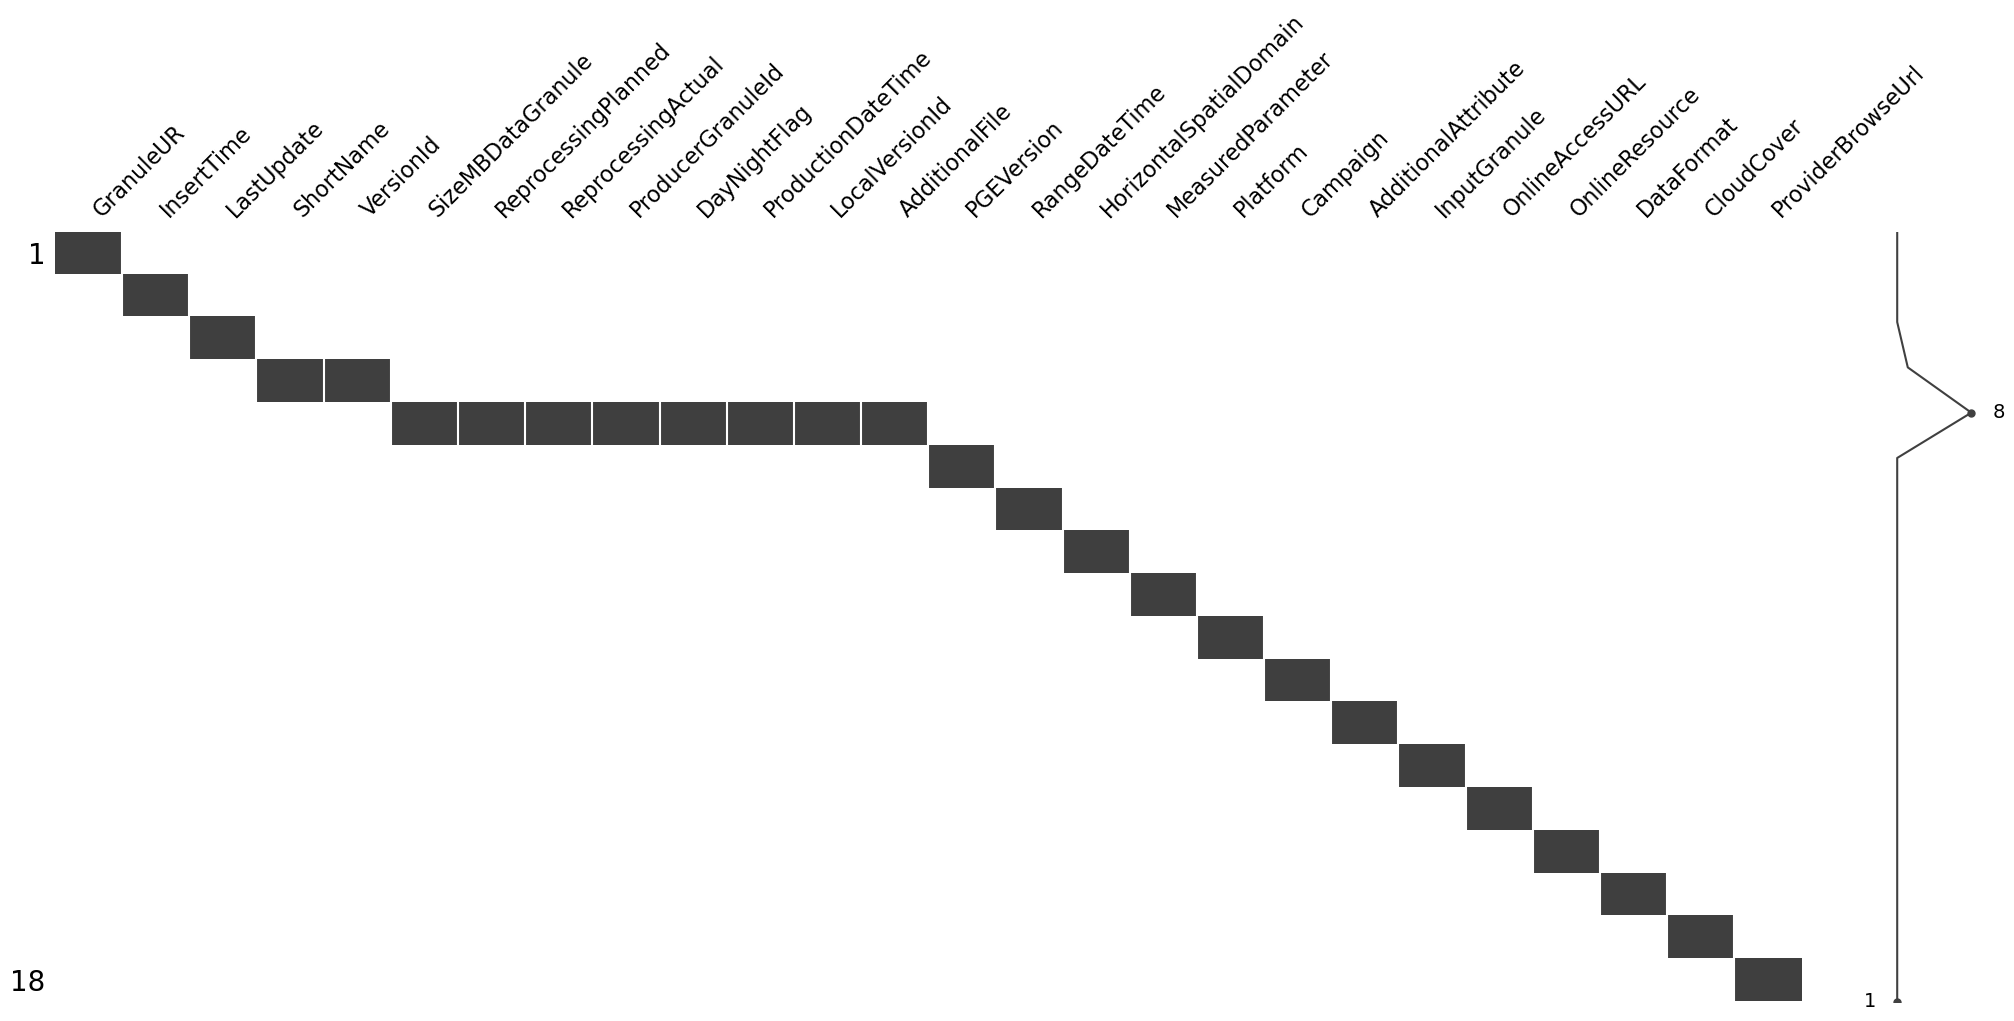

In [37]:
import missingno as msno
msno.matrix(xml_file_data)

In [38]:
def clean_xml_data(xml_file_path):
    """
    Cleans the XML data from the specified file path.

    Args:
        xml_file_path (str): The file path of the XML file.

    Returns:
        dict: A dictionary containing the cleaned XML data, with column names as keys and cleaned values as values.
    """
    xml_file_data = pd.read_xml(xml_file_path)
    
    ### Drop all missing values to get 1 value per column
    xml_file_data_clean = {}
    for col in xml_file_data.columns:
        clean_col = xml_file_data[col].dropna().unique()
        if len(clean_col) == 1:
            clean_col = clean_col[0]
        else:
            clean_col = clean_col
            
        if isinstance(clean_col, str):
            clean_col = clean_col.strip()
        
        xml_file_data_clean[col] = clean_col
    return xml_file_data_clean

xml_file_data_clean = clean_xml_data(xml_file_path)
xml_file_data_clean


{'GranuleUR': 'MOD11A2.A2023145.h09v06.061.2023154043201',
 'InsertTime': '2023-06-02T23:36:16.610Z',
 'LastUpdate': '2023-06-02T23:36:49.187Z',
 'ShortName': 'MOD11A2',
 'VersionId': 61.0,
 'SizeMBDataGranule': 3.23938,
 'ReprocessingPlanned': 'further update is anticipated',
 'ReprocessingActual': 'reprocessed',
 'ProducerGranuleId': 'MOD11A2.A2023145.h09v06.061.2023154043201',
 'DayNightFlag': 'BOTH',
 'ProductionDateTime': '2023-06-03T04:32:01.000Z',
 'LocalVersionId': '6.3.0',
 'AdditionalFile': '',
 'PGEVersion': '6.4.4',
 'RangeDateTime': '',
 'HorizontalSpatialDomain': '',
 'MeasuredParameter': '',
 'Platform': '',
 'Campaign': '',
 'AdditionalAttribute': '',
 'InputGranule': 'MOD11A1.A2023152.h09v06.061.2023153211401.hdf',
 'OnlineAccessURL': '',
 'OnlineResource': '',
 'DataFormat': 'HDF-EOS2',
 'CloudCover': 0.0,
 'ProviderBrowseUrl': ''}

> **Where is the coordinates data I saw in the raw XML?!**

#### Attempting to extract coordinates from the corresponding XML files

In [39]:
import xml.etree.ElementTree as ET

# # Load the XML file
# # xml_file_path = "path_to_your_xml_file/MOD11A2.A2023241.h09v06.061.2023251215934.cmr.xml"
# xml_file_path = xml_files.iloc[0]['fpath']
# tree = ET.parse(xml_file_path)
# root = tree.getroot()

# # Extract SW and NE coordinates
# def extract_coordinates(root):
#     sw_coord = None
#     ne_coord = None
#     for spatial in root.findall(".//SpatialExtent"):
#         for coord in spatial.findall(".//BoundingRectangle"):
#             sw_coord = (float(coord.find('SouthBoundingCoordinate').text), float(coord.find('WestBoundingCoordinate').text))
#             ne_coord = (float(coord.find('NorthBoundingCoordinate').text), float(coord.find('EastBoundingCoordinate').text))
#     return sw_coord, ne_coord

# sw_coord, ne_coord = extract_coordinates(root)
# print("SW Coordinate:", sw_coord)
# print("NE Coordinate:", ne_coord)

In [40]:
# Preview XML file
with open(xml_file_path) as f:
    xml_data = f.read()
print(xml_data[:1000])


<?xml version='1.0'?>
<Granule>
    <GranuleUR>MOD11A2.A2023145.h09v06.061.2023154043201</GranuleUR>
    <InsertTime>2023-06-02T23:36:16.610Z</InsertTime>
    <LastUpdate>2023-06-02T23:36:49.187Z</LastUpdate>
    <Collection>
        <ShortName>MOD11A2</ShortName>
        <VersionId>061</VersionId>
    </Collection>
    <DataGranule>
        <SizeMBDataGranule>3.23938</SizeMBDataGranule>
        <ReprocessingPlanned>further update is anticipated</ReprocessingPlanned>
        <ReprocessingActual>reprocessed</ReprocessingActual>
        <ProducerGranuleId>MOD11A2.A2023145.h09v06.061.2023154043201</ProducerGranuleId>
        <DayNightFlag>BOTH</DayNightFlag>
        <ProductionDateTime>2023-06-03T04:32:01.000Z</ProductionDateTime>
        <LocalVersionId>6.3.0</LocalVersionId>
        <AdditionalFile>
            <Name>BROWSE.MOD11A2.A2023145.h09v06.061.2023154003201.1.jpg</Name>
            <SizeInBytes>12552</SizeInBytes>
            <Checksum>
                <Value>3ed54f248acf830f0ac

In [41]:

# Extract coordinates
import xml.etree.ElementTree as ET

def extract_coordinates(raw_xml_data=None, xml_file_path=None):
    """
    Extracts coordinates from XML data or file.

    Args:
        raw_xml_data (str): The raw XML data as a string. Default is None.
        xml_file_path (str): The path to the XML file. Default is None.

    Returns:
        list: A list of tuples containing latitude and longitude coordinates.

    Raises:
        FileNotFoundError: If the XML file is not found.

    """
    if (raw_xml_data is None) and (xml_file_path is not None):
        with open(xml_file_path) as f:
            raw_xml_data = f.read()
    
    # Parse the XML content
    root = ET.fromstring(raw_xml_data)

    coordinates = []
    for point in root.findall(".//Point"):
        lon = float(point.find('PointLongitude').text)
        lat = float(point.find('PointLatitude').text)
        coordinates.append((lat, lon))
    return coordinates


# Label coordinates
def label_coordinates(coordinates):
    """
    Sorts a list of coordinates and returns a dictionary of labeled coordinates.

    Args:
        coordinates (list): A list of coordinate tuples in the format (latitude, longitude).

    Returns:
        dict: A dictionary containing labeled coordinates in the format {"SW": (latitude, longitude), "SE": (latitude, longitude), "NW": (latitude, longitude), "NE": (latitude, longitude)}.

    """
    coordinates.sort()  # Sort by latitude first (south to north)
    
    # Determine the south and north points
    south_points = coordinates[:2]
    north_points = coordinates[2:]

    # Sort by longitude (west to east) within the south and north points
    south_points.sort(key=lambda x: x[1])
    north_points.sort(key=lambda x: x[1])

    labels = {
        "SW": south_points[0],
        "SE": south_points[1],
        "NW": north_points[0],
        "NE": north_points[1]
    }
    return labels



# Extract and print the coordinates
coordinates = extract_coordinates(xml_file_path=xml_file_path)

for i, (lat, lon) in enumerate(coordinates, start=1):
    print(f"Coordinate {i}: Latitude = {lat}, Longitude = {lon}")
    

Coordinate 1: Latitude = 29.9958333333333, Longitude = -103.927853790562
Coordinate 2: Latitude = 29.9958333333333, Longitude = -92.3808679493012
Coordinate 3: Latitude = 20.0041666666667, Longitude = -85.1431698709447
Coordinate 4: Latitude = 20.0041666666667, Longitude = -95.7854936618109


In [42]:

labeled_coordinates= label_coordinates(coordinates)
# Print labeled coordinates
for label, (lat, lon) in labeled_coordinates.items():
    print(f"{label} Coordinate: Latitude = {lat}, Longitude = {lon}")
    

labeled_coordinates

SW Coordinate: Latitude = 20.0041666666667, Longitude = -95.7854936618109
SE Coordinate: Latitude = 20.0041666666667, Longitude = -85.1431698709447
NW Coordinate: Latitude = 29.9958333333333, Longitude = -103.927853790562
NE Coordinate: Latitude = 29.9958333333333, Longitude = -92.3808679493012


{'SW': (20.0041666666667, -95.7854936618109),
 'SE': (20.0041666666667, -85.1431698709447),
 'NW': (29.9958333333333, -103.927853790562),
 'NE': (29.9958333333333, -92.3808679493012)}

In [43]:
# def complete_xml_data_extraction(xml_file_path, labeled_coordinates=True):
#     """DEPRECATED - SEE parse_and_clean_xml_file function below.
    
#     Extracts and completes the XML data from the specified file path.

#     Args:
#         xml_file_path (str): The file path of the XML file.

#     Returns:
#         dict: A dictionary containing the completed XML data, with column names as keys and values as values.
#     """
#     # Extract the cleaned XML data
#     xml_data_clean = clean_xml_data(xml_file_path)
    
#     # Extract the coordinates
#     coordinates = extract_coordinates(xml_file_path=xml_file_path)
    
#     if labeled_coordinates:
#         # Label the coordinates
#         coordinates = label_coordinates(coordinates)
    
#     # Combine the cleaned XML data and coordinates
#     xml_data_clean['Coordinates'] = coordinates
    
#     return xml_data_clean


# complete_xml_data_extraction(xml_file_path)

In [44]:
import xml.etree.ElementTree as ET

# def xml_to_dict(element):
#     # If the element has no children, return its text
#     if not list(element):
#         return element.text
#     # Otherwise, create a dictionary
#     return {child.tag: xml_to_dict(child) for child in element}

def xml_to_dict(element):
    """
    Converts an XML element to a dictionary.

    Args:
        element (Element): The XML element to convert.

    Returns:
        dict: The converted dictionary representation of the XML element.
    """
    import xml.etree.ElementTree as ET
    # If the element has no children, return its text
    if not list(element):
        return element.text
    
    # If the element has children, create a dictionary
    child_dict = {}
    for child in element:
        child_tag = child.tag
        child_dict.setdefault(child_tag, [])
        child_dict[child_tag].append(xml_to_dict(child))
    
    # Simplify lists with single elements
    for key in child_dict:
        if len(child_dict[key]) == 1:
            child_dict[key] = child_dict[key][0]
    
    return child_dict



In [45]:
# EXAMPLE DATA USED BY CHATGPT
# Load and parse the XML data
xml_data = '''<?xml version='1.0'?>
<Granule>
    <GranuleUR>MOD11A2.A2024153.h09v06.061.2024162202838</GranuleUR>
    <InsertTime>2024-06-10T17:04:37.341Z</InsertTime>
    <LastUpdate>2024-06-10T17:05:14.132Z</LastUpdate>
    <Collection>
        <ShortName>MOD11A2</ShortName>
        <VersionId>061</VersionId>
    </Collection>
    <Spatial>
        <HorizontalSpatialDomain>
            <Geometry>
                <GPolygon>
                    <Boundary>
                        <Point>
                            <PointLongitude>-103.923</PointLongitude>
                            <PointLatitude>30</PointLatitude>
                        </Point>
                        <Point>
                            <PointLongitude>-92.0525</PointLongitude>
                            <PointLatitude>30.0438</PointLatitude>
                        </Point>
                        <Point>
                            <PointLongitude>-84.8251</PointLongitude>
                            <PointLatitude>19.9359</PointLatitude>
                        </Point>
                        <Point>
                            <PointLongitude>-95.7583</PointLongitude>
                            <PointLatitude>19.8939</PointLatitude>
                        </Point>
                    </Boundary>
                </GPolygon>
            </Geometry>
        </HorizontalSpatialDomain>
    </Spatial>
</Granule>'''


In [46]:
# Parse the XML data
with open(xml_file_path) as f:
    xml_data = f.read()
    
    
# Parse the XML data
root = ET.fromstring(xml_data)

# Convert the XML to a dictionary
xml_dict = xml_to_dict(root)

# Print the resulting dictionary
import pprint
pprint.pprint(xml_dict)

{'AdditionalAttributes': {'AdditionalAttribute': [{'Name': 'QAPERCENTGOODQUALITY',
                                                   'Values': {'Value': '18'}},
                                                  {'Name': 'QAPERCENTOTHERQUALITY',
                                                   'Values': {'Value': '10'}},
                                                  {'Name': 'QAPERCENTNOTPRODUCEDCLOUD',
                                                   'Values': {'Value': '00'}},
                                                  {'Name': 'QAPERCENTNOTPRODUCEDOTHER',
                                                   'Values': {'Value': '72'}},
                                                  {'Name': 'CLOUD_CONTAMINATED_LST_SCREENED',
                                                   'Values': {'Value': 'NO'}},
                                                  {'Name': 'HORIZONTALTILENUMBER',
                                                   'Values': {'Value': '09'}},
      

In [47]:
def preview_xml_dict(xml_dict):
    """
    Preview the structure of a nested XML dictionary.

    Args:
        xml_dict (dict): The XML dictionary to preview.

    Returns:
        None
    """
    # Preview nested dictionary
    print("XML Dict Structure:")
    for k,v in xml_dict.items():
        print(f"- {k} (type={type(v)})")
        if isinstance(v,str):
            print(f"\t{v}")
        elif isinstance(v,dict):
            for kk,vv in v.items():
                print(f"\t- {kk} (type={type(vv)})")
                if isinstance(vv,str):
                    print(f"\t\t{vv}")
                elif isinstance(vv,dict):
                    print(f"\t\t{vv}")
                elif isinstance(vv,list):
                    for i in vv:
                        print(f"\t\t{i}")
        elif isinstance(v,list):
            for i in v:
                print(f"\t- {i}")
                
preview_xml_dict(xml_dict)
# [print(f"- {k}") for k in xml_dict.keys()];

XML Dict Structure:
- GranuleUR (type=<class 'str'>)
	MOD11A2.A2023145.h09v06.061.2023154043201
- InsertTime (type=<class 'str'>)
	2023-06-02T23:36:16.610Z
- LastUpdate (type=<class 'str'>)
	2023-06-02T23:36:49.187Z
- Collection (type=<class 'dict'>)
	- ShortName (type=<class 'str'>)
		MOD11A2
	- VersionId (type=<class 'str'>)
		061
- DataGranule (type=<class 'dict'>)
	- SizeMBDataGranule (type=<class 'str'>)
		3.23938
	- ReprocessingPlanned (type=<class 'str'>)
		further update is anticipated
	- ReprocessingActual (type=<class 'str'>)
		reprocessed
	- ProducerGranuleId (type=<class 'str'>)
		MOD11A2.A2023145.h09v06.061.2023154043201
	- DayNightFlag (type=<class 'str'>)
		BOTH
	- ProductionDateTime (type=<class 'str'>)
		2023-06-03T04:32:01.000Z
	- LocalVersionId (type=<class 'str'>)
		6.3.0
	- AdditionalFile (type=<class 'list'>)
		{'Name': 'BROWSE.MOD11A2.A2023145.h09v06.061.2023154003201.1.jpg', 'SizeInBytes': '12552', 'Checksum': {'Value': '3ed54f248acf830f0ac9914e97a5d9c5a5f498417

#### Notes re: saving xml:

- Too complex to save as a single series.
- TO Do:
    - [ ] Slice out desired data to make a flat Series




#### PARTS TO SAVE:
- [x] GranuleUR [str]
- [x] InsertTime [str]
- [x] LastUpdate [str]
- [x] Collection [dict]:
    - ShortName [str]
    - Version [str]
    
- [x] DataGranule [dict]
    - SizeMBDataGranule [str]
    - ReprocessingPlanned [str]
    - ReprocessingActual [str]
    - ProducerGranuleId [str]
    - DayNightFlag [str]
    - ProductionDateTime [str]
    - LocalVersionId [str]
    - ~~AdditionalFile~~
- [x] PGEVersionClass [dict]
    - PGEVersion [str]
- [x] Temporal [dict]
    - RangeDateTime [dict]:
        - 'BeginningDateTime' [str]
        - 'EndingDateTime' [str]
- [x] Spatial [dict]:
    - HorizontalSpatialDomain [dict]:
        - "Geometry' [dict]:
            - "GPolygon" [dict]
                - "Boundary" [list of dicts]:
                    - Each dict in list:
                        - "PointLatitude" [str]
                        - "PointLongitude" [str]

- [x] Campaigns [dict]:
    - "Campaign" [dict]
        - "ShortName" [str]

- [x] AdditionalAttributes [dict]:
    - AdditionalAttribute: [list of dict]:
        - For each additional attribute  dict in list:
            - Name [str]
            - Values[dict]:
                - Value[str]
- [x] DataFormat [str]

>- DID NOT USE ANY FROM:
>    - OnlineAccessURLs
>    - OnlineResources
>    - AssociatedBrowseImageUrls


In [48]:
# Save the XML dictionary to a JSON file
top_keys_strings = ['GranuleUR','InsertTime','LastUpdate', "DataFormat"]
top_keys_simple_dicts = ['Collection',
                         #'DataGranule',
                         'PGEVersionClass',
                        ]
top_keys_nested_dicts = [ "DataGranule", 'Temporal','Campaigns']
# top_keys_nested_lists = ['AdditionalAttributes']
addl_attributes_key = 'AdditionalAttributes'

spatial_key = 'Spatial'


# Initialize dictionary to keep only the relevant keys
keep_xml = {}

## Save top level keys
for k in top_keys_strings:
    if k in xml_dict.keys():
        keep_xml[k] = xml_dict[k]
        

## Save simple nested keys
for k in top_keys_simple_dicts:
    if k in xml_dict.keys():
        
        # If single key, combine with parent key        
        for kk,vv in xml_dict[k].items():
            keep_xml[f"{k}__{kk}"] = vv

        
## Save nested dictionaries as flat keys            
for k in top_keys_nested_dicts:
    if k in xml_dict.keys():
        
        # Combine parent key and child key to flat key
        for kk,vv in xml_dict[k].items():
            
            ## Skip undesired keys:
            if 'AdditionalFile'.lower() in kk.lower():
                continue
            
            if isinstance(vv,list):
                vv = pd.DataFrame(vv)
                keep_xml[f"{k}__{kk}"] = vv
                
            elif isinstance(vv,dict):
                # Combine parent key and child key to flat key
                for kkk,vvv in vv.items():
                    key = f"{k}__{kk}__{kkk}"
                    keep_xml[key] = vvv
            else:
                key = f"{k}__{kk}"
                keep_xml[key] = vv
                

additional_attributes = xml_dict[addl_attributes_key]['AdditionalAttribute']
for li in additional_attributes:
    print(li)
    key = f"AdditionalAttributes__{li['Name']}"
    
    if isinstance(li['Values'], dict):
        keep_xml[key] = li['Values']['Value']
    else:
        keep_xml[key] = li["Values"]
        # if isinstance(xml_dict[k], list):
        #     for li in xml_dict[k]:
        #         if isinstance(li, dict):
        #             dict_keys= li.keys()
                    
        #             for kk in dict_keys:
        #                 key = f"{k}__{}"
        
        # keep_xml[k] = xml_dict[k]
keep_xml

{'Name': 'QAPERCENTGOODQUALITY', 'Values': {'Value': '18'}}
{'Name': 'QAPERCENTOTHERQUALITY', 'Values': {'Value': '10'}}
{'Name': 'QAPERCENTNOTPRODUCEDCLOUD', 'Values': {'Value': '00'}}
{'Name': 'QAPERCENTNOTPRODUCEDOTHER', 'Values': {'Value': '72'}}
{'Name': 'CLOUD_CONTAMINATED_LST_SCREENED', 'Values': {'Value': 'NO'}}
{'Name': 'HORIZONTALTILENUMBER', 'Values': {'Value': '09'}}
{'Name': 'VERTICALTILENUMBER', 'Values': {'Value': '06'}}
{'Name': 'TileID', 'Values': {'Value': '51009006'}}
{'Name': 'identifier_product_doi', 'Values': {'Value': '10.5067/MODIS/MOD11A2.061'}}
{'Name': 'identifier_product_doi_authority', 'Values': {'Value': 'https://doi.org'}}


{'GranuleUR': 'MOD11A2.A2023145.h09v06.061.2023154043201',
 'InsertTime': '2023-06-02T23:36:16.610Z',
 'LastUpdate': '2023-06-02T23:36:49.187Z',
 'DataFormat': 'HDF-EOS2',
 'Collection__ShortName': 'MOD11A2',
 'Collection__VersionId': '061',
 'PGEVersionClass__PGEVersion': '6.4.4',
 'DataGranule__SizeMBDataGranule': '3.23938',
 'DataGranule__ReprocessingPlanned': 'further update is anticipated',
 'DataGranule__ReprocessingActual': 'reprocessed',
 'DataGranule__ProducerGranuleId': 'MOD11A2.A2023145.h09v06.061.2023154043201',
 'DataGranule__DayNightFlag': 'BOTH',
 'DataGranule__ProductionDateTime': '2023-06-03T04:32:01.000Z',
 'DataGranule__LocalVersionId': '6.3.0',
 'Temporal__RangeDateTime__BeginningDateTime': '2023-05-25T00:00:00.000000Z',
 'Temporal__RangeDateTime__EndingDateTime': '2023-06-01T23:59:59.000000Z',
 'Campaigns__Campaign__ShortName': 'TERRA',
 'AdditionalAttributes__QAPERCENTGOODQUALITY': '18',
 'AdditionalAttributes__QAPERCENTOTHERQUALITY': '10',
 'AdditionalAttributes_

In [49]:

def clean_xml_dict(xml_dict, top_keys_strings=['GranuleUR', 'InsertTime', 'LastUpdate', 'DataFormat'],
                   top_keys_simple_dicts=['Collection', 'PGEVersionClass'],
                   top_keys_nested_dicts=['DataGranule', 'Temporal', 'Campaigns'],
                   spatial_key='Spatial', addl_attributes_key="AdditionalAttributes"):
    """
    Cleans and flattens a nested XML dictionary to retain only relevant keys and values.

    This function processes an XML dictionary by retaining specified top-level string keys,
    flattening nested dictionaries, and converting lists within the nested dictionaries to DataFrames.
    It filters out undesired keys, such as those related to 'AdditionalFile'.

    Parameters:
    xml_dict (dict): The input XML dictionary to be cleaned and flattened.
    top_keys_strings (list): A list of keys corresponding to top-level strings to retain in the output dictionary.
    top_keys_simple_dicts (list): A list of keys corresponding to simple nested dictionaries to flatten and retain.
    top_keys_nested_dicts (list): A list of keys corresponding to nested dictionaries to process and flatten.
    spatial_key (str): The key corresponding to spatial data in the input dictionary.

    Returns:
    dict: A cleaned and flattened dictionary containing only the relevant keys and values.

    Example:
    >>> xml_dict = {
            'GranuleUR': 'MOD11A2.A2024153.h09v06.061.2024162202838',
            'InsertTime': '2024-06-10T17:04:37.341Z',
            'LastUpdate': '2024-06-10T17:05:14.132Z',
            'Collection': {'ShortName': 'MOD11A2', 'VersionId': '061'},
            'DataGranule': {'SizeMBDataGranule': 3.156, 'DayNightFlag': 'BOTH'},
            'AdditionalFile': [{'Name': 'file1', 'SizeInBytes': 100}, {'Name': 'file2', 'SizeInBytes': 200}],
            'Temporal': {'RangeDateTime': {'BeginningDateTime': '2024-06-01T00:00:00Z', 'EndingDateTime': '2024-06-08T23:59:59Z'}},
            'Spatial': {'HorizontalSpatialDomain': {'Geometry': {'GPolygon': {'Boundary': {'Point': [{'PointLongitude': -103.923, 'PointLatitude': 30}, {'PointLongitude': -92.0525, 'PointLatitude': 30.0438}]}}}}},
            'PGEVersionClass': {'PGEVersion': '6.4.4'}
        }
    >>> clean_xml_dict(xml_dict)
    {
        'GranuleUR': 'MOD11A2.A2024153.h09v06.061.2024162202838',
        'InsertTime': '2024-06-10T17:04:37.341Z',
        'LastUpdate': '2024-06-10T17:05:14.132Z',
        'DataFormat': 'HDF-EOS2',
        'Collection__ShortName': 'MOD11A2',
        'Collection__VersionId': '061',
        'DataGranule__SizeMBDataGranule': 3.156,
        'DataGranule__DayNightFlag': 'BOTH',
        'Temporal__RangeDateTime__BeginningDateTime': '2024-06-01T00:00:00Z',
        'Temporal__RangeDateTime__EndingDateTime': '2024-06-08T23:59:59Z',
        'PGEVersionClass__PGEVersion': '6.4.4'
    }
    """
    # Initialize dictionary to keep only the relevant keys
    keep_xml = {}

    # Save top level keys
    for k in top_keys_strings:
        if k in xml_dict.keys():
            keep_xml[k] = xml_dict[k]

    # Save simple nested keys
    for k in top_keys_simple_dicts:
        if k in xml_dict.keys():
            # If single key, combine with parent key        
            for kk, vv in xml_dict[k].items():
                keep_xml[f"{k}__{kk}"] = vv

    # Save nested dictionaries as flat keys            
    for k in top_keys_nested_dicts:
        if k in xml_dict.keys():
            # Combine parent key and child key to flat key
            for kk, vv in xml_dict[k].items():
                # Skip undesired keys:
                if 'AdditionalFile'.lower() in kk.lower():
                    continue

                if isinstance(vv, list):
                    vv = pd.DataFrame(vv)
                    keep_xml[f"{k}__{kk}"] = vv

                elif isinstance(vv, dict):
                    # Combine parent key and child key to flat key
                    for kkk, vvv in vv.items():
                        key = f"{k}__{kk}__{kkk}"
                        keep_xml[key] = vvv
                else:
                    key = f"{k}__{kk}"
                    keep_xml[key] = vv

    ## Save addiitonal attirubtes
    additional_attributes = xml_dict[addl_attributes_key]['AdditionalAttribute']
    for li in additional_attributes:
        print(li)
        key = f"AddlAttr__{li['Name']}"
        
        if isinstance(li['Values'], dict):
            keep_xml[key] = li['Values']['Value']
        else:
            keep_xml[key] = li["Values"]
    return keep_xml

In [50]:
keep_xml = clean_xml_dict(xml_dict)
keep_xml

{'Name': 'QAPERCENTGOODQUALITY', 'Values': {'Value': '18'}}
{'Name': 'QAPERCENTOTHERQUALITY', 'Values': {'Value': '10'}}
{'Name': 'QAPERCENTNOTPRODUCEDCLOUD', 'Values': {'Value': '00'}}
{'Name': 'QAPERCENTNOTPRODUCEDOTHER', 'Values': {'Value': '72'}}
{'Name': 'CLOUD_CONTAMINATED_LST_SCREENED', 'Values': {'Value': 'NO'}}
{'Name': 'HORIZONTALTILENUMBER', 'Values': {'Value': '09'}}
{'Name': 'VERTICALTILENUMBER', 'Values': {'Value': '06'}}
{'Name': 'TileID', 'Values': {'Value': '51009006'}}
{'Name': 'identifier_product_doi', 'Values': {'Value': '10.5067/MODIS/MOD11A2.061'}}
{'Name': 'identifier_product_doi_authority', 'Values': {'Value': 'https://doi.org'}}


{'GranuleUR': 'MOD11A2.A2023145.h09v06.061.2023154043201',
 'InsertTime': '2023-06-02T23:36:16.610Z',
 'LastUpdate': '2023-06-02T23:36:49.187Z',
 'DataFormat': 'HDF-EOS2',
 'Collection__ShortName': 'MOD11A2',
 'Collection__VersionId': '061',
 'PGEVersionClass__PGEVersion': '6.4.4',
 'DataGranule__SizeMBDataGranule': '3.23938',
 'DataGranule__ReprocessingPlanned': 'further update is anticipated',
 'DataGranule__ReprocessingActual': 'reprocessed',
 'DataGranule__ProducerGranuleId': 'MOD11A2.A2023145.h09v06.061.2023154043201',
 'DataGranule__DayNightFlag': 'BOTH',
 'DataGranule__ProductionDateTime': '2023-06-03T04:32:01.000Z',
 'DataGranule__LocalVersionId': '6.3.0',
 'Temporal__RangeDateTime__BeginningDateTime': '2023-05-25T00:00:00.000000Z',
 'Temporal__RangeDateTime__EndingDateTime': '2023-06-01T23:59:59.000000Z',
 'Campaigns__Campaign__ShortName': 'TERRA',
 'AddlAttr__QAPERCENTGOODQUALITY': '18',
 'AddlAttr__QAPERCENTOTHERQUALITY': '10',
 'AddlAttr__QAPERCENTNOTPRODUCEDCLOUD': '00',
 

In [51]:
preview_xml_dict(keep_xml)

XML Dict Structure:
- GranuleUR (type=<class 'str'>)
	MOD11A2.A2023145.h09v06.061.2023154043201
- InsertTime (type=<class 'str'>)
	2023-06-02T23:36:16.610Z
- LastUpdate (type=<class 'str'>)
	2023-06-02T23:36:49.187Z
- DataFormat (type=<class 'str'>)
	HDF-EOS2
- Collection__ShortName (type=<class 'str'>)
	MOD11A2
- Collection__VersionId (type=<class 'str'>)
	061
- PGEVersionClass__PGEVersion (type=<class 'str'>)
	6.4.4
- DataGranule__SizeMBDataGranule (type=<class 'str'>)
	3.23938
- DataGranule__ReprocessingPlanned (type=<class 'str'>)
	further update is anticipated
- DataGranule__ReprocessingActual (type=<class 'str'>)
	reprocessed
- DataGranule__ProducerGranuleId (type=<class 'str'>)
	MOD11A2.A2023145.h09v06.061.2023154043201
- DataGranule__DayNightFlag (type=<class 'str'>)
	BOTH
- DataGranule__ProductionDateTime (type=<class 'str'>)
	2023-06-03T04:32:01.000Z
- DataGranule__LocalVersionId (type=<class 'str'>)
	6.3.0
- Temporal__RangeDateTime__BeginningDateTime (type=<class 'str'>)
	20

In [52]:
pd.Series(keep_xml)

GranuleUR                                     MOD11A2.A2023145.h09v06.061.2023154043201
InsertTime                                                     2023-06-02T23:36:16.610Z
LastUpdate                                                     2023-06-02T23:36:49.187Z
DataFormat                                                                     HDF-EOS2
Collection__ShortName                                                           MOD11A2
Collection__VersionId                                                               061
PGEVersionClass__PGEVersion                                                       6.4.4
DataGranule__SizeMBDataGranule                                                  3.23938
DataGranule__ReprocessingPlanned                          further update is anticipated
DataGranule__ReprocessingActual                                             reprocessed
DataGranule__ProducerGranuleId                MOD11A2.A2023145.h09v06.061.2023154043201
DataGranule__DayNightFlag       

In [53]:
def parse_and_clean_xml_file(xml_file_path, labeled_coordinates=True, as_series=False):
    """
    Extracts and completes the XML data from the specified file path.

    Args:
        xml_file_path (str): The file path of the XML file.

    Returns:
        dict: A dictionary containing the completed XML data, with column names as keys and values as values.
    """
    # Extract the cleaned XML data
    # Parse the XML data
    with open(xml_file_path) as f:
        xml_data = f.read()
        
        
    # Parse the XML data
    root = ET.fromstring(xml_data)

    # Convert the XML to a dictionary
    xml_dict = xml_to_dict(root)

    xml_dict_clean = clean_xml_dict(xml_dict)
    
    # Extract the coordinates
    coordinates = extract_coordinates(raw_xml_data=xml_data)#xml_file_path=xml_file_path)
    
    if labeled_coordinates:
        # Label the coordinates
        coordinates = label_coordinates(coordinates)
    
    # Combine the cleaned XML data and coordinates
        for k,v in coordinates.items():
            xml_dict_clean[f"Spatial_Coordinates__{k}"] = v

    
    if as_series:
        return pd.Series(xml_dict_clean)
    return xml_dict_clean


xml_dict_clean = parse_and_clean_xml_file(xml_file_path)
xml_dict_clean

{'Name': 'QAPERCENTGOODQUALITY', 'Values': {'Value': '18'}}
{'Name': 'QAPERCENTOTHERQUALITY', 'Values': {'Value': '10'}}
{'Name': 'QAPERCENTNOTPRODUCEDCLOUD', 'Values': {'Value': '00'}}
{'Name': 'QAPERCENTNOTPRODUCEDOTHER', 'Values': {'Value': '72'}}
{'Name': 'CLOUD_CONTAMINATED_LST_SCREENED', 'Values': {'Value': 'NO'}}
{'Name': 'HORIZONTALTILENUMBER', 'Values': {'Value': '09'}}
{'Name': 'VERTICALTILENUMBER', 'Values': {'Value': '06'}}
{'Name': 'TileID', 'Values': {'Value': '51009006'}}
{'Name': 'identifier_product_doi', 'Values': {'Value': '10.5067/MODIS/MOD11A2.061'}}
{'Name': 'identifier_product_doi_authority', 'Values': {'Value': 'https://doi.org'}}


{'GranuleUR': 'MOD11A2.A2023145.h09v06.061.2023154043201',
 'InsertTime': '2023-06-02T23:36:16.610Z',
 'LastUpdate': '2023-06-02T23:36:49.187Z',
 'DataFormat': 'HDF-EOS2',
 'Collection__ShortName': 'MOD11A2',
 'Collection__VersionId': '061',
 'PGEVersionClass__PGEVersion': '6.4.4',
 'DataGranule__SizeMBDataGranule': '3.23938',
 'DataGranule__ReprocessingPlanned': 'further update is anticipated',
 'DataGranule__ReprocessingActual': 'reprocessed',
 'DataGranule__ProducerGranuleId': 'MOD11A2.A2023145.h09v06.061.2023154043201',
 'DataGranule__DayNightFlag': 'BOTH',
 'DataGranule__ProductionDateTime': '2023-06-03T04:32:01.000Z',
 'DataGranule__LocalVersionId': '6.3.0',
 'Temporal__RangeDateTime__BeginningDateTime': '2023-05-25T00:00:00.000000Z',
 'Temporal__RangeDateTime__EndingDateTime': '2023-06-01T23:59:59.000000Z',
 'Campaigns__Campaign__ShortName': 'TERRA',
 'AddlAttr__QAPERCENTGOODQUALITY': '18',
 'AddlAttr__QAPERCENTOTHERQUALITY': '10',
 'AddlAttr__QAPERCENTNOTPRODUCEDCLOUD': '00',
 

In [54]:
xml_series = parse_and_clean_xml_file(xml_file_path, as_series=True)
xml_series

{'Name': 'QAPERCENTGOODQUALITY', 'Values': {'Value': '18'}}
{'Name': 'QAPERCENTOTHERQUALITY', 'Values': {'Value': '10'}}
{'Name': 'QAPERCENTNOTPRODUCEDCLOUD', 'Values': {'Value': '00'}}
{'Name': 'QAPERCENTNOTPRODUCEDOTHER', 'Values': {'Value': '72'}}
{'Name': 'CLOUD_CONTAMINATED_LST_SCREENED', 'Values': {'Value': 'NO'}}
{'Name': 'HORIZONTALTILENUMBER', 'Values': {'Value': '09'}}
{'Name': 'VERTICALTILENUMBER', 'Values': {'Value': '06'}}
{'Name': 'TileID', 'Values': {'Value': '51009006'}}
{'Name': 'identifier_product_doi', 'Values': {'Value': '10.5067/MODIS/MOD11A2.061'}}
{'Name': 'identifier_product_doi_authority', 'Values': {'Value': 'https://doi.org'}}


GranuleUR                                     MOD11A2.A2023145.h09v06.061.2023154043201
InsertTime                                                     2023-06-02T23:36:16.610Z
LastUpdate                                                     2023-06-02T23:36:49.187Z
DataFormat                                                                     HDF-EOS2
Collection__ShortName                                                           MOD11A2
Collection__VersionId                                                               061
PGEVersionClass__PGEVersion                                                       6.4.4
DataGranule__SizeMBDataGranule                                                  3.23938
DataGranule__ReprocessingPlanned                          further update is anticipated
DataGranule__ReprocessingActual                                             reprocessed
DataGranule__ProducerGranuleId                MOD11A2.A2023145.h09v06.061.2023154043201
DataGranule__DayNightFlag       

In [55]:
%load_ext autoreload
%autoreload 2

import custom_functions as cf
dir(cf.xml)

['ET',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'clean_xml_dict',
 'extract_coordinates',
 'label_coordinates',
 'parse_and_clean_xml_file',
 'pd',
 'preview_xml_dict',
 'xml_to_dict']

In [56]:
clean_data = cf.xml.parse_and_clean_xml_file(xml_file_path)
clean_data

{'GranuleUR': 'MOD11A2.A2023145.h09v06.061.2023154043201',
 'InsertTime': '2023-06-02T23:36:16.610Z',
 'LastUpdate': '2023-06-02T23:36:49.187Z',
 'DataFormat': 'HDF-EOS2',
 'Collection__ShortName': 'MOD11A2',
 'Collection__VersionId': '061',
 'PGEVersionClass__PGEVersion': '6.4.4',
 'DataGranule__SizeMBDataGranule': '3.23938',
 'DataGranule__ReprocessingPlanned': 'further update is anticipated',
 'DataGranule__ReprocessingActual': 'reprocessed',
 'DataGranule__ProducerGranuleId': 'MOD11A2.A2023145.h09v06.061.2023154043201',
 'DataGranule__DayNightFlag': 'BOTH',
 'DataGranule__ProductionDateTime': '2023-06-03T04:32:01.000Z',
 'DataGranule__LocalVersionId': '6.3.0',
 'Temporal__RangeDateTime__BeginningDateTime': '2023-05-25T00:00:00.000000Z',
 'Temporal__RangeDateTime__EndingDateTime': '2023-06-01T23:59:59.000000Z',
 'Campaigns__Campaign__ShortName': 'TERRA',
 'AddlAttr__QAPERCENTGOODQUALITY': '18',
 'AddlAttr__QAPERCENTOTHERQUALITY': '10',
 'AddlAttr__QAPERCENTNOTPRODUCEDCLOUD': '00',
 

## Load Data with Xarray

In [57]:
# %conda install -c conda-forge xarray dask netCDF4 bottleneck
# !pip install h5py

In [58]:
import xarray as xr
import geopandas as gpd
from shapely.geometry import box

In [59]:
# files = pd.read_csv('data/MODIS-LST/files.csv')
files = pd.read_csv('data/MODIS-LST/hdf_files.csv')

xml_files = files.loc[files['type'] == 'xml'].drop(columns=['url'])
hdf_files = files.loc[files['type'] == 'hdf'].drop(columns=['url'])

display(xml_files.head(), hdf_files.head())

region  \
1  urban   
2  urban   
4  urban   
5  urban   
7  urban   

                                                                      fpath  \
1  ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
2  ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
4  ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.cmr.xml   
5  ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.cmr.xml   
7  ./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522.cmr.xml   

            granule_id  \
1  G2704231088-LPCLOUD   
2  G2704231088-LPCLOUD   
4  G2709329705-LPCLOUD   
5  G2709329705-LPCLOUD   
7  G2715588619-LPCLOUD   

                                                                          dataset_id  \
1  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
2  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
4  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
5  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
7  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   

                 start_time                  end_time  spatial_extent type  
1  2023-05-25T00:00:00.000Z  2023-06-01T23:59:59.000Z             NaN  xml  
2  2023-05-25T00:00:00.000Z  2023-06-01T23:59:59.000Z             NaN  xml  
4  2023-06-02T00:00:00.000Z  2023-06-09T23:59:59.000Z             NaN  xml  
5  2023-06-02T00:00:00.000Z  2023-06-09T23:59:59.000Z             NaN  xml  
7  2023-06-10T00:00:00.000Z  2023-06-17T23:59:59.000Z             NaN  xml

region  \
0   urban   
3   urban   
6   urban   
9   urban   
12  urban   

                                                                   fpath  \
0   ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.hdf   
3   ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.hdf   
6   ./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522.hdf   
9   ./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028.hdf   
12  ./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224.hdf   

             granule_id  \
0   G2704231088-LPCLOUD   
3   G2709329705-LPCLOUD   
6   G2715588619-LPCLOUD   
9   G2720713652-LPCLOUD   
12  G2730471847-LPCLOUD   

                                                                           dataset_id  \
0   MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
3   MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
6   MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
9   MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
12  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   

                  start_time                  end_time  spatial_extent type  
0   2023-05-25T00:00:00.000Z  2023-06-01T23:59:59.000Z             NaN  hdf  
3   2023-06-02T00:00:00.000Z  2023-06-09T23:59:59.000Z             NaN  hdf  
6   2023-06-10T00:00:00.000Z  2023-06-17T23:59:59.000Z             NaN  hdf  
9   2023-06-18T00:00:00.000Z  2023-06-25T23:59:59.000Z             NaN  hdf  
12  2023-06-26T00:00:00.000Z  2023-07-03T23:59:59.000Z             NaN  hdf

### `[New 07/02/24]` Load in the XML Data for Every File and Add to Files DFs

In [60]:
files = pd.read_csv('data/MODIS-LST/hdf_files.csv')
# Remove duplicate files
files = files.drop_duplicates(subset=['fpath'])

files.head(4)

region  \
0  urban   
1  urban   
3  urban   
4  urban   

                                                                                                                                                                     url  \
0      https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.hdf   
1  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
3      https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023153.h09v06.061.2023164032102/MOD11A2.A2023153.h09v06.061.2023164032102.hdf   
4  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023153.h09v06.061.2023164032102/MOD11A2.A2023153.h09v06.061.2023164032102.cmr.xml   

                                                                      fpath  \
0      ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.hdf   
1  ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
3      ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.hdf   
4  ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.cmr.xml   

            granule_id  \
0  G2704231088-LPCLOUD   
1  G2704231088-LPCLOUD   
3  G2709329705-LPCLOUD   
4  G2709329705-LPCLOUD   

                                                                          dataset_id  \
0  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
1  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
3  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
4  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   

                 start_time                  end_time  spatial_extent type  
0  2023-05-25T00:00:00.000Z  2023-06-01T23:59:59.000Z             NaN  hdf  
1  2023-05-25T00:00:00.000Z  2023-06-01T23:59:59.000Z             NaN  xml  
3  2023-06-02T00:00:00.000Z  2023-06-09T23:59:59.000Z             NaN  hdf  
4  2023-06-02T00:00:00.000Z  2023-06-09T23:59:59.000Z             NaN  xml

In [61]:
# Save fname without extension to merge
def remove_extension(fpath):
    return fpath.replace('.cmr.xml','').replace('.hdf','')

files['fname'] = files['fpath'].apply(remove_extension)
files

region  \
0   urban   
1   urban   
3   urban   
4   urban   
6   urban   
7   urban   
9   urban   
10  urban   
12  urban   
13  urban   
15  urban   
16  urban   
18  urban   
19  urban   
21  urban   
22  urban   
24  urban   
25  urban   
27  urban   
28  urban   
30  urban   
31  urban   
33  urban   
34  urban   
36  urban   
37  urban   
39  rural   
40  rural   
42  rural   
43  rural   
45  rural   
46  rural   
48  rural   
49  rural   
51  rural   
52  rural   
54  rural   
55  rural   
57  rural   
58  rural   
60  rural   
61  rural   
63  rural   
64  rural   
66  rural   
67  rural   
69  rural   
70  rural   
72  rural   
73  rural   
75  rural   
76  rural   

                                                                                                                                                                      url  \
0       https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.hdf   
1   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023145.h09v06.061.2023154043201/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml   
3       https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023153.h09v06.061.2023164032102/MOD11A2.A2023153.h09v06.061.2023164032102.hdf   
4   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023153.h09v06.061.2023164032102/MOD11A2.A2023153.h09v06.061.2023164032102.cmr.xml   
6       https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023161.h09v06.061.2023170174522/MOD11A2.A2023161.h09v06.061.2023170174522.hdf   
7   https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023161.h09v06.061.2023170174522/MOD11A2.A2023161.h09v06.061.2023170174522.cmr.xml   
9       https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023169.h09v06.061.2023178032028/MOD11A2.A2023169.h09v06.061.2023178032028.hdf   
10  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023169.h09v06.061.2023178032028/MOD11A2.A2023169.h09v06.061.2023178032028.cmr.xml   
12      https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023177.h09v06.061.2023191223224/MOD11A2.A2023177.h09v06.061.2023191223224.hdf   
13  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023177.h09v06.061.2023191223224/MOD11A2.A2023177.h09v06.061.2023191223224.cmr.xml   
15      https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023185.h09v06.061.2023201095900/MOD11A2.A2023185.h09v06.061.2023201095900.hdf   
16  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023185.h09v06.061.2023201095900/MOD11A2.A2023185.h09v06.061.2023201095900.cmr.xml   
18      https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023193.h09v06.061.2023214104850/MOD11A2.A2023193.h09v06.061.2023214104850.hdf   
19  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023193.h09v06.061.2023214104850/MOD11A2.A2023193.h09v06.061.2023214104850.cmr.xml   
21      https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023201.h09v06.061.2023215145515/MOD11A2.A2023201.h09v06.061.2023215145515.hdf   
22  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023201.h09v06.061.2023215145515/MOD11A2.A2023201.h09v06.061.2023215145515.cmr.xml   
24      https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v06.061.2023220022032/MOD11A2.A2023209.h09v06.061.2023220022032.hdf   
25  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MOD11A2.061/MOD11A2.A2023209.h09v06.061.2023220022032/MOD11A2.A2023209.h09v06.061.2023220022032.cmr.xml   
27      https://data.lpdaa

In [62]:
# files.set_index(['fname','fpath'])

In [63]:
# Moved to custom_functions.py
xml_data = cf.xml.parse_and_clean_xml_file(xml_file_path, as_series=True)
xml_data

GranuleUR                                     MOD11A2.A2023145.h09v06.061.2023154043201
InsertTime                                                     2023-06-02T23:36:16.610Z
LastUpdate                                                     2023-06-02T23:36:49.187Z
DataFormat                                                                     HDF-EOS2
Collection__ShortName                                                           MOD11A2
Collection__VersionId                                                               061
PGEVersionClass__PGEVersion                                                       6.4.4
DataGranule__SizeMBDataGranule                                                  3.23938
DataGranule__ReprocessingPlanned                          further update is anticipated
DataGranule__ReprocessingActual                                             reprocessed
DataGranule__ProducerGranuleId                MOD11A2.A2023145.h09v06.061.2023154043201
DataGranule__DayNightFlag       

In [64]:
# Group Files by fname stub (without extension)
# grouped_files = files.groupby('fname')['fpath'].apply(lambda x: x.values)
grouped_files = files.groupby('fname')['fpath'].apply(lambda x: ";".join(x))#.values)
grouped_files = grouped_files.to_frame('fpaths_combined')#.reset_index()
grouped_files

fpaths_combined
fname                                                                                                                                                                                                          
./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457  ./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457.hdf;./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457.cmr.xml
./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529  ./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529.hdf;./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529.cmr.xml
./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847  ./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847.hdf;./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847.cmr.xml
./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518  ./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518.hdf;./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518.cmr.xml
./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728  ./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728.hdf;./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728.cmr.xml
./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553  ./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553.hdf;./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553.cmr.xml
./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254  ./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254.hdf;./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254.cmr.xml
./data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934  ./data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934.hdf;./data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934.cmr.xml
./data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857  ./data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf;./data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.cmr.xml
./data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049  ./data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf;./data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.cmr.xml
./data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337  ./data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf;./data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.cmr.xml
./data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454  ./data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf;./data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.cmr.xml
./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940  ./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf;./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.cmr.xml
./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201  ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.hdf;./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.cmr.xml
./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102  ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.hdf;./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.cmr.xml
./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522  ./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522.hdf;./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522.cmr.xml
./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028  ./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028.hdf;./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028.cmr.xml
./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224  ./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224.hdf;./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224.cmr.xml
./data/MODIS-LST/urban/MOD11A2.A

In [65]:

grouped_files[['.hdf_file','.xml_file']] = grouped_files['fpaths_combined'].str.split(";", expand=True)
grouped_files = grouped_files.drop(columns=['fpaths_combined']).reset_index()
grouped_files

fname  \
0   ./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457   
1   ./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529   
2   ./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847   
3   ./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518   
4   ./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728   
5   ./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553   
6   ./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254   
7   ./data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934   
8   ./data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857   
9   ./data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049   
10  ./data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337   
11  ./data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454   
12  ./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940   
13  ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201   
14  ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102   
15  ./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522   
16  ./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028   
17  ./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224   
18  ./data/MODIS-LST/urban/MOD11A2.A2023185.h09v06.061.2023201095900   
19  ./data/MODIS-LST/urban/MOD11A2.A2023193.h09v06.061.2023214104850   
20  ./data/MODIS-LST/urban/MOD11A2.A2023201.h09v06.061.2023215145515   
21  ./data/MODIS-LST/urban/MOD11A2.A2023209.h09v06.061.2023220022032   
22  ./data/MODIS-LST/urban/MOD11A2.A2023217.h09v06.061.2023226040517   
23  ./data/MODIS-LST/urban/MOD11A2.A2023225.h09v06.061.2023235042835   
24  ./data/MODIS-LST/urban/MOD11A2.A2023233.h09v06.061.2023242040015   
25  ./data/MODIS-LST/urban/MOD11A2.A2023241.h09v06.061.2023251215934   

                                                               .hdf_file  \
0   ./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457.hdf   
1   ./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529.hdf   
2   ./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847.hdf   
3   ./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518.hdf   
4   ./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728.hdf   
5   ./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553.hdf   
6   ./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254.hdf   
7   ./data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934.hdf   
8   ./data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf   
9   ./data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf   
10  ./data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf   
11  ./data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf   
12  ./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf   
13  ./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201.hdf   
14  ./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102.hdf   
15  ./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522.hdf   
16  ./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028.hdf   
17  ./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224.hdf   
18  ./data/MODIS-LST/urban/MOD11A2.A2023185.h09v06.061.2023201095900.hdf   
19  ./data/MODIS-LST/urban/MOD11A2.A2023193.h09v06.061.2023214104850.hdf   
20  ./data/MODIS-LST/urban/MOD11A2.A2023201.h09v06.061.2023215145515.hdf   
21  ./data/MODIS-LST/urban/MOD11A2.A2023209.h09v06.061.2023220022032.hdf   
22  ./data/MODIS-LST/urban/MOD11A2.A2023217.h09v06.061.2023226040517.hdf   
23  ./data/MODIS-LST/urban/MOD11A2.A2023225.h09v06.061.2023235042835.hdf   
24  ./data/MODIS-LST/urban/MOD11A2.A2023233.h09v06.061.2023242040015.hdf   
25  ./data/MODIS-LST/urban/MOD11A2.A2023241.h09v06.061.2023251215934.hdf   

                                                                 

In [66]:
file_cols =files.drop(columns=['url','type','fpath']).columns# ['region','fname','fpath','']
hdf_files_df = files.loc[ files['type']=='hdf', file_cols]
hdf_files_df

region           granule_id  \
0   urban  G2704231088-LPCLOUD   
3   urban  G2709329705-LPCLOUD   
6   urban  G2715588619-LPCLOUD   
9   urban  G2720713652-LPCLOUD   
12  urban  G2730471847-LPCLOUD   
15  urban  G2736211341-LPCLOUD   
18  urban  G2746054083-LPCLOUD   
21  urban  G2746053526-LPCLOUD   
24  urban  G2746623211-LPCLOUD   
27  urban  G2750074060-LPCLOUD   
30  urban  G2755210531-LPCLOUD   
33  urban  G2759098174-LPCLOUD   
36  urban  G2764330615-LPCLOUD   
39  rural  G2704231280-LPCLOUD   
42  rural  G2709350019-LPCLOUD   
45  rural  G2715598329-LPCLOUD   
48  rural  G2720724342-LPCLOUD   
51  rural  G2730475989-LPCLOUD   
54  rural  G2736016380-LPCLOUD   
57  rural  G2746053956-LPCLOUD   
60  rural  G2746053552-LPCLOUD   
63  rural  G2746626093-LPCLOUD   
66  rural  G2750076583-LPCLOUD   
69  rural  G2755214585-LPCLOUD   
72  rural  G2759098093-LPCLOUD   
75  rural  G2764330813-LPCLOUD   

                                                                           dataset_id  \
0   MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
3   MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
6   MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
9   MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
12  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
15  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
18  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
21  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
24  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
27  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
30  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
33  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
36  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
39  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
42  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
45  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
48  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
51  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
54  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
57  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
60  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
63  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
66  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
69  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
72  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
75  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   

                  start_time                  end_time  spatial_extent  \
0   2023-05-25T00:00:00.000Z  2023-06-01T23:59:59.000Z             NaN   
3   2023-06-02T00:00:00.000Z  2023-06-09T23:59:59.000Z             NaN   
6   2023-06-10T00:00:00.000Z  2023-06-17T23:59:59.000Z             NaN   
9   2023-06-18T00:00:00.000Z  2023-06-25T23:59:59.000Z             NaN   
12  2023-06-26T00:00:00.000Z  2023-07-03T23:59:59.000Z             NaN   
15  2023-07-04T00:00:00.000Z  2023-07-11T23:59:59.000Z             NaN   
18  2023-07-12T00:00:00.000Z  2023-07-19T23:59:59.000Z             NaN   
21  2023-07-20T00:00:00.000Z  2023-07-27T23:59:59.000Z             NaN   
24  2023-07-28

In [67]:
# Merge the grouped files with the hdf files
files_df = pd.merge(hdf_files_df,grouped_files, on='fname', how='left')
files_df = files_df.set_index('fname')
files_df

region  \
fname                                                                     
./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201  urban   
./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102  urban   
./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522  urban   
./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028  urban   
./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224  urban   
./data/MODIS-LST/urban/MOD11A2.A2023185.h09v06.061.2023201095900  urban   
./data/MODIS-LST/urban/MOD11A2.A2023193.h09v06.061.2023214104850  urban   
./data/MODIS-LST/urban/MOD11A2.A2023201.h09v06.061.2023215145515  urban   
./data/MODIS-LST/urban/MOD11A2.A2023209.h09v06.061.2023220022032  urban   
./data/MODIS-LST/urban/MOD11A2.A2023217.h09v06.061.2023226040517  urban   
./data/MODIS-LST/urban/MOD11A2.A2023225.h09v06.061.2023235042835  urban   
./data/MODIS-LST/urban/MOD11A2.A2023233.h09v06.061.2023242040015  urban   
./data/MODIS-LST/urban/MOD11A2.A2023241.h09v06.061.2023251215934  urban   
./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457  rural   
./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529  rural   
./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847  rural   
./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518  rural   
./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728  rural   
./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553  rural   
./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254  rural   
./data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934  rural   
./data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857  rural   
./data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049  rural   
./data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337  rural   
./data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454  rural   
./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940  rural   

                                                                           granule_id  \
fname                                                                                   
./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201  G2704231088-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102  G2709329705-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522  G2715588619-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028  G2720713652-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224  G2730471847-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023185.h09v06.061.2023201095900  G2736211341-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023193.h09v06.061.2023214104850  G2746054083-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023201.h09v06.061.2023215145515  G2746053526-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023209.h09v06.061.2023220022032  G2746623211-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023217.h09v06.061.2023226040517  G2750074060-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023225.h09v06.061.2023235042835  G2755210531-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023233.h09v06.061.2023242040015  G2759098174-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023241.h09v06.061.2023251215934  G2764330615-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457  G2704231280-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529  G2709350019-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847  G2715598329-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518  G2720724342-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728  G2730475989-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553  G2736016380-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254  G2746053956-LPCLOUD   
./data

### Extracting XML Data for Each HDF File

In [68]:
pd.set_option('display.max_colu', 100)

In [69]:
# msno.matrix(files_df)

xml_df = files_df['.xml_file'].apply(cf.xml.parse_and_clean_xml_file, as_series=True)
xml_df

GranuleUR  \
fname                                                                                                         
./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201  MOD11A2.A2023145.h09v06.061.2023154043201   
./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102  MOD11A2.A2023153.h09v06.061.2023164032102   
./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522  MOD11A2.A2023161.h09v06.061.2023170174522   
./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028  MOD11A2.A2023169.h09v06.061.2023178032028   
./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224  MOD11A2.A2023177.h09v06.061.2023191223224   
./data/MODIS-LST/urban/MOD11A2.A2023185.h09v06.061.2023201095900  MOD11A2.A2023185.h09v06.061.2023201095900   
./data/MODIS-LST/urban/MOD11A2.A2023193.h09v06.061.2023214104850  MOD11A2.A2023193.h09v06.061.2023214104850   
./data/MODIS-LST/urban/MOD11A2.A2023201.h09v06.061.2023215145515  MOD11A2.A2023201.h09v06.061.2023215145515   
./data/MODIS-LST/urban/MOD11A2.A2023209.h09v06.061.2023220022032  MOD11A2.A2023209.h09v06.061.2023220022032   
./data/MODIS-LST/urban/MOD11A2.A2023217.h09v06.061.2023226040517  MOD11A2.A2023217.h09v06.061.2023226040517   
./data/MODIS-LST/urban/MOD11A2.A2023225.h09v06.061.2023235042835  MOD11A2.A2023225.h09v06.061.2023235042835   
./data/MODIS-LST/urban/MOD11A2.A2023233.h09v06.061.2023242040015  MOD11A2.A2023233.h09v06.061.2023242040015   
./data/MODIS-LST/urban/MOD11A2.A2023241.h09v06.061.2023251215934  MOD11A2.A2023241.h09v06.061.2023251215934   
./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457  MOD11A2.A2023145.h09v05.061.2023154041457   
./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529  MOD11A2.A2023153.h09v05.061.2023164034529   
./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847  MOD11A2.A2023161.h09v05.061.2023170174847   
./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518  MOD11A2.A2023169.h09v05.061.2023178033518   
./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728  MOD11A2.A2023177.h09v05.061.2023191223728   
./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553  MOD11A2.A2023185.h09v05.061.2023201061553   
./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254  MOD11A2.A2023193.h09v05.061.2023214104254   
./data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934  MOD11A2.A2023201.h09v05.061.2023215145934   
./data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857  MOD11A2.A2023209.h09v05.061.2023220022857   
./data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049  MOD11A2.A2023217.h09v05.061.2023226041049   
./data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337  MOD11A2.A2023225.h09v05.061.2023235043337   
./data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454  MOD11A2.A2023233.h09v05.061.2023242040454   
./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940  MOD11A2.A2023241.h09v05.061.2023251220940   

                                                                                InsertTime  \
fname                                                                                        
./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201  2023-06-02T23:36:16.610Z   
./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102  2023-06-12T23:05:35.619Z   
./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522  2023-06-19T12:53:11.362Z   
./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028  2023-06-26T22:24:39.480Z   
./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224  2023-07-10T17:56:14.751Z   
./data/MODIS-LST/urban/MOD11A2.A2023185.h09v06.061.2023201095900  2023-07-20T05:25:07.829Z   
./data/MODIS-LST/urban/MOD11A2.A2023193.h09v06.061.2023214104850  2023-08-02T21:42:13.647Z   
./data/MODIS-LST/urban/MOD11A2.A2023201.h09v06.061.2023215145515  2023-08-03T10:05:50.490Z   
./data/MODIS-LST/urban/MOD11A2.A2023209.h09v06.06

In [70]:
files_df_with_xml = pd.concat([files_df,xml_df], axis=1)
files_df_with_xml

region  \
fname                                                                     
./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201  urban   
./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102  urban   
./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522  urban   
./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028  urban   
./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224  urban   
./data/MODIS-LST/urban/MOD11A2.A2023185.h09v06.061.2023201095900  urban   
./data/MODIS-LST/urban/MOD11A2.A2023193.h09v06.061.2023214104850  urban   
./data/MODIS-LST/urban/MOD11A2.A2023201.h09v06.061.2023215145515  urban   
./data/MODIS-LST/urban/MOD11A2.A2023209.h09v06.061.2023220022032  urban   
./data/MODIS-LST/urban/MOD11A2.A2023217.h09v06.061.2023226040517  urban   
./data/MODIS-LST/urban/MOD11A2.A2023225.h09v06.061.2023235042835  urban   
./data/MODIS-LST/urban/MOD11A2.A2023233.h09v06.061.2023242040015  urban   
./data/MODIS-LST/urban/MOD11A2.A2023241.h09v06.061.2023251215934  urban   
./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457  rural   
./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529  rural   
./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847  rural   
./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518  rural   
./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728  rural   
./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553  rural   
./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254  rural   
./data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934  rural   
./data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857  rural   
./data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049  rural   
./data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337  rural   
./data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454  rural   
./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940  rural   

                                                                           granule_id  \
fname                                                                                   
./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201  G2704231088-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102  G2709329705-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522  G2715588619-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028  G2720713652-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224  G2730471847-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023185.h09v06.061.2023201095900  G2736211341-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023193.h09v06.061.2023214104850  G2746054083-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023201.h09v06.061.2023215145515  G2746053526-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023209.h09v06.061.2023220022032  G2746623211-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023217.h09v06.061.2023226040517  G2750074060-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023225.h09v06.061.2023235042835  G2755210531-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023233.h09v06.061.2023242040015  G2759098174-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023241.h09v06.061.2023251215934  G2764330615-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457  G2704231280-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529  G2709350019-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847  G2715598329-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518  G2720724342-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728  G2730475989-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553  G2736016380-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254  G2746053956-LPCLOUD   
./data

In [71]:
files_df_with_xml.to_csv("./data/MODIS-LST/files_with_xml_data.csv")

## 👉✅ To Do: Reconcile Granule File Spatial vs Temporal Data using New `files_df_with_xml`

## ⏳`@NOW` [07/02/24]

In [72]:
is_urban = files_df_with_xml['region'] == 'urban'
files_df_with_xml[is_urban]

region  \
fname                                                                     
./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201  urban   
./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102  urban   
./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522  urban   
./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028  urban   
./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224  urban   
./data/MODIS-LST/urban/MOD11A2.A2023185.h09v06.061.2023201095900  urban   
./data/MODIS-LST/urban/MOD11A2.A2023193.h09v06.061.2023214104850  urban   
./data/MODIS-LST/urban/MOD11A2.A2023201.h09v06.061.2023215145515  urban   
./data/MODIS-LST/urban/MOD11A2.A2023209.h09v06.061.2023220022032  urban   
./data/MODIS-LST/urban/MOD11A2.A2023217.h09v06.061.2023226040517  urban   
./data/MODIS-LST/urban/MOD11A2.A2023225.h09v06.061.2023235042835  urban   
./data/MODIS-LST/urban/MOD11A2.A2023233.h09v06.061.2023242040015  urban   
./data/MODIS-LST/urban/MOD11A2.A2023241.h09v06.061.2023251215934  urban   

                                                                           granule_id  \
fname                                                                                   
./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201  G2704231088-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102  G2709329705-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522  G2715588619-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028  G2720713652-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224  G2730471847-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023185.h09v06.061.2023201095900  G2736211341-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023193.h09v06.061.2023214104850  G2746054083-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023201.h09v06.061.2023215145515  G2746053526-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023209.h09v06.061.2023220022032  G2746623211-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023217.h09v06.061.2023226040517  G2750074060-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023225.h09v06.061.2023235042835  G2755210531-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023233.h09v06.061.2023242040015  G2759098174-LPCLOUD   
./data/MODIS-LST/urban/MOD11A2.A2023241.h09v06.061.2023251215934  G2764330615-LPCLOUD   

                                                                                                                                         dataset_id  \
fname                                                                                                                                                 
./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/urban/MOD11A2.A2023185.h09v06.061.2023201095900  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/urban/MOD11A2.A2023193.h09v06.061.2023214104850  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/urban/MOD11A2.A2023201.h09v06.061.2023215145515  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/urban/MOD11A2.A2023209.h09v06.061.2023220022032  MODIS/Terra Land Surface Te

In [73]:
is_rural = files_df_with_xml['region'] == 'rural'
files_df_with_xml[is_rural]

region  \
fname                                                                     
./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457  rural   
./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529  rural   
./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847  rural   
./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518  rural   
./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728  rural   
./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553  rural   
./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254  rural   
./data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934  rural   
./data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857  rural   
./data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049  rural   
./data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337  rural   
./data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454  rural   
./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940  rural   

                                                                           granule_id  \
fname                                                                                   
./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457  G2704231280-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529  G2709350019-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847  G2715598329-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518  G2720724342-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728  G2730475989-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553  G2736016380-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254  G2746053956-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934  G2746053552-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857  G2746626093-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049  G2750076583-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337  G2755214585-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454  G2759098093-LPCLOUD   
./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940  G2764330813-LPCLOUD   

                                                                                                                                         dataset_id  \
fname                                                                                                                                                 
./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934  MODIS/Terra Land Surface Temperature/Emissivity 8-Day L3 Global 1km SIN Grid V061   
./data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857  MODIS/Terra Land Surface Te

In [74]:
coord_cols= list(filter(lambda x: 'coordinates' in x.lower(), files_df_with_xml.columns))
coord_cols

['Spatial_Coordinates__SW',
 'Spatial_Coordinates__SE',
 'Spatial_Coordinates__NW',
 'Spatial_Coordinates__NE']

In [75]:

plot_df = files_df_with_xml.loc[is_rural, coord_cols].reset_index()
plot_df

fname  \
0   ./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457   
1   ./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529   
2   ./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847   
3   ./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518   
4   ./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728   
5   ./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553   
6   ./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254   
7   ./data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934   
8   ./data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857   
9   ./data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049   
10  ./data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337   
11  ./data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454   
12  ./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940   

                  Spatial_Coordinates__SW  \
0   (30.0041666666667, -103.936581404975)   
1   (30.0041666666667, -103.936581404975)   
2   (30.0041666666667, -103.936581404975)   
3   (30.0041666666667, -103.936581404975)   
4   (30.0041666666667, -103.936581404975)   
5   (30.0041666666667, -103.936581404975)   
6   (30.0041666666667, -103.936581404975)   
7   (30.0041666666667, -103.936581404975)   
8   (30.0041666666667, -103.936581404975)   
9   (30.0041666666667, -103.936581404975)   
10  (30.0041666666667, -103.936581404975)   
11  (30.0041666666667, -103.936581404975)   
12  (30.0041666666667, -103.936581404975)   

                  Spatial_Coordinates__SE  \
0   (30.0041666666667, -92.3886250648192)   
1   (30.0041666666667, -92.3886250648192)   
2   (30.0041666666667, -92.3886250648192)   
3   (30.0041666666667, -92.3886250648192)   
4   (30.0041666666667, -92.3886250648192)   
5   (30.0041666666667, -92.3886250648192)   
6   (30.0041666666667, -92.3886250648192)   
7   (30.0041666666667, -92.3886250648192)   
8   (30.0041666666667, -92.3886250648192)   
9   (30.0041666666667, -92.3886250648192)   
10  (30.0041666666667, -92.3886250648192)   
11  (30.0041666666667, -92.3886250648192)   
12  (30.0041666666667, -92.3886250648192)   

                  Spatial_Coordinates__NW  \
0   (39.9958333333333, -117.492086386791)   
1   (39.9958333333333, -117.492086386791)   
2   (39.9958333333333, -117.492086386791)   
3   (39.9958333333333, -117.492086386791)   
4   (39.9958333333333, -117.492086386791)   
5   (39.9958333333333, -117.492086386791)   
6   (39.9958333333333, -117.492086386791)   
7   (39.9958333333333, -117.492086386791)   
8   (39.9958333333333, -117.492086386791)   
9   (39.9958333333333, -117.492086386791)   
10  (39.9958333333333, -117.492086386791)   
11  (39.9958333333333, -117.492086386791)   
12  (39.9958333333333, -117.492086386791)   

                  Spatial_Coordinates__NE  
0   (39.9958333333333, -104.438034823622)  
1   (39.9958333333333, -104.438034823622)  
2   (39.9958333333333, -104.438034823622)  
3   (39.9958333333333, -104.438034823622)  
4   (39.9958333333333, -104.438034823622)  
5   (39.9958333333333, -104.438034823622)  
6   (39.9958333333333, -104.438034823622)  
7   (39.9958333333333, -104.438034823622)  
8   (39.9958333333333, -104.438034823622)  
9   (39.9958333333333, -104.438034823622)  
10  (39.9958333333333, -104.438034823622)  
11  (39.9958333333333, -104.438034823622)  
12  (39.9958333333333, -104.438034823622)

In [76]:
import plotly.graph_objects as go 

# Extract coordinates and plot bounding boxes
fig = go.Figure()

for i, row in plot_df.iterrows():
    sw = row["Spatial_Coordinates__SW"]
    se = row["Spatial_Coordinates__SE"]
    nw = row["Spatial_Coordinates__NW"]
    ne = row["Spatial_Coordinates__NE"]
    
    lats = [sw[0], se[0], ne[0], nw[0], sw[0]]
    lons = [sw[1], se[1], ne[1], nw[1], sw[1]]
    
    fig.add_trace(go.Scattermapbox(
        lat=lats,
        lon=lons,
        mode='lines',
        line=dict(width=2, color='blue'),
        name=row["fname"]
    ))

fig.update_layout(
    mapbox_style="carto-positron",
    mapbox=dict(
        center=dict(lat=35, lon=-100),
        zoom=3
    ),
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()

In [77]:
tile_number_cols = ["AddlAttr__HORIZONTALTILENUMBER",'AddlAttr__VERTICALTILENUMBER']
files_df_with_xml[["region",*tile_number_cols]]

region  \
fname                                                                     
./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201  urban   
./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102  urban   
./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522  urban   
./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028  urban   
./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224  urban   
./data/MODIS-LST/urban/MOD11A2.A2023185.h09v06.061.2023201095900  urban   
./data/MODIS-LST/urban/MOD11A2.A2023193.h09v06.061.2023214104850  urban   
./data/MODIS-LST/urban/MOD11A2.A2023201.h09v06.061.2023215145515  urban   
./data/MODIS-LST/urban/MOD11A2.A2023209.h09v06.061.2023220022032  urban   
./data/MODIS-LST/urban/MOD11A2.A2023217.h09v06.061.2023226040517  urban   
./data/MODIS-LST/urban/MOD11A2.A2023225.h09v06.061.2023235042835  urban   
./data/MODIS-LST/urban/MOD11A2.A2023233.h09v06.061.2023242040015  urban   
./data/MODIS-LST/urban/MOD11A2.A2023241.h09v06.061.2023251215934  urban   
./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457  rural   
./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529  rural   
./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847  rural   
./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518  rural   
./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728  rural   
./data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553  rural   
./data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254  rural   
./data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934  rural   
./data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857  rural   
./data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049  rural   
./data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337  rural   
./data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454  rural   
./data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940  rural   

                                                                 AddlAttr__HORIZONTALTILENUMBER  \
fname                                                                                             
./data/MODIS-LST/urban/MOD11A2.A2023145.h09v06.061.2023154043201                             09   
./data/MODIS-LST/urban/MOD11A2.A2023153.h09v06.061.2023164032102                             09   
./data/MODIS-LST/urban/MOD11A2.A2023161.h09v06.061.2023170174522                             09   
./data/MODIS-LST/urban/MOD11A2.A2023169.h09v06.061.2023178032028                             09   
./data/MODIS-LST/urban/MOD11A2.A2023177.h09v06.061.2023191223224                             09   
./data/MODIS-LST/urban/MOD11A2.A2023185.h09v06.061.2023201095900                             09   
./data/MODIS-LST/urban/MOD11A2.A2023193.h09v06.061.2023214104850                             09   
./data/MODIS-LST/urban/MOD11A2.A2023201.h09v06.061.2023215145515                             09   
./data/MODIS-LST/urban/MOD11A2.A2023209.h09v06.061.2023220022032                             09   
./data/MODIS-LST/urban/MOD11A2.A2023217.h09v06.061.2023226040517                             09   
./data/MODIS-LST/urban/MOD11A2.A2023225.h09v06.061.2023235042835                             09   
./data/MODIS-LST/urban/MOD11A2.A2023233.h09v06.061.2023242040015                             09   
./data/MODIS-LST/urban/MOD11A2.A2023241.h09v06.061.2023251215934                             09   
./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457                             09   
./data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529                             09   
./data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847                             09   
./data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518                             09   
./data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728                   

In [78]:
for col in tile_number_cols:
    print(f"Unique values for {col}: {files_df_with_xml[col].unique()}")

Unique values for AddlAttr__HORIZONTALTILENUMBER: ['09']
Unique values for AddlAttr__VERTICALTILENUMBER: ['06' '05']


In [79]:
# raise Exception("Stop here and inspect the Tile Numbers above.")

# Original Work Continued [07/02/24]

## Split Loading Data Section into 2: Rural vs Urban

In [80]:
# import glob
# file_list = glob.glob('data/MODIS-LST/*.hdf')
# file_list_dict = files.groupby('group')['fpath_out'].apply(list).to_dict()
file_list_dict = hdf_files.groupby('region')['fpath'].apply(list).to_dict()
file_list_dict

{'rural': ['./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf'],
 'urban': ['./data/MODIS-LST

In [81]:
# Define the path to the HDF5 file
fpath = file_list_dict['rural'][0]
fpath

'./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457.hdf'

In [82]:
import xarray as xr

# Load in example dataset
dataset = xr.open_dataset(fpath, engine='netcdf4')
[i for i in dir(dataset) if not i.startswith('_')]
# dataset

['ArchiveMetadata.0',
 'Clear_sky_days',
 'Clear_sky_nights',
 'CoreMetadata.0',
 'Day_view_angl',
 'Day_view_time',
 'Emis_31',
 'Emis_32',
 'HDFEOSVersion',
 'LST_Day_1km',
 'LST_Night_1km',
 'Night_view_angl',
 'Night_view_time',
 'QC_Day',
 'QC_Night',
 'StructMetadata.0',
 'XDim:MODIS_Grid_8Day_1km_LST',
 'YDim:MODIS_Grid_8Day_1km_LST',
 'all',
 'any',
 'apply',
 'argmax',
 'argmin',
 'argsort',
 'as_numpy',
 'assign',
 'assign_attrs',
 'assign_coords',
 'astype',
 'attrs',
 'bfill',
 'broadcast_equals',
 'broadcast_like',
 'chunk',
 'chunks',
 'chunksizes',
 'clip',
 'close',
 'coarsen',
 'combine_first',
 'compute',
 'conj',
 'conjugate',
 'convert_calendar',
 'coords',
 'copy',
 'count',
 'cumprod',
 'cumsum',
 'cumulative',
 'cumulative_integrate',
 'curvefit',
 'data_vars',
 'diff',
 'differentiate',
 'dims',
 'drop',
 'drop_dims',
 'drop_duplicates',
 'drop_encoding',
 'drop_indexes',
 'drop_isel',
 'drop_sel',
 'drop_vars',
 'dropna',
 'dtypes',
 'dump_to_store',
 'encoding

In [83]:
dataset.attrs

{'HDFEOSVersion': 'HDFEOS_V2.19',
 'StructMetadata.0': 'GROUP=SwathStructure\nEND_GROUP=SwathStructure\nGROUP=GridStructure\n\tGROUP=GRID_1\n\t\tGridName="MODIS_Grid_8Day_1km_LST"\n\t\tXDim=1200\n\t\tYDim=1200\n\t\tUpperLeftPointMtrs=(-10007554.677899,4447802.079066)\n\t\tLowerRightMtrs=(-8895604.158132,3335851.559300)\n\t\tProjection=GCTP_SNSOID\n\t\tProjParams=(6371007.181000,0,0,0,0,0,0,0,86400,0,0,0,0)\n\t\tSphereCode=-1\n\t\tGridOrigin=HDFE_GD_UL\n\t\tGROUP=Dimension\n\t\tEND_GROUP=Dimension\n\t\tGROUP=DataField\n\t\t\tOBJECT=DataField_1\n\t\t\t\tDataFieldName="LST_Day_1km"\n\t\t\t\tDataType=DFNT_UINT16\n\t\t\t\tDimList=("YDim","XDim")\n\t\t\tEND_OBJECT=DataField_1\n\t\t\tOBJECT=DataField_2\n\t\t\t\tDataFieldName="QC_Day"\n\t\t\t\tDataType=DFNT_UINT8\n\t\t\t\tDimList=("YDim","XDim")\n\t\t\tEND_OBJECT=DataField_2\n\t\t\tOBJECT=DataField_3\n\t\t\t\tDataFieldName="Day_view_time"\n\t\t\t\tDataType=DFNT_UINT8\n\t\t\t\tDimList=("YDim","XDim")\n\t\t\tEND_OBJECT=DataField_3\n\t\t\tOBJECT=

In [84]:
# Examine the data_vars
dataset.data_vars

Data variables:
    LST_Day_1km       (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    QC_Day            (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 6MB ...
    Day_view_time     (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Day_view_angl     (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    LST_Night_1km     (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    QC_Night          (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 6MB ...
    Night_view_time   (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Night_view_angl   (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Emis_31           (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Emis_32           (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) flo

In [85]:
dataset['LST_Day_1km'].shape

(1200, 1200)

In [86]:
dataset["XDim:MODIS_Grid_8Day_1km_LST"]#, dataset["YDim:MODIS_Grid_8Day_1km_LST"]

<xarray.DataArray 'XDim:MODIS_Grid_8Day_1km_LST' (
                                                  XDim:MODIS_Grid_8Day_1km_LST: 1200)> Size: 10kB
array([   0,    1,    2, ..., 1197, 1198, 1199])
Dimensions without coordinates: XDim:MODIS_Grid_8Day_1km_LST

In [87]:
dataset.attrs

{'HDFEOSVersion': 'HDFEOS_V2.19',
 'StructMetadata.0': 'GROUP=SwathStructure\nEND_GROUP=SwathStructure\nGROUP=GridStructure\n\tGROUP=GRID_1\n\t\tGridName="MODIS_Grid_8Day_1km_LST"\n\t\tXDim=1200\n\t\tYDim=1200\n\t\tUpperLeftPointMtrs=(-10007554.677899,4447802.079066)\n\t\tLowerRightMtrs=(-8895604.158132,3335851.559300)\n\t\tProjection=GCTP_SNSOID\n\t\tProjParams=(6371007.181000,0,0,0,0,0,0,0,86400,0,0,0,0)\n\t\tSphereCode=-1\n\t\tGridOrigin=HDFE_GD_UL\n\t\tGROUP=Dimension\n\t\tEND_GROUP=Dimension\n\t\tGROUP=DataField\n\t\t\tOBJECT=DataField_1\n\t\t\t\tDataFieldName="LST_Day_1km"\n\t\t\t\tDataType=DFNT_UINT16\n\t\t\t\tDimList=("YDim","XDim")\n\t\t\tEND_OBJECT=DataField_1\n\t\t\tOBJECT=DataField_2\n\t\t\t\tDataFieldName="QC_Day"\n\t\t\t\tDataType=DFNT_UINT8\n\t\t\t\tDimList=("YDim","XDim")\n\t\t\tEND_OBJECT=DataField_2\n\t\t\tOBJECT=DataField_3\n\t\t\t\tDataFieldName="Day_view_time"\n\t\t\t\tDataType=DFNT_UINT8\n\t\t\t\tDimList=("YDim","XDim")\n\t\t\tEND_OBJECT=DataField_3\n\t\t\tOBJECT=

In [88]:
# dataset.coords

### Crash Course on `xarray`

#### Overview
`xarray` is a powerful Python library designed for working with labeled multi-dimensional arrays. It is particularly useful in the context of scientific data analysis, offering robust support for N-dimensional data, similar to `numpy`, but with additional features like labeled axes and coordinates.

#### Key Concepts

1. **DataArray**: The core data structure in `xarray`, representing a single multi-dimensional variable and its coordinates.
2. **Dataset**: A collection of `DataArray` objects, analogous to a dictionary of `DataArray`s, with aligned dimensions.
3. **Coordinates**: Provide meaningful labels for dimensions (e.g., time, latitude, longitude).
4. **Indexing and Selection**: Use labels instead of integer-based indexing, making code more readable and less error-prone.

#### Installation
To install `xarray`, use the following command:
```bash
pip install xarray
```

#### Basic Usage

##### Importing the Library
Start by importing `xarray` and other necessary libraries:
```python
import xarray as xr
import numpy as np
import pandas as pd
```

##### Creating a DataArray
A `DataArray` is a fundamental structure in `xarray`. Here, we create a `DataArray` with random data and labeled dimensions:
```python
# Create random data
data = np.random.rand(4, 3)

# Create coordinate labels
time = pd.date_range("2023-01-01", periods=4)
latitude = [10, 20, 30]

# Create DataArray with coordinates and dimension names
da = xr.DataArray(data, coords=[time, latitude], dims=["time", "latitude"])

print(da)
```

##### Creating a Dataset
A `Dataset` is a collection of `DataArray` objects. Here, we create a `Dataset` with two variables:
```python
# Create two DataArrays
data1 = xr.DataArray(np.random.rand(4, 3), coords=[time, latitude], dims=["time", "latitude"])
data2 = xr.DataArray(np.random.rand(4, 3), coords=[time, latitude], dims=["time", "latitude"])

# Combine them into a Dataset
ds = xr.Dataset({"variable1": data1, "variable2": data2})

print(ds)
```

#### Indexing and Selection

##### By Coordinate Labels
You can select data using coordinate labels for intuitive access:
```python
# Select data by coordinate label
print(da.sel(time="2023-01-01"))
```

##### By Slicing
Select a range of data using slicing:
```python
# Select data by slicing over coordinates
print(da.sel(time=slice("2023-01-01", "2023-01-03")))
```

##### By Integer Indexes
Select data by integer index using `isel`:
```python
# Select data by integer index
print(da.isel(time=0))
```

#### Data Operations

##### Arithmetic Operations
`xarray` supports element-wise arithmetic operations:
```python
# Perform element-wise addition
result = da + 10

print(result)
```

##### Aggregation
Perform operations like mean, sum, etc., along specified dimensions:
```python
# Compute mean along the 'time' dimension
mean_value = da.mean(dim="time")

print(mean_value)
```

##### Applying Functions
Apply custom functions along dimensions using `apply_ufunc`:
```python
# Define a custom function
def custom_func(x):
    return x**2

# Apply custom function to the DataArray
result = xr.apply_ufunc(custom_func, da)

print(result)
```

#### Working with Datasets

##### Adding DataArrays
You can add new `DataArray` objects to a `Dataset`:
```python
# Add a new DataArray to the Dataset
ds["new_variable"] = xr.DataArray(np.random.rand(4, 3), coords=[time, latitude], dims=["time", "latitude"])

print(ds)
```

##### Accessing DataArrays
Access `DataArray` objects within a `Dataset`:
```python
# Access a DataArray from the Dataset
print(ds["variable1"])
```

##### Operations on Datasets
Perform operations on the entire `Dataset`:
```python
# Compute mean over 'time' for all DataArrays in the Dataset
result = ds.mean(dim="time")

print(result)
```

#### Visualization
`xarray` integrates well with `matplotlib` for plotting:
```python
import matplotlib.pyplot as plt

# Plot the DataArray
da.plot()
plt.show()
```

#### Saving and Loading Data

##### Saving to NetCDF
Save a `Dataset` to a NetCDF file:
```python
# Save the Dataset to a NetCDF file
ds.to_netcdf("data.nc")
```

##### Loading from NetCDF
Load a `Dataset` from a NetCDF file:
```python
# Load a Dataset from a NetCDF file
loaded_ds = xr.open_dataset("data.nc")

print(loaded_ds)
```

#### Advanced Features

##### GroupBy Operations
Group data by a coordinate and apply aggregation functions:
```python
# Group by month and compute mean
grouped = da.groupby("time.month").mean()

print(grouped)
```

##### Resampling
Resample data over a new time dimension:
```python
# Resample data to monthly frequency and compute mean
resampled = da.resample(time="1M").mean()

print(resampled)
```

##### Interpolation
Interpolate data to a new set of coordinates:
```python
# Interpolate data to a new time range
interpolated = da.interp(time=pd.date_range("2023-01-01", periods=10))

print(interpolated)
```

#### Practical Example

Let's walk through a simple example of loading a NetCDF file, selecting a subset of the data, performing an operation, and visualizing the result:

```python
# Load a sample dataset
ds = xr.tutorial.load_dataset("air_temperature")

# Select data for a specific time range and location
subset = ds.sel(time=slice("2013-01-01", "2013-01-31"), lat=40.0, lon=260.0)

# Compute the daily mean temperature
daily_mean = subset.mean(dim="time")

# Plot the result
daily_mean.plot()
plt.show()
```

This example demonstrates the power and simplicity of `xarray` for working with labeled multi-dimensional data. By leveraging its capabilities, you can make your data analysis tasks more intuitive and efficient.

If you have specific questions or need further details on any part of `xarray`, feel free to ask!

In [89]:
fpath

'./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457.hdf'

In [90]:
# Gettin the name of the folder (group)
os.path.basename(os.path.dirname(fpath))

'rural'

In [91]:
file_list_dict

{'rural': ['./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023153.h09v05.061.2023164034529.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023161.h09v05.061.2023170174847.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023169.h09v05.061.2023178033518.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023177.h09v05.061.2023191223728.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023185.h09v05.061.2023201061553.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023193.h09v05.061.2023214104254.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023201.h09v05.061.2023215145934.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023209.h09v05.061.2023220022857.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023217.h09v05.061.2023226041049.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023225.h09v05.061.2023235043337.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023233.h09v05.061.2023242040454.hdf',
  './data/MODIS-LST/rural/MOD11A2.A2023241.h09v05.061.2023251220940.hdf'],
 'urban': ['./data/MODIS-LST

In [92]:
fpath = file_list_dict['rural'][0]
fpath

'./data/MODIS-LST/rural/MOD11A2.A2023145.h09v05.061.2023154041457.hdf'

In [93]:
# Gettin the name of the folder (group)
os.path.basename(os.path.dirname(fpath))

'rural'

In [94]:
# USE_DICT= False


# if USE_DICT:
#     # Loop to load all files
#     dataset_dict = {'urban':[],
#                     'rural':[]}
# else:
#     dataset_list = []

# for group, file_list in file_list_dict.items():
#     for fpath in file_list:
#         # Open the HDF5 file
    
#         dataset = xr.open_dataset(fpath, engine='netcdf4')
    
#         # Save the group as an attribute
#         dataset = dataset.expand_dims(group=[group])
#         # dataset.attrs['group'] = group
        
#         if USE_DICT:
#             dataset_dict[group].append(dataset)
#         else:
#             dataset_list.append(dataset)
        

# if USE_DICT:
#     print(f'- Using dictionary')
#     # Combine all the datasets into a single dataset
#     ds_rural = xr.concat(dataset_dict['rural'], dim='time')
#     ds_urban = xr.concat(dataset_dict['urban'], dim='time')
    
#     ds = xr.concat([ds_rural, ds_urban], dim='time')

# else:
#     print(f'- Using list')
#     ds = xr.concat(dataset_list, dim='time')

# print(ds)

## Adding coordinates to the datasets (Separate Rural and Urban)
For Houston, TX:

- Urban Region Bounding Box:
    - Southwest (SW) Coordinate: Latitude 29.5° N, Longitude -95.5° W
-    Northeast (NE) Coordinate: Latitude 30.0° N, Longitude -95.0° W
- Rural Region Bounding Box:
    - Southwest (SW) Coordinate: Latitude 30.5° N, Longitude -96.5° W
    - Northeast (NE) Coordinate: Latitude 31.0° N, Longitude -96.0° W


```python
## Define coordinates used on the MODIS data
coordinates = {'urban':{"SW": [29.5,-95.5], "NE": [30.0,-95.0]},
                'rural':{"SW": [30.5, -96.5], "NE": [31.0, -96.0]},
                }
```
- Original Urban Region Contains Water. 
- **New Urban Region**
urban':{"SW": [29.5,-95.5], "NE": [30.0,-95.0]},


In [95]:
from pprint import pprint
coordinates = data_params['coordinates']
time = data_params['time']

pprint(f"{coordinates=}")
pprint(f"{time=}")

("coordinates={'urban': {'SW': [29.69193, -95.47998], 'NE': [29.90719, "
 "-95.2251]}, 'rural': {'SW': [30.5, -96.5], 'NE': [31.0, -96.0]}}")
"time={'start': '2023-06-01T00:00:00Z', 'end': '2023-08-31T23:59:59Z'}"


In [96]:
# # Define coordinates used on the MODIS data
# coordinates = {'urban':{"SW": [29.5,-95.5], "NE": [30.0,-95.0]},#{"SW": [29.5,-95.5], "NE": [30.0,-95.0]},
#                 'rural':{"SW": [30.5, -96.5], "NE": [31.0, -96.0]},
#                 }
# time={"start": "2023-06-01 00:00:00", "end": "2023-08-31 23:59:59"}



# Separate the coordinates into latitude and longitude
lat_lons = {}

for group, bounds in coordinates.items():
    
    # Create a bounding box
    latitutes = [bounds['SW'][0], bounds['NE'][0]]
    longitudes = [bounds['SW'][1], bounds['NE'][1]]
    lat_lons[group] = {'lat': latitutes, 'lon': longitudes}
    
    bbox = box(*bounds['SW'], *bounds['NE'])
    lat_lons[group]['box'] = bbox
    
    # x_array = np.linspace(*longitudes, ds.sel(group=group).sizes['XDim:MODIS_Grid_8Day_1km_LST'])
    # y_array = np.linspace(*latitutes, ds.sel(group=group).sizes['YDim:MODIS_Grid_8Day_1km_LST'])
    
    # lat_lons[group]['x'] = x_array
    # lat_lons[group]['y'] = y_array
    
lat_lons

{'urban': {'lat': [29.69193, 29.90719],
  'lon': [-95.47998, -95.2251],
  'box': <POLYGON ((29.907 -95.48, 29.907 -95.225, 29.692 -95.225, 29.692 -95.48, 29....>},
 'rural': {'lat': [30.5, 31.0],
  'lon': [-96.5, -96.0],
  'box': <POLYGON ((31 -96.5, 31 -96, 30.5 -96, 30.5 -96.5, 31 -96.5))>}}

<blockquote style="font-size:2rem;"> REALIZED I SHOULD SAVE THE TWO GROUPS SEPARATELY AND SAVE COORDINATES SEPARATELY</blockquote>

In [97]:
USE_DICT= True

shape_list = []

if USE_DICT:
    # Loop to load all files
    dataset_dict = {'urban':[],
                    'rural':[]}
else:
    dataset_list = []

for group, file_list in file_list_dict.items():
    for fpath in file_list:
        # Open the HDF5 file
    
        dataset = xr.open_dataset(fpath, engine='netcdf4')
    
        # Save the group as an attribute
        dataset = dataset.expand_dims(group=[group])
        
        shape_list.append([group, dataset['LST_Day_1km'].shape])
        # dataset.attrs['group'] = group
        
        
        
        if USE_DICT:
            dataset_dict[group].append(dataset)
        else:
            dataset_list.append(dataset)
        

if USE_DICT:
    print(f'- Using dictionary')
    # Combine all the datasets into a single dataset
    ds_rural = xr.concat(dataset_dict['rural'], dim='time')
    ds_urban = xr.concat(dataset_dict['urban'], dim='time')
    
    # Combined dataset (added back)
    ds = xr.concat([ds_rural, ds_urban], dim='time')

else:
    print(f'- Using list')
    ds = xr.concat(dataset_list, dim='time')

print(ds)    

- Using dictionary
<xarray.Dataset> Size: 6GB
Dimensions:           (time: 26, group: 2, YDim:MODIS_Grid_8Day_1km_LST: 1200,
                       XDim:MODIS_Grid_8Day_1km_LST: 1200)
Coordinates:
  * group             (group) object 16B 'rural' 'urban'
Dimensions without coordinates: time, YDim:MODIS_Grid_8Day_1km_LST,
                                XDim:MODIS_Grid_8Day_1km_LST
Data variables:
    LST_Day_1km       (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 599MB ...
    QC_Day            (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 300MB ...
    Day_view_time     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 599MB ...
    Day_view_angl     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 599MB ...
    LST_Night_1km     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 599MB ...
    QC_Night          (time, gr

In [98]:
# Jmi and chris
pd.DataFrame(shape_list)

0                1
0   rural  (1, 1200, 1200)
1   rural  (1, 1200, 1200)
2   rural  (1, 1200, 1200)
3   rural  (1, 1200, 1200)
4   rural  (1, 1200, 1200)
5   rural  (1, 1200, 1200)
6   rural  (1, 1200, 1200)
7   rural  (1, 1200, 1200)
8   rural  (1, 1200, 1200)
9   rural  (1, 1200, 1200)
10  rural  (1, 1200, 1200)
11  rural  (1, 1200, 1200)
12  rural  (1, 1200, 1200)
13  urban  (1, 1200, 1200)
14  urban  (1, 1200, 1200)
15  urban  (1, 1200, 1200)
16  urban  (1, 1200, 1200)
17  urban  (1, 1200, 1200)
18  urban  (1, 1200, 1200)
19  urban  (1, 1200, 1200)
20  urban  (1, 1200, 1200)
21  urban  (1, 1200, 1200)
22  urban  (1, 1200, 1200)
23  urban  (1, 1200, 1200)
24  urban  (1, 1200, 1200)
25  urban  (1, 1200, 1200)

In [99]:
## JMI and Chris 
dataset

<xarray.Dataset> Size: 115MB
Dimensions:           (group: 1, YDim:MODIS_Grid_8Day_1km_LST: 1200,
                       XDim:MODIS_Grid_8Day_1km_LST: 1200)
Coordinates:
  * group             (group) object 8B 'urban'
Dimensions without coordinates: YDim:MODIS_Grid_8Day_1km_LST,
                                XDim:MODIS_Grid_8Day_1km_LST
Data variables:
    LST_Day_1km       (group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    QC_Day            (group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 6MB ...
    Day_view_time     (group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Day_view_angl     (group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    LST_Night_1km     (group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    QC_Night          (group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 6MB ...
    Night_view_time   (group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Night_view_angl   (group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Emis_31           (group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Emis_32           (group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Clear_sky_days    (group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 6MB ...
    Clear_sky_nights  (group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 6MB ...
Attributes:
    HDFEOSVersion:                     HDFEOS_V2.19
    StructMetadata.0:                  GROUP=SwathStructure\nEND_GROUP=SwathS...
    identifier_product_doi:            10.5067/MODIS/MOD11A2.061
    identifier_product_doi_authority:  https://doi.org
    CoreMetadata.0:                    \nGROUP                  = INVENTORYME...
    ArchiveMetadata.0:                 \nGROUP                  = ARCHIVEDMET...

In [100]:

## CONVERT THE TEMPERATURE FROM KELVIN TO CELSIUS AND FAHRENHEIT
def convert_temp_in_array(dataset, verbose=True):
    
    # Convert LST from Kelvin to Celsius
    lst_celsius = dataset['LST_Day_1km']-273.15#* 0.02 - 273.15

    # Convert LST from Celsius to Fahrenheit
    lst_fahrenheit = (lst_celsius * 9 / 5) + 32

    # Add these new variables to the dataset
    dataset['LST_Day_1km_C'] = lst_celsius #(('time', 'YDim:MODIS_Grid_8Day_1km_LST', 'XDim:MODIS_Grid_8Day_1km_LST'), lst_celsius.data)
    # Add attributes to the new variables
    dataset['LST_Day_1km_C'].attrs['units'] = 'Celsius'
    dataset['LST_Day_1km_C'].attrs['description'] = 'Land Surface Temperature in Celsius'


    # Add these new variables to the dataset
    dataset['LST_Day_1km_F'] = lst_fahrenheit #(('time', 'YDim:MODIS_Grid_8Day_1km_LST', 'XDim:MODIS_Grid_8Day_1km_LST'), lst_fahrenheit.data)
    # Add attributes to the new variables
    dataset['LST_Day_1km_F'].attrs['units'] = 'Fahrenheit'
    dataset['LST_Day_1km_F'].attrs['description'] = 'Land Surface Temperature in Fahrenheit'

    if verbose:
        # Inspect the updated dataset
        print("Updated Dataset:\n", dataset)

    return dataset


ds_rural = convert_temp_in_array(ds_rural)
ds_urban = convert_temp_in_array(ds_urban)


Updated Dataset:
 <xarray.Dataset> Size: 2GB
Dimensions:           (time: 13, group: 1, YDim:MODIS_Grid_8Day_1km_LST: 1200,
                       XDim:MODIS_Grid_8Day_1km_LST: 1200)
Coordinates:
  * group             (group) object 8B 'rural'
Dimensions without coordinates: time, YDim:MODIS_Grid_8Day_1km_LST,
                                XDim:MODIS_Grid_8Day_1km_LST
Data variables: (12/14)
    LST_Day_1km       (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    QC_Day            (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    Day_view_time     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Day_view_angl     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    LST_Night_1km     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    QC_Night          (time, group

In [101]:
# JMI and Chris: Check the shape of the datasets
ds_rural["LST_Day_1km_F"].shape, ds_urban['LST_Day_1km_F'].shape

((13, 1, 1200, 1200), (13, 1, 1200, 1200))

In [102]:
lat_lons['rural']

{'lat': [30.5, 31.0],
 'lon': [-96.5, -96.0],
 'box': <POLYGON ((31 -96.5, 31 -96, 30.5 -96, 30.5 -96.5, 31 -96.5))>}

In [103]:
print(ds_rural.data_vars)
print(ds_urban.data_vars)

Data variables:
    LST_Day_1km       (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    QC_Day            (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    Day_view_time     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Day_view_angl     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    LST_Night_1km     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    QC_Night          (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    Night_view_time   (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Night_view_angl   (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Emis_31           (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MOD

## 👉[07/02/24] Investigating the Contents of an Xarray for this Data

In [104]:
# Check the number of time points.
sizes=  ds_rural.sizes
print(sizes)
sizes_time = sizes['time']
sizes_xdim = sizes['XDim:MODIS_Grid_8Day_1km_LST']
sizes_ydim = sizes['YDim:MODIS_Grid_8Day_1km_LST']

print(f"{sizes_time = }")
print(f"{sizes_xdim = }")
print(f"{sizes_ydim = }")
### Get the coordinates from the xml files

Frozen({'time': 13, 'group': 1, 'YDim:MODIS_Grid_8Day_1km_LST': 1200, 'XDim:MODIS_Grid_8Day_1km_LST': 1200})
sizes_time = 13
sizes_xdim = 1200
sizes_ydim = 1200


In [105]:
# raise Exception("Stop here")

> 🤔 ***With 13 time points and 13 granules. Is each granule the same region, but for different 8-day times?***

#### Compare Against Single Granule File

In [106]:
# Load in example dataset
dataset = xr.open_dataset(fpath, engine='netcdf4')
print(dataset)

<xarray.Dataset> Size: 115MB
Dimensions:           (YDim:MODIS_Grid_8Day_1km_LST: 1200,
                       XDim:MODIS_Grid_8Day_1km_LST: 1200)
Dimensions without coordinates: YDim:MODIS_Grid_8Day_1km_LST,
                                XDim:MODIS_Grid_8Day_1km_LST
Data variables:
    LST_Day_1km       (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    QC_Day            (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 6MB ...
    Day_view_time     (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Day_view_angl     (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    LST_Night_1km     (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    QC_Night          (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 6MB ...
    Night_view_time   (YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 12MB ...
    Night_view_a

In [107]:
# Check the number of time points.
sizes=  ds.sizes
print(sizes)

Frozen({'time': 26, 'group': 2, 'YDim:MODIS_Grid_8Day_1km_LST': 1200, 'XDim:MODIS_Grid_8Day_1km_LST': 1200})


In [108]:

sizes_time = sizes['time']
sizes_xdim = sizes['XDim:MODIS_Grid_8Day_1km_LST']
sizes_ydim = sizes['YDim:MODIS_Grid_8Day_1km_LST']

print(f"{sizes_time = }")
print(f"{sizes_xdim = }")
print(f"{sizes_ydim = }")
### Get the coordinates from the xml files

sizes_time = 26
sizes_xdim = 1200
sizes_ydim = 1200


## Saving Coordinates

In [109]:
# from huggingface import pipeline


In [110]:
def save_coordinates(ds, lat1,lat2, lon1, lon2):
    ## Define the latitude and longitude ranges based on the MODIS tile
    latitudes = np.linspace(lat1, lat2, ds.sizes['YDim:MODIS_Grid_8Day_1km_LST'])
    longitudes = np.linspace(lon1, lon2, ds.sizes['XDim:MODIS_Grid_8Day_1km_LST'])

    # Add latitude and longitude as coordinates
    ds = ds.assign_coords(lat=('YDim:MODIS_Grid_8Day_1km_LST', latitudes))
    ds = ds.assign_coords(lon=('XDim:MODIS_Grid_8Day_1km_LST', longitudes))
    
    return ds

ds_rural = save_coordinates(ds_rural, *lat_lons['rural']['lat'], *lat_lons['rural']['lon'])
ds_urban = save_coordinates(ds_urban, *lat_lons['urban']['lat'], *lat_lons['urban']['lon'])


In [111]:
ds_rural

<xarray.Dataset> Size: 2GB
Dimensions:           (time: 13, group: 1, YDim:MODIS_Grid_8Day_1km_LST: 1200,
                       XDim:MODIS_Grid_8Day_1km_LST: 1200)
Coordinates:
  * group             (group) object 8B 'rural'
    lat               (YDim:MODIS_Grid_8Day_1km_LST) float64 10kB 30.5 ... 31.0
    lon               (XDim:MODIS_Grid_8Day_1km_LST) float64 10kB -96.5 ... -...
Dimensions without coordinates: time, YDim:MODIS_Grid_8Day_1km_LST,
                                XDim:MODIS_Grid_8Day_1km_LST
Data variables: (12/14)
    LST_Day_1km       (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    QC_Day            (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    Day_view_time     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Day_view_angl     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    LST_Night_1km     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    QC_Night          (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    ...                ...
    Emis_31           (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Emis_32           (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Clear_sky_days    (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    Clear_sky_nights  (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    LST_Day_1km_C     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    LST_Day_1km_F     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
Attributes:
    HDFEOSVersion:                     HDFEOS_V2.19
    StructMetadata.0:                  GROUP=SwathStructure\nEND_GROUP=SwathS...
    identifier_product_doi:            10.5067/MODIS/MOD11A2.061
    identifier_product_doi_authority:  https://doi.org
    CoreMetadata.0:                    \nGROUP                  = INVENTORYME...
    ArchiveMetadata.0:                 \nGROUP                  = ARCHIVEDMET...

In [112]:
ds_rural.coords

Coordinates:
  * group    (group) object 8B 'rural'
    lat      (YDim:MODIS_Grid_8Day_1km_LST) float64 10kB 30.5 30.5 ... 31.0 31.0
    lon      (XDim:MODIS_Grid_8Day_1km_LST) float64 10kB -96.5 -96.5 ... -96.0

Updated Dataset with Coordinates:
 <xarray.Dataset> Size: 2GB
Dimensions:           (time: 13, group: 1, YDim:MODIS_Grid_8Day_1km_LST: 1200,
                       XDim:MODIS_Grid_8Day_1km_LST: 1200)
Coordinates:
  * group             (group) object 8B 'rural'
    lat               (YDim:MODIS_Grid_8Day_1km_LST) float64 10kB 30.5 ... 31.0
    lon               (XDim:MODIS_Grid_8Day_1km_LST) float64 10kB -96.5 ... -...
Dimensions without coordinates: time, YDim:MODIS_Grid_8Day_1km_LST,
                                XDim:MODIS_Grid_8Day_1km_LST
Data variables: (12/14)
    LST_Day_1km       (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    QC_Day            (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 75MB ...
    Day_view_time     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 150MB ...
    Day_view_angl     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8D

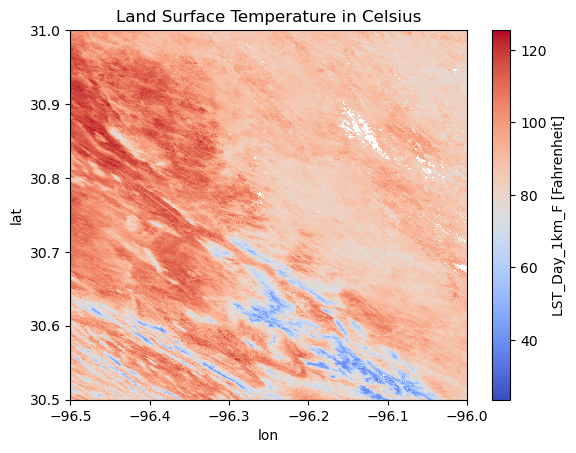

In [113]:
# Inspect the updated dataset
print("Updated Dataset with Coordinates:\n", ds_rural)

# Now you can plot or analyze the dataset using the new coordinates
ds_rural['LST_Day_1km_F'].isel(time=0).plot(x='lon', y='lat', cmap='coolwarm')
plt.title('Land Surface Temperature in Celsius')
plt.show();

In [114]:
### Get the coordinates from the xml files

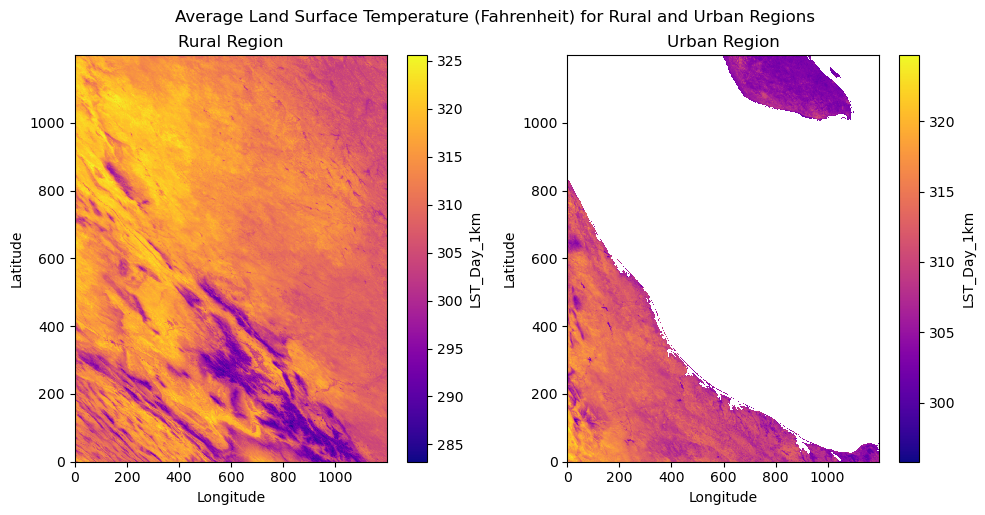

In [115]:

import matplotlib.pyplot as plt

# Plot the average LST for urban and rural regions
fig, axes = plt.subplots(figsize=(10,5), ncols=2)
cmap = 'plasma'

plot_means_rural = ds_rural['LST_Day_1km'].mean(dim='time')
cax1 = plot_means_rural.plot(cmap=cmap, ax=axes[0])
axes[0].set(title='Rural Region',
            xlabel='Longitude',ylabel='Latitude')

plot_means_urban = ds_urban['LST_Day_1km'].mean(dim='time')
plot_means_urban.plot(cmap=cmap, ax=axes[1])
axes[1].set(title='Urban Region',
            xlabel='Longitude', ylabel='Latitude')
fig.tight_layout()
fig.suptitle('Average Land Surface Temperature (Fahrenheit) for Rural and Urban Regions', y=1.02);

In [116]:
# %conda install -c conda-forge geopandas rasterio
# %conda install -c plotly plotly

In [117]:
import plotly.express as px

px.scatter_geo?

Signature:
px.scatter_geo(
    data_frame=None,
    lat=None,
    lon=None,
    locations=None,
    locationmode=None,
    geojson=None,
    featureidkey=None,
    color=None,
    text=None,
    symbol=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    size=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    range_color=None,
    color_continuous_midpoint=None,
    symbol_sequence=None,
    symbol_map=None,
    opacity=None,
    size_max=None,
    projection=None,
    scope=None,
    center=None,
    fitbounds=None,
    basemap_visible=None,
    title=None,
    template=None,
    width=None,
    height=None,
) -> plotly.graph_objs._figure.Figure
Docstring:
    In a geographic scatter plot, each row of

In [134]:
# Convert to pandas DataFrame
i_sel = -1
df_rural = ds_rural['LST_Day_1km'].isel(time=i_sel).to_dataframe().reset_index()
df_urban = ds_urban['LST_Day_1km'].isel(time=i_sel).to_dataframe().reset_index()

df = pd.concat([df_rural, df_urban])
df

group  YDim:MODIS_Grid_8Day_1km_LST  XDim:MODIS_Grid_8Day_1km_LST  \
0        rural                             0                             0   
1        rural                             0                             1   
2        rural                             0                             2   
3        rural                             0                             3   
4        rural                             0                             4   
...        ...                           ...                           ...   
1439995  urban                          1199                          1195   
1439996  urban                          1199                          1196   
1439997  urban                          1199                          1197   
1439998  urban                          1199                          1198   
1439999  urban                          1199                          1199   

              lat        lon  LST_Day_1km  
0        30.50000 -96.500000       318.44  
1        30.50000 -96.499583       318.60  
2        30.50000 -96.499166       317.70  
3        30.50000 -96.498749       313.34  
4        30.50000 -96.498332       312.12  
...           ...        ...          ...  
1439995  29.90719 -95.225950          NaN  
1439996  29.90719 -95.225738          NaN  
1439997  29.90719 -95.225525          NaN  
1439998  29.90719 -95.225313          NaN  
1439999  29.90719 -95.225100          NaN  

[2880000 rows x 6 columns]

In [135]:

# Plot using Plotly Express
fig = px.scatter_mapbox(df.sample(n=10_000), lat="lat", lon="lon", color='group',#color="LST_Day_1km_F",
                        # color_continuous_scale="Viridis", 
                        mapbox_style="carto-positron",
                        title="Land Surface Temperature in Celsius")

fig.show()

In [136]:

# Plot using Plotly Express
fig = px.scatter_mapbox(df.sample(n=10_000), lat="lat", lon="lon", color="LST_Day_1km",
                        # color_continuous_scale="Viridis", 
                        mapbox_style="carto-positron",
                        title="Land Surface Temperature in Celsius",
                        height=600)

fig.show()

### EDA

In [121]:
ds = xr.concat([ds_rural, ds_urban], dim='time')
print(ds)

<xarray.Dataset> Size: 7GB
Dimensions:           (time: 26, group: 2, YDim:MODIS_Grid_8Day_1km_LST: 1200,
                       XDim:MODIS_Grid_8Day_1km_LST: 1200)
Coordinates:
  * group             (group) object 16B 'rural' 'urban'
    lat               (time, YDim:MODIS_Grid_8Day_1km_LST) float64 250kB 30.5...
    lon               (time, XDim:MODIS_Grid_8Day_1km_LST) float64 250kB -96....
Dimensions without coordinates: time, YDim:MODIS_Grid_8Day_1km_LST,
                                XDim:MODIS_Grid_8Day_1km_LST
Data variables: (12/14)
    LST_Day_1km       (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 599MB ...
    QC_Day            (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float32 300MB ...
    Day_view_time     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 599MB ...
    Day_view_angl     (time, group, YDim:MODIS_Grid_8Day_1km_LST, XDim:MODIS_Grid_8Day_1km_LST) float64 599M

In [122]:
ds.sel(group='urban')#b
ds.dims 

FrozenMappingWarningOnValuesAccess({'time': 26, 'group': 2, 'YDim:MODIS_Grid_8Day_1km_LST': 1200, 'XDim:MODIS_Grid_8Day_1km_LST': 1200})

In [123]:
print(ds_rural.coords)
ds_urban.coords

Coordinates:
  * group    (group) object 8B 'rural'
    lat      (YDim:MODIS_Grid_8Day_1km_LST) float64 10kB 30.5 30.5 ... 31.0 31.0
    lon      (XDim:MODIS_Grid_8Day_1km_LST) float64 10kB -96.5 -96.5 ... -96.0


Coordinates:
  * group    (group) object 8B 'urban'
    lat      (YDim:MODIS_Grid_8Day_1km_LST) float64 10kB 29.69 29.69 ... 29.91
    lon      (XDim:MODIS_Grid_8Day_1km_LST) float64 10kB -95.48 ... -95.23

In [124]:
ds.coords

Coordinates:
  * group    (group) object 16B 'rural' 'urban'
    lat      (time, YDim:MODIS_Grid_8Day_1km_LST) float64 250kB 30.5 ... 29.91
    lon      (time, XDim:MODIS_Grid_8Day_1km_LST) float64 250kB -96.5 ... -95.23

## 📌 BOOKMARK EOD 06/28/24: COMBINING THEM AS DS FIRST RUINS COORDINATES!

In [125]:
# df_combined = ds['LST_Day_1km_F'].isel(time=0).to_dataframe().reset_index()
# df_combined

In [126]:

# Plot using Plotly Express
fig = px.scatter_mapbox(#df_combined
                        ds.isel(time=0).to_dataframe().reset_index().sample(n=10_000), lat="lat", lon="lon", color="LST_Day_1km_F",
                        # color_continuous_scale="Viridis", 
                        mapbox_style="carto-positron",
                        title="Land Surface Temperature in Celsius")

fig.show()

### Meeting with Chas and Chris continued below

In [419]:
# help(ds.sel(group='urban')['LST_Day_1km'].mean)

In [420]:
plot_means = ds['LST_Day_1km'].mean(dim='group').mean(dim='time')
plot_means

<xarray.DataArray 'LST_Day_1km' (YDim:MODIS_Grid_8Day_1km_LST: 1200,
                                 XDim:MODIS_Grid_8Day_1km_LST: 1200)> Size: 12MB
array([[317.53307692, 317.58538462, 317.41615385, ..., 306.65692308,
        306.76923077, 306.61923077],
       [317.56615385, 316.74      , 316.29846154, ..., 306.36230769,
        306.33076923, 306.11307692],
       [316.03692308, 315.30846154, 314.30538462, ..., 305.42846154,
        305.44307692, 305.38076923],
       ...,
       [318.11076923, 318.52615385, 318.15692308, ..., 306.03692308,
        306.50307692, 306.99230769],
       [317.92153846, 317.33538462, 317.31230769, ..., 306.69076923,
        307.12461538, 307.29230769],
       [317.18307692, 317.01692308, 317.12153846, ..., 307.03384615,
        307.50923077, 308.17230769]])
Dimensions without coordinates: YDim:MODIS_Grid_8Day_1km_LST,
                                XDim:MODIS_Grid_8Day_1km_LST

[Text(0.5, 1.0, 'Average Land Surface Temperature (Daytime) - Urban Region'),
 Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude')]

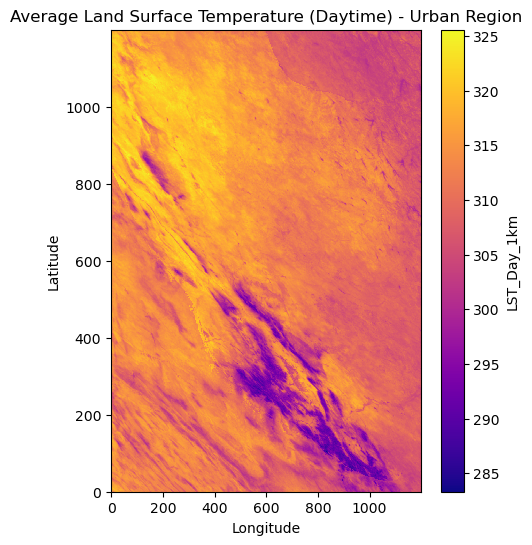

In [421]:
import matplotlib.pyplot as plt

# Plot the average LST for urban and rural regions
fig, axes = plt.subplots(figsize=(5,6), nrows=1)
cmap = 'plasma'
plot_means.plot(cmap=cmap, ax=axes)
axes.set(title='Average Land Surface Temperature (Daytime) - Urban Region',
            xlabel='Longitude',ylabel='Latitude')


In [422]:
plot_means.shape

(1200, 1200)

In [423]:
plot_vals = ds.sel(group='urban')['LST_Day_1km'].mean(dim='time').values.flatten()
plot_vals

array([317.21538462, 317.21076923, 317.26307692, ...,          nan,
                nan,          nan])

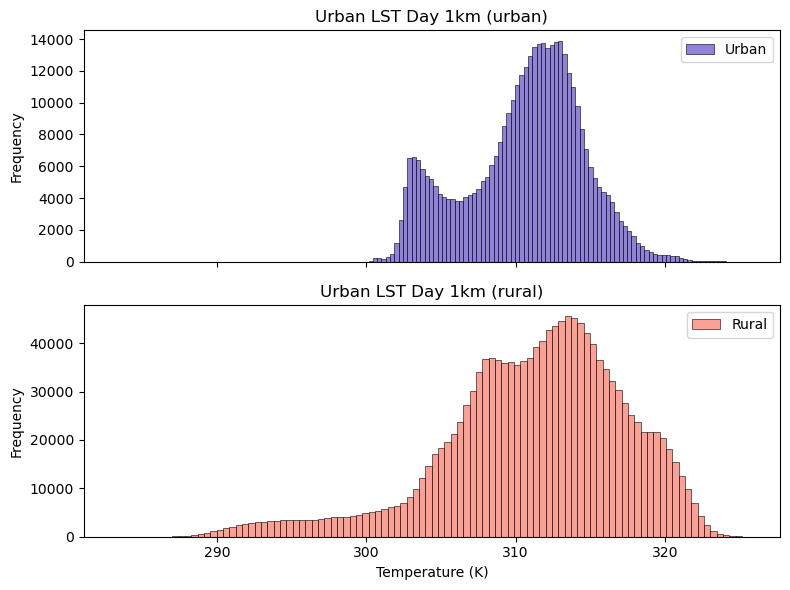

In [424]:
# Plot the distribution of the LST values
fig, axes=  plt.subplots(nrows=2, figsize=(8,6), sharex=True)


group = 'urban'
plot_vals = ds.sel(group=group)['LST_Day_1km'].mean(dim='time').values.flatten()
sns.histplot(plot_vals[~np.isnan(plot_vals)], bins=100,  ax=axes[0],label=group.title(), color='slateblue')
axes[0].set(title=f'Urban LST Day 1km ({group})',ylabel='Frequency')

group = 'rural'
plot_vals = ds.sel(group=group)['LST_Day_1km'].mean(dim='time').values.flatten()
sns.histplot(plot_vals[~np.isnan(plot_vals)], bins=100, ax=axes[1],label=group.title(), color='salmon')
axes[1].set(title=f'Urban LST Day 1km ({group})', xlabel='Temperature (K)', ylabel='Frequency')
[ax.legend() for ax in axes]
fig.tight_layout()

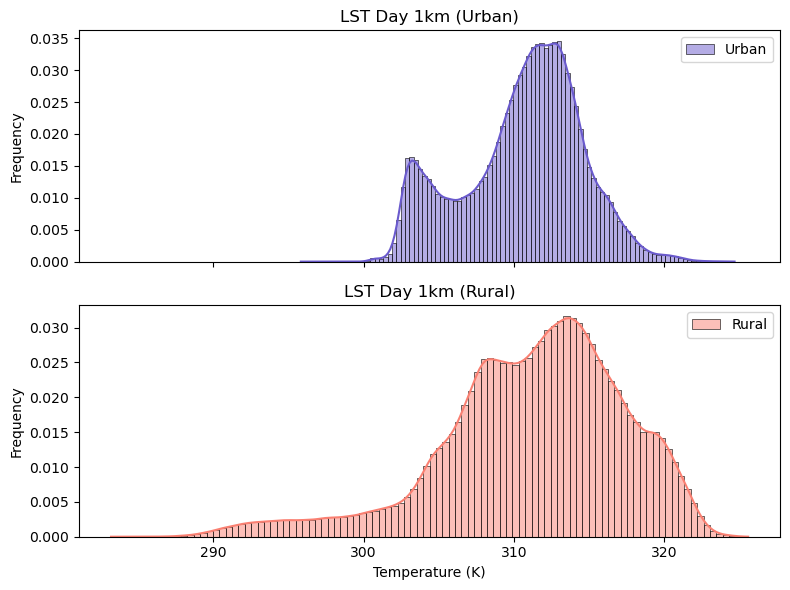

In [425]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xarray as xr

def plot_lst_distribution(ds, var_name='LST_Day_1km', combined=False, bins=100, kde=True, stat='probability', unit="K"):
    """
    Plots the distribution of Land Surface Temperature (LST) values for urban and rural areas.

    Parameters:
    ds (xarray.Dataset): The dataset containing the LST data.
    var_name (str): The name of the LST variable in the dataset. Default is 'LST_Day_1km'.
    combined (bool): If True, plots both distributions on a single plot. If False, creates separate subplots. Default is False.
    bins (int): Number of bins for the histogram. Default is 100.
    kde (bool): Whether to plot a kernel density estimate. Default is True.
    stat (str): Statistic used to compute the histogram ('count', 'frequency', 'density', or 'probability'). Default is 'probability'.

    Returns:
    None
    """
    
        # Determine the label for the temperature unit
    if unit == 'K':
        temp_label = 'Temperature (K)'
    elif unit == 'C':
        temp_label = 'Temperature (°C)'
    elif unit == 'F':
        temp_label = 'Temperature (°F)'
    else:
        raise ValueError("Unit must be 'K', 'C', or 'F'")



    if combined:
        fig, ax = plt.subplots(nrows=1, figsize=(8, 4), sharex=True)
        axes = [ax]
    else:
        fig, axes = plt.subplots(nrows=2, figsize=(8, 6), sharex=True)

    # Plot params
    groups = ['urban', 'rural']
    colors = ['slateblue', 'salmon']
    shared_kws = {'bins': bins, 'kde': kde, 'stat': stat}

    for i, group in enumerate(groups):
        # Slice the correct group
        plot_vals = ds.sel(group=group)[var_name].mean(dim='time').values.flatten()
        plot_vals = plot_vals[~np.isnan(plot_vals)]
        i_ax = 0 if combined else i
        
        sns.histplot(plot_vals, ax=axes[i_ax], label=group.title(), color=colors[i], **shared_kws)
        axes[i_ax].set(title=f'LST Day 1km ({group.title()})', ylabel='Frequency')
        
        # if group == 'rural':
        
    axes[-1].set(xlabel=temp_label)  # Adjust the unit if needed

    [ax.legend() for ax in axes]
    fig.tight_layout()
    plt.show()
    
    return fig, axes

# Example usage
# Assuming 'combined_ds' is your combined xarray dataset with urban and rural groups
plot_lst_distribution(ds, combined=False, unit='K');  # Separate subplots
# plot_lst_distribution(combined_ds, combined=True)   # Combined plot

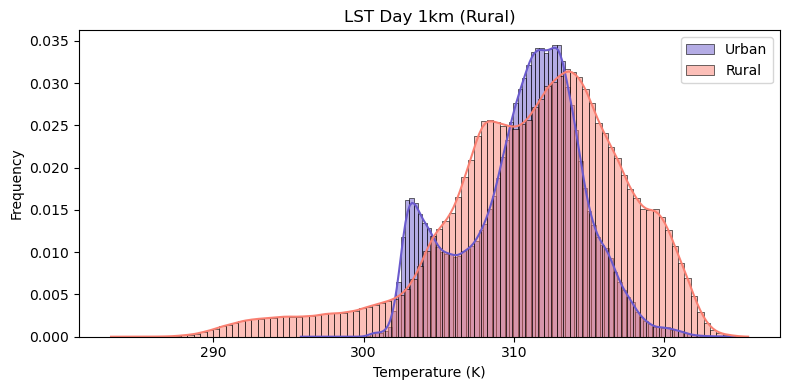

In [426]:
# # Plot the distribution of the LST values
# fig, ax=  plt.subplots(nrows=1, figsize=(8,4), sharex=True)
# axes = [ax]

# shared_kws = {'bins':100, 'kde':True, 'stat':'probability'}
# group = 'urban'
# plot_vals = ds.sel(group=group)['LST_Day_1km'].mean(dim='time').values.flatten()
# sns.histplot(plot_vals[~np.isnan(plot_vals)],  ax=axes[0],label=group.title(), color='slateblue', **shared_kws)
# axes[0].set(title=f'Urban LST Day 1km ({group})',ylabel='Frequency')

# group = 'rural'
# plot_vals = ds.sel(group=group)['LST_Day_1km'].mean(dim='time').values.flatten()
# sns.histplot(plot_vals[~np.isnan(plot_vals)], ax=axes[0],label=group.title(), color='salmon', **shared_kws)
# axes[0].set(title=f'Urban LST Day 1km ({group})', xlabel='Temperature (K)', ylabel='Frequency')
# [ax.legend() for ax in axes]
# fig.tight_layout()


fig, axes = plot_lst_distribution(ds, combined=True, unit="K")  # Separate subplots



In [427]:
help(ds.sel(group='urban')['LST_Day_1km_F'].mean)

Help on method mean in module xarray.core._aggregations:

mean(dim: 'Dims' = None, *, skipna: 'bool | None' = None, keep_attrs: 'bool | None' = None, **kwargs: 'Any') -> 'Self' method of xarray.core.dataarray.DataArray instance
    Reduce this DataArray's data by applying ``mean`` along some dimension(s).
    
    Parameters
    ----------
    dim : str, Iterable of Hashable, "..." or None, default: None
        Name of dimension[s] along which to apply ``mean``. For e.g. ``dim="x"``
        or ``dim=["x", "y"]``. If "..." or None, will reduce over all dimensions.
    skipna : bool or None, optional
        If True, skip missing values (as marked by NaN). By default, only
        skips missing values for float dtypes; other dtypes either do not
        have a sentinel missing value (int) or ``skipna=True`` has not been
        implemented (object, datetime64 or timedelta64).
    keep_attrs : bool or None, optional
        If True, ``attrs`` will be copied from the original
        obje

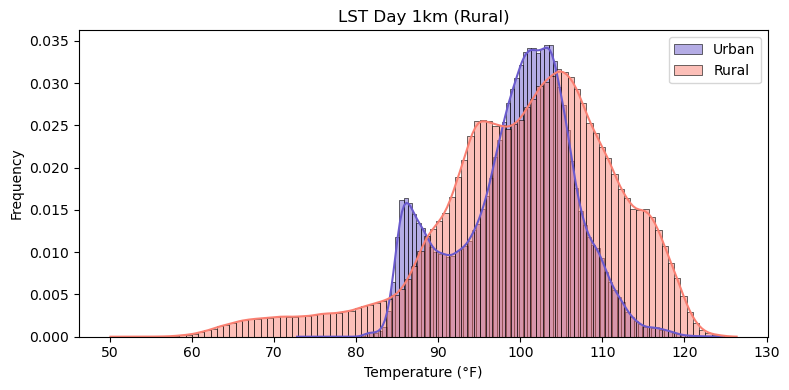

In [428]:
## Convert temperature to Fahrenheit
# # Convert LST temps from Kelvin to Fahrenheit
# ds['LST_Day_1km_F'] = (ds['LST_Day_1km'] - 273.15)* 9/5 + 32
# ds['LST_Day_1km_C'] = ds['LST_Day_1km'] - 273.15

fig, axes = plot_lst_distribution(ds, var_name="LST_Day_1km_F", combined=True, unit='F')  # Separate subplots
ax = axes[0]


In [429]:

mean_temp_urban = ds.sel(group='urban')['LST_Day_1km_F'].mean(dim='time', skipna=True).values.flatten().mean()
mean_temp_urban


nan

## 🚨[BOOKMARK 07/01/24] To Do: figure out why mean for urban is NaN?
> WHY IS `mean_temp_urban` null?!

### Check for MODIS outages
- https://modaps.modaps.eosdis.nasa.gov/services/production/outages_terra.html
- Saved the above table as a csv

In [430]:
# !pip install lxml -q
# tables = pd.read_html("https://modaps.modaps.eosdis.nasa.gov/services/production/outages_terra.html")
# len(tables)

In [431]:
# outages_df = tables[0]
# outages_df

In [432]:
def split_start_end_date(x, as_dict=False, as_series=True, as_datetime=True):
    """
    Splits a date range string into start and end dates.

    Parameters:
    - x (str): The date range string to be split.
    - as_dict (bool): If True, returns the result as a dictionary. Default is False.
    - as_series (bool): If True, returns the result as a pandas Series. Default is True.
    - as_datetime (bool): If True, converts the start and end dates to pandas datetime objects. Default is True.

    Returns:
    - If as_dict is True, returns a dictionary with keys 'start_date' and 'end_date'.
    - If as_series is True, returns a pandas Series with index 'start_date' and 'end_date'.
    - If both as_dict and as_series are False, returns a tuple with start_date and end_date.

    Note:
    - If the date range string does not contain an end date, the end_date value will be None.
    - If as_datetime is True, the start_date and end_date will be converted to pandas datetime objects.
    """
    if ' - ' in x:
        start_date, end_date = map(str.strip, x.split(' - '))
    else:
        start_date = x.strip()
        end_date = None
        
    if as_datetime:
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date, errors='coerce')
        
    if (as_dict) | (as_series):
        return_dict = {'start_date': start_date, 'end_date': end_date}
        
        if as_dict:
            return return_dict
        if as_series:
            return pd.Series(return_dict)
    else:
        return start_date, end_date
    

# outages_start_end = outages_df['Date'].map(lambda x: split_start_end_date(x, as_series=True))
# outages_df[['start','end']] = outages_df['Date'].apply(lambda x: split_start_end_date(x, as_series=True))
# outages_df

In [436]:
# outages_df.to_csv('data/MODIS-LST/terra_outages.csv', index=False)

outages_df = pd.read_csv('data/MODIS-LST/terra_outages.csv', parse_dates=['start','end'])
outages_df


Year-Day                           Date Start Time (UTC)  \
0               2024-178                  June 26, 2024         02:15:00   
1               2024-177                  June 25, 2024         21:45:00   
2               2024-172                  June 20, 2024         01:15:00   
3    2024-171 - 2024-172  June 19, 2024 - June 20, 2024         23:05:00   
4               2024-170                  June 18, 2024         01:10:00   
..                   ...                            ...              ...   
602             2000-056              February 25, 2000         05:15:00   
603             2000-055              February 24, 2000         09:10:00   
604             2000-055              February 24, 2000         08:00:00   
605             2000-055              February 24, 2000         06:50:00   
606             2000-055              February 24, 2000         02:00:00   

    End Time (UTC)                                           Comments  \
0         02:20:00                                        EDOS Outage   
1         22:00:00                                EDOS Outage DMU 243   
2         03:30:00                   EDOS Power Outage at White Sands   
3         00:20:00                   EDOS Power Outage at White Sands   
4         02:15:00                               Invalid Orbit Number   
..             ...                                                ...   
602       05:20:00  Ancillary Outage, S/C SFE Anomaly (LRS data loss)   
603       10:00:00        Ancillary Outage, HouseKeeping Data Missing   
604       09:10:00                 L0 Outage; First Light/Bad L0 Data   
605       07:30:00                 L0 Outage; First Light/Bad L0 Data   
606       04:00:00                 L0 Outage; First Light/Bad L0 Data   

         start        end  
0   2024-06-26        NaT  
1   2024-06-25        NaT  
2   2024-06-20        NaT  
3   2024-06-19 2024-06-20  
4   2024-06-18        NaT  
..         ...        ...  
602 2000-02-25        NaT  
603 2000-02-24        NaT  
604 2000-02-24        NaT  
605 2000-02-24        NaT  
606 2000-02-24        NaT  

[607 rows x 7 columns]

In [437]:
outages_df = outages_df.set_index("start")
outages_df.loc['2023']

Year-Day                                   Date  \
start                                                                    
2023-12-22             2023-356                      December 22, 2023   
2023-12-22             2023-356                      December 22, 2023   
2023-10-15             2023-288                       October 15, 2023   
2023-10-10             2023-283                       October 10, 2023   
2023-09-29             2023-272                     September 29, 2023   
2023-09-14             2023-257                     September 14, 2023   
2023-09-03  2023-246 - 2023-247  September 3, 2023 - September 4, 2023   
2023-08-22             2023-234                        August 22, 2023   
2023-08-07             2023-219                         August 7, 2023   
2023-07-15             2023-196                          July 15, 2023   
2023-07-08             2023-189                           July 8, 2023   
2023-02-05             2023-036                       February 5, 2023   

           Start Time (UTC) End Time (UTC)  \
start                                        
2023-12-22         18:05:00       18:25:00   
2023-12-22         15:00:00       16:15:00   
2023-10-15         08:00:00       08:05:00   
2023-10-10         07:20:00       07:50:00   
2023-09-29         00:30:00       00:40:00   
2023-09-14         07:10:00       07:30:00   
2023-09-03         23:45:00       01:15:00   
2023-08-22         10:45:00       11:00:00   
2023-08-07         11:40:00       12:20:00   
2023-07-15         01:45:00       02:15:00   
2023-07-08         01:20:00       01:25:00   
2023-02-05         14:20:00       15:10:00   

                                                                   Comments  \
start                                                                         
2023-12-22                                                      EDOS Outage   
2023-12-22                                                      EDOS Outage   
2023-10-15                                                      Bad Level 0   
2023-10-10                                                     LDOPE Outage   
2023-09-29               NorthBoundingCoord is less than SouthBoundingCoord   
2023-09-14                                                     LDOPE Outage   
2023-09-03                                                     LDOPE Outage   
2023-08-22                                                     LDOPE Outage   
2023-08-07                                                     LDOPE Outage   
2023-07-15  NorthBoundingCoord is less than SouthBoundingCoord & Corrupt L0   
2023-07-08                               Telemetry data are bad and crashed   
2023-02-05               NorthBoundingCoord is less than SouthBoundingCoord   

                  end  
start                  
2023-12-22        NaT  
2023-12-22        NaT  
2023-10-15        NaT  
2023-10-10        NaT  
2023-09-29        NaT  
2023-09-14        NaT  
2023-09-03 2023-09-04  
2023-08-22        NaT  
2023-08-07        NaT  
2023-07-15        NaT  
2023-07-08        NaT  
2023-02-05        NaT

In [438]:

mean_temp_rural = ds.sel(group='rural')['LST_Day_1km_F'].mean(dim='time', skipna=True).values.flatten().mean()
mean_temp_rural

100.54115865508065

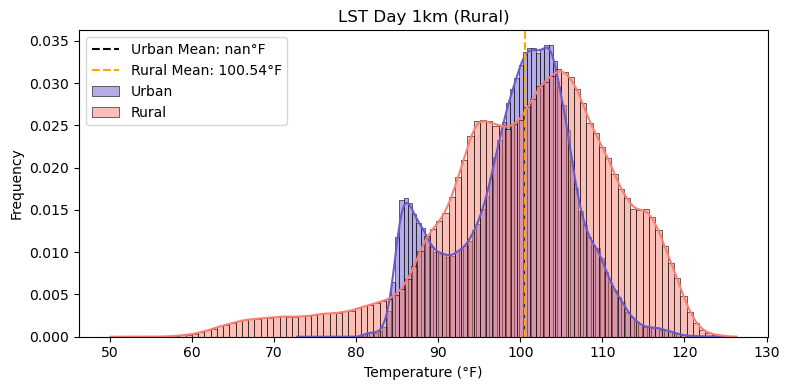

In [439]:

ax.axvline(mean_temp_urban, color='black', linestyle='--', label=f'Urban Mean: {mean_temp_urban:.2f}°F')
ax.axvline(mean_temp_rural, color='orange', linestyle='--', label=f'Rural Mean: {mean_temp_rural:.2f}°F')
ax.legend()
fig

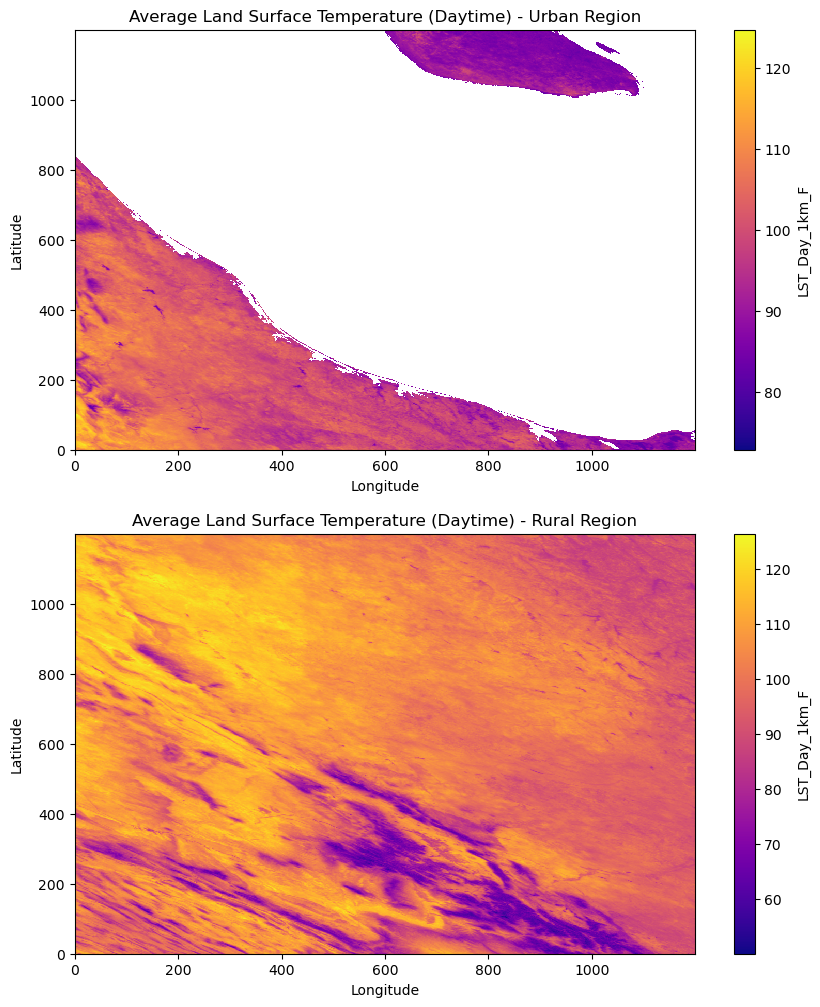

In [440]:
import matplotlib.pyplot as plt

# Plot the average LST for urban and rural regions
fig, axes = plt.subplots(figsize=(10, 12), nrows=2)
cmap = 'plasma'
ds.sel(group='urban')['LST_Day_1km_F'].mean(dim='time').plot(cmap=cmap, ax=axes[0])
axes[0].set(title='Average Land Surface Temperature (Daytime) - Urban Region',
            xlabel='Longitude',ylabel='Latitude')

# plt.figure(figsize=(10, 6))
ds.sel(group='rural')['LST_Day_1km_F'].mean(dim='time').plot(cmap=cmap, ax=axes[1])
axes[1].set(title='Average Land Surface Temperature (Daytime) - Rural Region',
            xlabel='Longitude',ylabel='Latitude');


### Attempting to Match Coorindates to Map

In [ ]:
# # Display the dataset's structure
# # print(f"{ds=}")

# # Display the variables and dimensions in the dataset
# print(f"{ds.variables=}")

# # Display the dimensions of the dataset
# print(f"{ds.dims=}")

# # Display the coordinates of the dataset
# print(f'{ds.coords=}')

### Interpreting Data Variables in the MODIS LST Dataset



The dataset you have contains several variables. Here's a detailed interpretation of each:

#### Dimensions
- **time**: The temporal dimension, representing different time points (26 time steps in this dataset).
- **YDim:MODIS_Grid_8Day_1km_LST**: The vertical spatial dimension (1200 grid cells).
- **XDim:MODIS_Grid_8Day_1km_LST**: The horizontal spatial dimension (1200 grid cells).

#### Data Variables

1. **LST_Day_1km**:
   - **Description**: Land Surface Temperature during the day.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Unit**: Kelvin (but typically scaled and should be converted to Celsius).
   - **Size**: 300MB
   - **Meaning**: This variable provides the daytime land surface temperature for each grid cell over the specified time period.

2. **QC_Day**:
   - **Description**: Quality Control for daytime LST data.
   - **Type**: float32
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 150MB
   - **Meaning**: This variable contains quality assurance information for the daytime LST data, indicating the reliability and accuracy of the measurements.

3. **Day_view_time**:
   - **Description**: Local time of day (in hours) at which the daytime LST was measured.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 300MB
   - **Meaning**: This variable indicates the local solar time when the LST measurement was taken.

4. **Day_view_angl**:
   - **Description**: View zenith angle for daytime observations.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 300MB
   - **Meaning**: This variable represents the angle at which the MODIS sensor viewed the surface during the daytime LST measurement.

5. **LST_Night_1km**:
   - **Description**: Land Surface Temperature during the night.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Unit**: Kelvin (but typically scaled and should be converted to Celsius).
   - **Size**: 300MB
   - **Meaning**: This variable provides the nighttime land surface temperature for each grid cell over the specified time period.

6. **QC_Night**:
   - **Description**: Quality Control for nighttime LST data.
   - **Type**: float32
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 150MB
   - **Meaning**: This variable contains quality assurance information for the nighttime LST data, indicating the reliability and accuracy of the measurements.

7. **Night_view_time**:
   - **Description**: Local time of night (in hours) at which the nighttime LST was measured.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 300MB
   - **Meaning**: This variable indicates the local solar time when the LST measurement was taken.

8. **Night_view_angl**:
   - **Description**: View zenith angle for nighttime observations.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 300MB
   - **Meaning**: This variable represents the angle at which the MODIS sensor viewed the surface during the nighttime LST measurement.

9. **Emis_31**:
   - **Description**: Band 31 emissivity.
   - **Type**: float64
   - **Dimensions**: (time, YDim, XDim)
   - **Size**: 300MB
   - **Meaning**: This variable provides the surface emissivity for MODIS Band 31, which is used in the LST retrieval process.

10. **Emis_32**:
    - **Description**: Band 32 emissivity.
    - **Type**: float64
    - **Dimensions**: (time, YDim, XDim)
    - **Size**: 300MB
    - **Meaning**: This variable provides the surface emissivity for MODIS Band 32, which is used in the LST retrieval process.

11. **Clear_sky_days**:
    - **Description**: Number of clear-sky days used in the LST calculation.
    - **Type**: float32
    - **Dimensions**: (time, YDim, XDim)
    - **Size**: 150MB
    - **Meaning**: This variable indicates the number of clear-sky days that contributed to the 8-day LST composite for each grid cell.

12. **Clear_sky_nights**:
    - **Description**: Number of clear-sky nights used in the LST calculation.
    - **Type**: float32
    - **Dimensions**: (time, YDim, XDim)
    - **Size**: 150MB
    - **Meaning**: This variable indicates the number of clear-sky nights that contributed to the 8-day LST composite for each grid cell.



#### Attributes

1. **HDFEOSVersion**: The version of the HDF-EOS (Hierarchical Data Format - Earth Observing System) used.
2. **StructMetadata.0**: Metadata describing the structure of the dataset.
3. **identifier_product_doi**: DOI (Digital Object Identifier) for the product.
4. **identifier_product_doi_authority**: The authority providing the DOI.
5. **CoreMetadata.0**: Core metadata including information about the dataset's content and purpose.
6. **ArchiveMetadata.0**: Metadata related to the archival and provenance of the data.


### Bookmark: Lunch


### Next Steps for Analysis

1. **Data Cleaning**:
   - Handle any missing or invalid data.
   - Apply quality control filters using `QC_Day` and `QC_Night` variables to ensure data reliability.

2. **Data Transformation**:
   - Convert LST values from Kelvin to Celsius using the scaling factor (typically `LST = LST * 0.02 - 273.15`).

3. **Descriptive Analysis**:
   - Calculate summary statistics (mean, median, standard deviation) for LST Day and Night.
   - Plot spatial distributions and temporal trends.

4. **Comparative Analysis**:
   - Compare LST between urban and rural areas.
   - Analyze temporal changes in LST to understand trends and anomalies.

5. **Advanced Analysis**:
   - Use machine learning models to predict LST based on other variables (e.g., emissivity, view angle).
   - Conduct spatial analysis to identify UHI hotspots.

By following these steps and understanding the variables, you can effectively analyze the MODIS LST dataset to study Urban Heat Island effects and other temperature-related phenomena.

### ✅ TO DO: Get Socioeconomic data that can be matched to the regions


### 3. Data Preparation



**Data Cleaning:**
- Handle missing values in LST and socio-economic datasets.
- Normalize and standardize data for consistency.

**Data Transformation:**
- Convert geographic boundaries to a common coordinate system.
- Calculate average temperatures for urban and rural areas.

**Feature Engineering:**
- Create new features such as temperature difference (urban vs. rural).
- Aggregate socio-economic indicators for analysis.

**Data Integration:**
- Merge LST data with socio-economic data based on geographic coordinates.


In [441]:
#1. Initial Data Exploration
# Summary statistics
urban_temps = ds.sel(group='urban')['LST_Day_1km'].mean(dim='time').values.flatten()
rural_temps = ds.sel(group='rural')['LST_Day_1km'].mean(dim='time').values.flatten()

# Removing NaNs
urban_temps = urban_temps[~np.isnan(urban_temps)]
rural_temps = rural_temps[~np.isnan(rural_temps)]

# Summary statistics
urban_summary = {
    'mean': np.mean(urban_temps),
    'median': np.median(urban_temps),
    'std_dev': np.std(urban_temps)
}

rural_summary = {
    'mean': np.mean(rural_temps),
    'median': np.median(rural_temps),
    'std_dev': np.std(rural_temps)
}

print("Urban Summary:", urban_summary)
print("Rural Summary:", rural_summary)

Urban Summary: {'mean': 310.56253596077914, 'median': 311.1646153846154, 'std_dev': 3.9751078171902616}
Rural Summary: {'mean': 311.22842147504457, 'median': 311.9584615384616, 'std_dev': 6.172786497288381}


In [442]:
ds['time']

<xarray.DataArray 'time' (time: 26)> Size: 208B
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])
Dimensions without coordinates: time

In [443]:
# 2. Temporal Analysis
import matplotlib.dates as mdates

unit  = "F"
# Convert time dimension to a datetime format
ds['datetime'] = pd.to_datetime(ds['time'].values,   origin='1970-01-01')#unit='D',


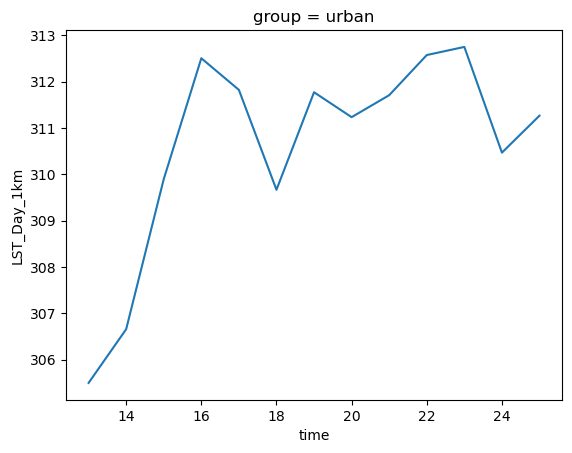

In [444]:
ds.sel(group='urban')['LST_Day_1km'].mean(dim=['YDim:MODIS_Grid_8Day_1km_LST', 'XDim:MODIS_Grid_8Day_1km_LST']).plot(label='Urban')


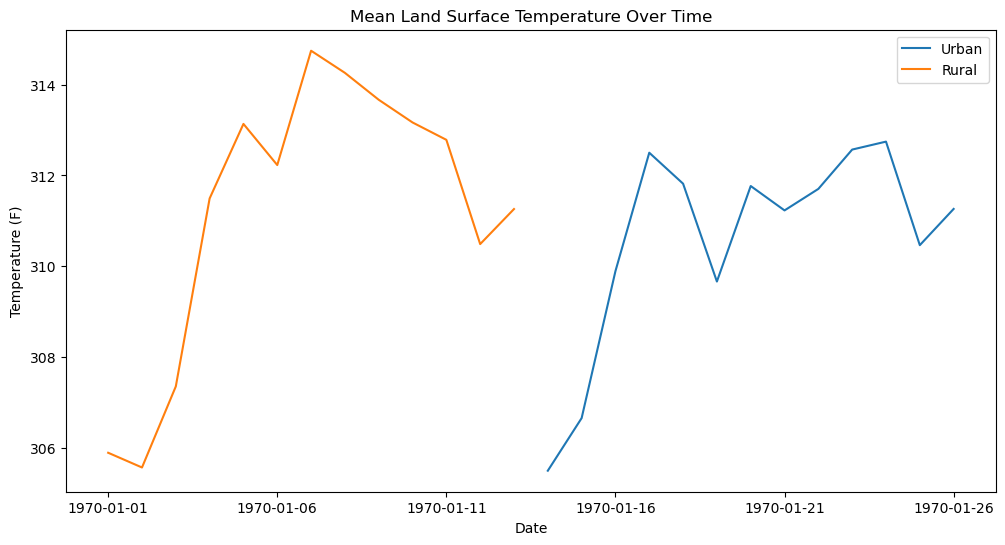

In [445]:
# Plot time series
fig, ax = plt.subplots(figsize=(12, 6))
ds.sel(group='urban')['LST_Day_1km'].mean(dim=['YDim:MODIS_Grid_8Day_1km_LST', 'XDim:MODIS_Grid_8Day_1km_LST']).plot(ax=ax, label='Urban')
ds.sel(group='rural')['LST_Day_1km'].mean(dim=['YDim:MODIS_Grid_8Day_1km_LST', 'XDim:MODIS_Grid_8Day_1km_LST']).plot(ax=ax, label='Rural')

# Formatting the plot
ax.set_title('Mean Land Surface Temperature Over Time')
ax.set_xlabel('Date')
ax.set_ylabel(f'Temperature ({unit})')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.legend()
plt.show()

In [ ]:
raise Exception("Stop run all here.")


### 4. Modeling



**Model Selection:**
- Choose appropriate statistical and machine learning models (e.g., regression analysis, clustering).

**Training and Testing:**
- Split data into training and testing sets.
- Train models to identify key factors contributing to UHI.

**Model Evaluation:**
- Use metrics such as R-squared, Mean Absolute Error (MAE) to evaluate model performance.
- Validate models using cross-validation techniques.



### 5. Evaluation



**Model Performance:**
- Assess the performance of models on test data.
- Refine models based on evaluation metrics and feedback.

**Insights and Interpretation:**
- Interpret the results to identify significant factors influencing UHI.
- Visualize the findings using heatmaps and charts.

**Review Objectives:**
- Ensure the project goals are met.
- Validate findings with domain experts.



### 6. Deployment



**Reporting:**
- Prepare a comprehensive report detailing the findings, methodology, and recommendations.
- Create visualizations and interactive dashboards for stakeholders.

**Actionable Insights:**
- Propose mitigation strategies such as increasing green spaces or implementing reflective materials.
- Suggest policy changes based on data-driven insights.

**Dissemination:**
- Share findings with city planners, environmental agencies, and the public.
- Publish results in relevant journals or online platforms.

**Maintenance and Monitoring:**
- Set up periodic monitoring of UHI using updated data.
- Refine models and strategies based on new data and feedback.



### Timeline and Milestones

1. **Weeks 1-2: Business Understanding**
   - Define objectives, goals, and project plan.

2. **Weeks 3-4: Data Understanding**
   - Collect and explore data, assess quality.

3. **Weeks 5-7: Data Preparation**
   - Clean, transform, and integrate data.

4. **Weeks 8-10: Modeling**
   - Train, test, and evaluate models.

5. **Weeks 11-12: Evaluation**
   - Interpret results, validate with experts.

6. **Weeks 13-14: Deployment**
   - Prepare reports, visualizations, and share findings.

This plan outlines a structured approach to the Urban Heat Island Analysis project, ensuring each phase is thoroughly addressed to achieve the project objectives.